# Loan Prediction Based on Customer Behavior

  - This project is the final project assignment from the Rakamin Data Science bootcamp that I am taking, where we are required to go through the end-to-end process of a data science project analyzing factors influencing the default (failure to pay) of a lending company.

  - After the project is completed and presented to the panelists, who are highly experienced experts in the field of data science and business, I personally carry out further improvements based on their suggestions and feedback for this project.

  - I also translate the original version in Indonesian language to English so that non-Indonesian could understand.

# **STAGE 0 : BUSINESS UNDERSTANDING**

## 📌 Problem Statement

A lending company needs to verify loan applications from its prospective borrowers (customers). The manual verification procedure conducted by the company has resulted in numerous inaccurate assessments, leading to loans being granted to borrowers who ultimately fail to repay (default). This has proven detrimental to the company as it incurs financial losses without any return. Additionally, the manual verification process also consumes a considerable amount of time which is not efficient.

Building on this issue, the company aims to develop an automated system that can predict the creditworthiness of prospective borrowers in the future based on past borrower data to reduce the selection of potential customers with high default risks.

## 📌 Role

As a Data Scientist Team, our role involves conducting analysis to gain business insights and designing models that have an impact on business development.

## 📌 Goals

- Enhanced credit risk evaluation: Improve the assessment of credit risk by implementing machine learning models. (**MAIN**)
- Increased efficiency: Streamline the credit risk assessment process for greater effectiveness and reduced processing time. (**SECONDARY**)

## 📌 Objectives

The ultimate goal of this project is to create a machine learning model that can:

- Predict credit risk with a high recall rate. The objective is to reduce the risk of losses due to inaccurate risk assessments.
- Provide automated credit risk assessment decisions in a short amount of time.

## 📌 Business Metrics

* Default Rate (%) : The percentage of prospective customers who fail to repay a loan (default) divided by the total number of customers. (**MAIN**)
* Approval Time : The time taken to process loan applications. (**SECONDARY**)

# **STAGE 1 : EXPLORATORY DATA ANALYSIS (EDA)**

## Import Libraries and Settings

In [1]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

import sklearn
import joblib
import pickle
import math
import scipy.stats as stats
from scipy.stats import skew, kurtosis, chi2_contingency

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)
print("scikit-learn version:", sklearn.__version__)
print("joblib version:", joblib.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2
scikit-learn version: 1.4.0
joblib version: 1.3.2


### Load Dataset (Jupyter Notebook)

In [2]:
df = pd.read_csv('Training Data.csv')

### Load Dataset (Google Colab)

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# df = pd.read_csv('/content/drive/MyDrive/Dackers - Rakamin Final Project/Training Data.csv')

## Data Understanding & Initial Transformation

In [4]:
# Retrieve 10 sample lines from the available data
df.sample(10)

Id   Income  Age  Experience Married/Single House_Ownership  \
14027    14028  3603703   75           2         single           owned   
237369  237370  2209579   77          12         single          rented   
23914    23915   859890   30           2         single          rented   
223002  223003  4109636   64          20         single          rented   
185628  185629  3246861   79           2         single          rented   
16849    16850  4279587   56          11         single          rented   
188264  188265  5720531   43          12         single          rented   
196585  196586  4647997   42          18        married          rented   
117270  117271  3589702   68          15         single          rented   
166415  166416  8295121   50          11         single          rented   

       Car_Ownership           Profession        CITY           STATE  \
14027             no            Geologist       Hapur   Uttar_Pradesh   
237369            no              Dentist        Gaya           Bihar   
23914            yes  Mechanical_engineer   Bhavnagar         Gujarat   
223002           yes   Software_Developer  Srikakulam  Andhra_Pradesh   
185628           yes              Aviator       Adoni  Andhra_Pradesh   
16849            yes    Chemical_engineer    Siliguri     West_Bengal   
188264            no    Financial_Analyst    Dehradun     Uttarakhand   
196585            no           Magistrate     Cuttack          Odisha   
117270            no         Web_designer     Dhanbad       Jharkhand   
166415            no         Army_officer       Korba    Chhattisgarh   

        CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  
14027                 2                 12          0  
237369               12                 12          0  
23914                 2                 11          0  
223002                4                 11          0  
185628                2                 13          0  
16849                11                 10          0  
188264                7                 11          0  
196585                5                 12          0  
117270                5                 13          0  
166415                5                 11          0

In [5]:
# Checking shape of dataframe
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns {df.shape[1]}')

Number of rows: 252000
Number of columns 13


> The dataset have 252000 rows and 13 columns

In [6]:
# Checking basic data information
def check_data_information(df, cols):
    """
    This function provides detailed information about each column in a dataframe, including:
    - Data type of the column
    - Number of missing (null) values
    - Percentage of missing values
    - Total number of duplicated rows in the dataframe (not column-specific)
    - Number of unique values in the column
    - A sample of up to 5 unique values from the column

    Parameters:
    df (pd.DataFrame): The dataframe you want to check.
    cols (list): List of column names to check the information from.

    Returns:
    pd.DataFrame: A dataframe with detailed information for each column.
    """
    list_item = []
    for col in cols:
        list_item.append([col,                             # The column name
                          df[col].dtype,                   # The data type of the column
                          df[col].isna().sum(),            # The count of null values in the column
                          round(100 * df[col].isna().sum() / len(df[col]), 2),  # The percentage of null values
                          df.duplicated().sum(),           # The count of duplicated rows in the entire dataframe
                          df[col].nunique(),               # The count of unique values in the column
                          df[col].unique()[:5]])           # A sample of the first 5 unique values in the column

    desc_df = pd.DataFrame(data=list_item, columns='Feature, Data Type, Null Values, Null Percentage, Duplicated Values, Unique Values, Unique Sample'.split(","))
    return desc_df

columns_to_check = df.columns
check_data_information(df, columns_to_check)

Feature  Data Type   Null Values   Null Percentage  \
0                  Id      int64             0               0.0   
1              Income      int64             0               0.0   
2                 Age      int64             0               0.0   
3          Experience      int64             0               0.0   
4      Married/Single     object             0               0.0   
5     House_Ownership     object             0               0.0   
6       Car_Ownership     object             0               0.0   
7          Profession     object             0               0.0   
8                CITY     object             0               0.0   
9               STATE     object             0               0.0   
10    CURRENT_JOB_YRS      int64             0               0.0   
11  CURRENT_HOUSE_YRS      int64             0               0.0   
12          Risk_Flag      int64             0               0.0   

     Duplicated Values   Unique Values  \
0                    0          252000   
1                    0           41920   
2                    0              59   
3                    0              21   
4                    0               2   
5                    0               3   
6                    0               2   
7                    0              51   
8                    0             317   
9                    0              29   
10                   0              15   
11                   0               5   
12                   0               2   

                                                                            Unique Sample  
0                                                                         [1, 2, 3, 4, 5]  
1                                           [1303834, 7574516, 3991815, 6256451, 5768871]  
2                                                                    [23, 40, 66, 41, 47]  
3                                                                       [3, 10, 4, 2, 11]  
4                                                                       [single, married]  
5                                                           [rented, norent_noown, owned]  
6                                                                               [no, yes]  
7   [Mechanical_engineer, Software_Developer, Technical_writer, Civil_servant, Librarian]  
8                           [Rewa, Parbhani, Alappuzha, Bhubaneswar, Tiruchirappalli[10]]  
9                               [Madhya_Pradesh, Maharashtra, Kerala, Odisha, Tamil_Nadu]  
10                                                                        [3, 9, 4, 2, 0]  
11                                                                   [13, 10, 12, 14, 11]  
12                                                                                 [0, 1]

**Update**: 

- In this case we found that there are no missing values atau duplicate values in this dataset because we are using the entire column to check for missing values and duplicates which is distinguished from the Id column. But if we check by excluding the Id column, we will find that this dataset actually have a lot of missing values and duplicates, which we will show below.

- This kind of error could potentially raise from using the wrong join method when merging multiple datasets and not validating the data first.

In [7]:
# Further checking for duplicates
exclude_columns = ['Id']
df[df.duplicated(subset=df.columns.difference(exclude_columns))]

Id   Income  Age  Experience Married/Single House_Ownership  \
5366      5367  7574516   40          10         single          rented   
5367      5368  3991815   66           4        married          rented   
5368      5369  6256451   41           2         single          rented   
5370      5371  6915937   64           0         single          rented   
5371      5372  3954973   58          14        married          rented   
...        ...      ...  ...         ...            ...             ...   
215992  215993  9482746   68          10         single          rented   
215993  215994  4590372   42          16         single          rented   
215994  215995  4727841   52           8         single          rented   
215995  215996  5000063   38          17         single          rented   
215996  215997   120605   22           7         single          rented   

       Car_Ownership             Profession                  CITY  \
5366              no     Software_Developer              Parbhani   
5367              no       Technical_writer             Alappuzha   
5368             yes     Software_Developer           Bhubaneswar   
5370              no          Civil_servant               Jalgaon   
5371              no              Librarian              Tiruppur   
...              ...                    ...                   ...   
215992            no              Physician                Indore   
215993            no          Hotel_Manager          Shahjahanpur   
215994            no  Technology_specialist                Tenali   
215995            no  Technology_specialist           Yamunanagar   
215996            no    Industrial_Engineer  Bhalswa_Jahangir_Pur   

                 STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  
5366       Maharashtra                9                 13          0  
5367            Kerala                4                 10          0  
5368            Odisha                2                 12          1  
5370       Maharashtra                0                 12          0  
5371        Tamil_Nadu                8                 12          0  
...                ...              ...                ...        ...  
215992  Madhya_Pradesh                6                 11          1  
215993   Uttar_Pradesh                7                 11          0  
215994  Andhra_Pradesh                8                 12          0  
215995         Haryana                5                 11          1  
215996           Delhi                7                 10          0  

[208810 rows x 13 columns]

We can see that there are actually a lot of duplicated values in this dataset. Let's say for example we take the first row from that data duplicate data:

In [8]:
# Further checking on duplicated values 
df[(df["Income"] == 7574516) & (df["Age"] == 40)]

Id   Income  Age  Experience Married/Single House_Ownership  \
1            2  7574516   40          10         single          rented   
5366      5367  7574516   40          10         single          rented   
10744    10745  7574516   40          10         single          rented   
16165    16166  7574516   40          10         single          rented   
21521    21522  7574516   40          10         single          rented   
32307    32308  7574516   40          10         single          rented   
37701    37702  7574516   40          10         single          rented   
43121    43122  7574516   40          10         single          rented   
48507    48508  7574516   40          10         single          rented   
53924    53925  7574516   40          10         single          rented   
59339    59340  7574516   40          10         single          rented   
70167    70168  7574516   40          10         single          rented   
75575    75576  7574516   40          10         single          rented   
80985    80986  7574516   40          10         single          rented   
86407    86408  7574516   40          10         single          rented   
91750    91751  7574516   40          10         single          rented   
97159    97160  7574516   40          10         single          rented   
102571  102572  7574516   40          10         single          rented   
107971  107972  7574516   40          10         single          rented   
118774  118775  7574516   40          10         single          rented   
124173  124174  7574516   40          10         single          rented   
129588  129589  7574516   40          10         single          rented   
134959  134960  7574516   40          10         single          rented   
140340  140341  7574516   40          10         single          rented   
145742  145743  7574516   40          10         single          rented   
151124  151125  7574516   40          10         single          rented   
156520  156521  7574516   40          10         single          rented   
161867  161868  7574516   40          10         single          rented   
167287  167288  7574516   40          10         single          rented   
172705  172706  7574516   40          10         single          rented   
178140  178141  7574516   40          10         single          rented   
183536  183537  7574516   40          10         single          rented   
188964  188965  7574516   40          10         single          rented   
194355  194356  7574516   40          10         single          rented   
199763  199764  7574516   40          10         single          rented   
205189  205190  7574516   40          10         single          rented   
210583  210584  7574516   40          10         single          rented   

       Car_Ownership          Profession      CITY        STATE  \
1                 no  Software_Developer  Parbhani  Maharashtra   
5366              no  Software_Developer  Parbhani  Maharashtra   
10744             no  Software_Developer  Parbhani  Maharashtra   
16165             no  Software_Developer  Parbhani  Maharashtra   
21521             no  Software_Developer  Parbhani  Maharashtra   
32307             no  Software_Developer  Parbhani  Maharashtra   
37701             no  Software_Developer  Parbhani  Maharashtra   
43121             no  Software_Developer  Parbhani  Maharashtra   
48507             no  Software_Developer  Parbhani  Maharashtra   
53924             no  Software_Developer  Parbhani  Maharashtra   
59339             no  Software_Developer  Parbhani  Maharashtra   
70167             no  Software_Developer  Parbhani  Maharashtra   
75575             no  Software_Developer  Parbhani  Maharashtra   
80985             no  Software_Developer  Parbhani  Maharashtra   
86407             no  Software_Developer  Parbhani  Maharashtra   
91750             no  Software_Developer  Parbhani  Maharashtra   
97159             no  

We will handle this issue by removing the duplicates. Having this many duplicates will affect the accuracy of our model and the quality of our analysis, so we need to remove them.

In [9]:
# Removing found duplicates
df = df.drop_duplicates(subset=df.columns.difference(exclude_columns)).reset_index(drop=True)
df.shape

(43190, 13)

**Feature Information**

| **Feature Name** | **Description** | **Data Type** | **Specific Data Type** |
|----------------- |----------------|--------------|----------------------|
| `Id`             | Unique identifier of the user | Categorical | Nominal |
| `Income`         | Annual income of the user | Numerical | Continuous |
| `Age`            | Age of the user | Numerical | Continuous |
| `Experience`     | Total professional experience in years | Numerical | Continuous |
| `Married/Single` | Marital status of the user | Categorical | Nominal |
| `House_Ownership` | Status of housing ownership | Categorical | Nominal |
| `Car_Ownership`   | Vehicle ownership status | Categorical | Nominal |
| `Profession`      | User's professional occupation | Categorical | Nominal |
| `CITY`            | City of residence | Categorical | Nominal |
| `STATE`           | State of residence | Categorical | Nominal |
| `CURRENT_JOB_YRS` | Years of experience in current job | Numerical | Discrete |
| `CURRENT_HOUSE_YRS` | Years in current residence | Numerical | Discrete |
| `Risk_Flag`       | Loan default status | Categorical | Nominal |

In [10]:
# Grouping columns based on data types (for column iteration later in EDA and others)
nums_cols = ['Income', 'Age', 'Experience', 'Current_Job_Years', 'Current_House_Years']
cats_cols = ['Marital_Status', 'House_Ownership', 'Car_Ownership', 'Profession', 'City', 'State', 'Risk_Flag']

cats_cols_exclude_target = [col for col in cats_cols if col != 'Risk_Flag']

## Initial Feature Transformation

In [11]:
# Rename some columns
df.rename(columns={'CURRENT_JOB_YRS' : 'Current_Job_Years',
                   'CURRENT_HOUSE_YRS' : 'Current_House_Years',
                   'CITY' : 'City',
                   'STATE' : 'State',
                   'Married/Single' : 'Marital_Status'}, inplace=True)

# Drop Id column (because they are initially the same as the index)
df.drop(columns='Id', inplace=True)

# Function to change the target feature into categorical value (only for EDA, will change it back later for ML puposes)
def change_target_dtype(data, target_col='Risk_Flag', target_type='numerical'):
    """
    Change the target feature's data type between numerical and categorical.

    Parameters:
    data (pd.DataFrame): The dataframe containing the target column.
    target_col (str): The name of the target column.
    target_type (str): The desired data type for the target column. 
                       Use 'numerical' for 0/1 encoding and 'categorical' for 'No Default'/'Default'.

    Returns:
    None: The function modifies the dataframe in place.
    """
    if target_type == 'categorical':
        data[target_col] = data[target_col].map({0: 'No Default', 1: 'Default'})
    elif target_type == 'numerical':
        data[target_col] = data[target_col].map({'No Default': 0, 'Default': 1})
    else:
        raise ValueError("target_type must be either 'numerical' or 'categorical'")
    
change_target_dtype(data=df, target_type='categorical')

In [12]:
# Checking unique values for each categorical columns (for more detail value checking)
for col in cats_cols:
    print()
    print(f"{col}: {df[col].unique()}")


Marital_Status: ['single' 'married']

House_Ownership: ['rented' 'norent_noown' 'owned']

Car_Ownership: ['no' 'yes']

Profession: ['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'Microbiologist' 'Fashion_Designer'
 'Aviator' 'Psychologist' 'Magistrate' 'Lawyer' 'Firefighter' 'Engineer'
 'Official' 'Analyst' 'Geologist' 'Drafter' 'Statistician' 'Web_designer'
 'Consultant' 'Chef' 'Army_officer' 'Surgeon' 'Scientist' 'Civil_engineer'
 'Industrial_Engineer' 'Technology_specialist']

City: ['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli[

The values in profession, state and city have some data anomalies problem where they contains character of square brackets ([ ]), underscore (_), and comma (,). We will need to identify and then clean these values.

In [13]:
# Identify characters in columns_to_clean
columns_to_clean = ['Profession', 'State', 'City']

for col in columns_to_clean:
    print(f"Analyzing column: {col}\n")

    # Check for [] characters
    unique_count_brackets = df[df[col].str.contains('[', regex=False)][col].nunique()
    print(f'Number of unique {col} with []: {unique_count_brackets}')
    print(df[df[col].str.contains('[', regex=False)][col].value_counts(), '\n')

    # Check for _ characters
    unique_count_underscore = df[df[col].str.contains('_', regex=False)][col].nunique()
    print(f'Number of unique {col} with _: {unique_count_underscore}')
    print(df[df[col].str.contains('_', regex=False)][col].value_counts(), '\n')

    print('-' * 50)  # Separator for readability

Analyzing column: Profession

Number of unique Profession with []: 0
Series([], Name: count, dtype: int64) 

Number of unique Profession with _: 23
Profession
Air_traffic_controller        901
Computer_operator             885
Computer_hardware_engineer    885
Hotel_Manager                 881
Police_officer                881
Industrial_Engineer           875
Software_Developer            872
Graphic_Designer              869
Biomedical_Engineer           867
Web_designer                  863
Mechanical_engineer           863
Civil_servant                 861
Civil_engineer                860
Technical_writer              853
Design_Engineer               847
Financial_Analyst             843
Chartered_Accountant          828
Chemical_engineer             824
Flight_attendant              820
Technology_specialist         816
Army_officer                  801
Petroleum_Engineer            791
Fashion_Designer              747
Name: count, dtype: int64 

-------------------------------

In [14]:
# Removing those characters from the 'Profession', 'City', and 'State' column
for col in columns_to_clean:
  df[col] = df[col].str.replace(r'\[\d+\]', '', regex=True)
  df[col] = df[col].str.replace('_', ' ')
  df[col] = df[col].str.replace(',', ' ')

# Rename the format of the values in those columns to title
for col in columns_to_clean:
  df[col] = df[col].str.lower()

In [15]:
# # Checking the result
# for col in columns_to_clean:
#     print()
#     print(f"{col}: {df[col].unique()}")

In [16]:
# Describe numerical columns
nums_summary = df.describe().transpose().reset_index().rename(columns={'index' : 'Feature'})
nums_summary['range'] = nums_summary['max'] - nums_summary['min']
nums_summary['IQR'] = nums_summary['75%'] - nums_summary['25%']
nums_summary['CV'] = (nums_summary['std'] / nums_summary['mean']) * 100
nums_summary['skewness'] = skew(df.select_dtypes(include=['int64', 'float64']).dropna())
nums_summary['kurtosis'] = kurtosis(df.select_dtypes(include=['int64', 'float64']).dropna())
nums_summary

Feature    count          mean           std      min  \
0               Income  43190.0  4.999184e+06  2.883155e+06  10310.0   
1                  Age  43190.0  4.991741e+01  1.705670e+01     21.0   
2           Experience  43190.0  9.975041e+00  6.034418e+00      0.0   
3    Current_Job_Years  43190.0  6.298981e+00  3.663603e+00      0.0   
4  Current_House_Years  43190.0  1.200627e+01  1.412652e+00     10.0   

          25%        50%         75%        max      range        IQR  \
0  2508307.25  4984654.5  7494142.25  9999938.0  9989628.0  4985835.0   
1       35.00       50.0       65.00       79.0       58.0       30.0   
2        5.00       10.0       15.00       20.0       20.0       10.0   
3        3.00        6.0        9.00       14.0       14.0        6.0   
4       11.00       12.0       13.00       14.0        4.0        2.0   

          CV  skewness  kurtosis  
0  57.672514  0.007885 -1.198446  
1  34.169845  0.005897 -1.199431  
2  60.495176  0.005845 -1.195311  
3  58.161837  0.261364 -0.786562  
4  11.765944 -0.006615 -1.297897

Gentle reminder :

- `skewness`: Measures the asymmetry of the probability distribution
- `kurtosis`: Measures the "tailedness" of the probability distribution

The skewness and kurtosis values can help you understand:
- If skewness > 0: Right-skewed distribution
- If skewness < 0: Left-skewed distribution
- If kurtosis > 3: Heavy-tailed distribution (more outliers)
- If kurtosis < 3: Light-tailed distribution (fewer outliers)


In [17]:
# Describe categorical columns
cats_summary = df[cats_cols].describe().transpose().reset_index().rename(columns={'index' : 'Feature'})
cats_summary['bottom'] = [df[col].value_counts().idxmin() for col in cats_cols]
cats_summary['freq_bottom'] = [df[col].value_counts().min() for col in cats_cols]
cats_summary['top_percentage'] = [round(df[col].value_counts().max() / len(df) * 100, 2) for col in cats_cols]
cats_summary['bottom_percentage'] = [round(df[col].value_counts().min() / len(df) * 100, 2) for col in cats_cols]
cats_summary

Feature  count unique                     top   freq  \
0   Marital_Status  43190      2                  single  38830   
1  House_Ownership  43190      3                  rented  39679   
2    Car_Ownership  43190      2                      no  30422   
3       Profession  43190     51  air traffic controller    901   
4             City  43190    316              aurangabad    253   
5            State  43190     28           uttar pradesh   4969   
6        Risk_Flag  43190      2              No Default  34747   

             bottom  freq_bottom  top_percentage  bottom_percentage  
0           married         4360           89.91              10.09  
1      norent_noown         1267           91.87               2.93  
2               yes        12768           70.44              29.56  
3  fashion designer          747            2.09               1.73  
4            rohtak          102            0.59               0.24  
5           manipur          127           11.50               0.29  
6           Default         8443           80.45              19.55

# Descriptive Statistics Findings

- A. All data types are correct, and there are no missing values in this dataset but there are a lot of duplicated values after we check by excluding the Id column.

- B. The column names are generally correct; only a few categorical columns have been renamed for clarity and to standardize the writing format with other columns. Additionally, initial cleaning has been performed on some categorical values.

- C. The statistical summary values for numerical and categorical columns appear normal. However, it is noteworthy that the target variable (Risk_Flag) exhibits a significant class imbalance, which will be addressed further in preprocessing steps (feature sampling).

- > Note : This also gave us an insight into our goal of the project, which is that we need to reduce the number of current default rates (19.55 %). 

# Univariate Analysis

In [18]:
# Re-check numerical and categorical columns for plotting
print(df[nums_cols].columns)
print(df[cats_cols].columns)

Index(['Income', 'Age', 'Experience', 'Current_Job_Years',
       'Current_House_Years'],
      dtype='object')
Index(['Marital_Status', 'House_Ownership', 'Car_Ownership', 'Profession',
       'City', 'State', 'Risk_Flag'],
      dtype='object')


## Numerical Columns

In [19]:
len(nums_cols)

5

In [20]:
# Hisplot and kdeplot analysis
def plot_dynamic_hisplots_kdeplots(df, col_series, plot_type='histplot', ncols=6, figsize=(26, 18), hue=None, multiple='layer'):
    """
    Creates a dynamic grid of histogram plots (with KDE) or KDE plots for multiple numerical columns.
    
    Parameters:
    ----------
    df : pandas.DataFrame
        The DataFrame containing the data to plot.
    col_series : list of str
        List of column names to include in the plots.
    plot_type : str, optional, default='histplot'
        Type of plot to generate. Options are:
        - 'histplot': Histogram with KDE overlay
        - 'kdeplot': Kernel Density Estimation plot
    ncols : int, optional, default=6
        Number of columns in the subplot grid. Adjust this value to change grid width.
    figsize : tuple, optional, default=(26, 18)
        Size of the figure to control plot dimensions.
    hue : str, optional, default=None
        Column name to use for color encoding. Creates separate distributions for each category.
    multiple : str, optional, default='layer'
        How to display multiple distributions. Options are:
        - 'layer': Distributions are overlaid
        - 'dodge': Distributions are placed side by side
    
    Returns:
    -------
    None
        Displays a grid of distribution plots.
    
    Examples:
    --------
    >>> # Create histogram plots with KDE
    >>> plot_dynamic_hisplots_kdeplots(df, ['col1', 'col2'], plot_type='histplot')
    
    >>> # Create KDE plots with categorical splitting
    >>> plot_dynamic_hisplots_kdeplots(
    ...     df, 
    ...     ['col1', 'col2'], 
    ...     plot_type='kdeplot', 
    ...     hue='category', 
    ...     multiple='layer'
    ... )
    
    Notes:
    -----
    - For histplots, KDE (Kernel Density Estimation) is automatically enabled
    - The y-axis label adjusts automatically based on the plot type
    """
    
    # Validate plot_type parameter
    if plot_type not in ['histplot', 'kdeplot']:
        raise ValueError("plot_type must be either 'histplot' or 'kdeplot'")
    
    # Calculate required number of rows based on number of plots and specified columns
    num_plots = len(col_series)
    nrows = math.ceil(num_plots / ncols)
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    ax = ax.flatten()  # Flatten the axes array for easy indexing

    # Generate plots for each column
    for i, col in enumerate(col_series):
        if plot_type == 'histplot':
            sns.histplot(data=df, ax=ax[i], x=col, kde=True, hue=hue, multiple=multiple)
        else:  # kdeplot
            sns.kdeplot(data=df, ax=ax[i], x=col, hue=hue, multiple=multiple)
            
        ax[i].set_title(f'Distribution of {col}')
        ax[i].set_ylabel(f'{"Count and Density" if plot_type == "histplot" else "Density"} of {col}')
        ax[i].set_xlabel(f'{col}')

    # Remove any unused subplots if total subplots exceed columns in cols
    for j in range(num_plots, len(ax)):
        fig.delaxes(ax[j])

    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

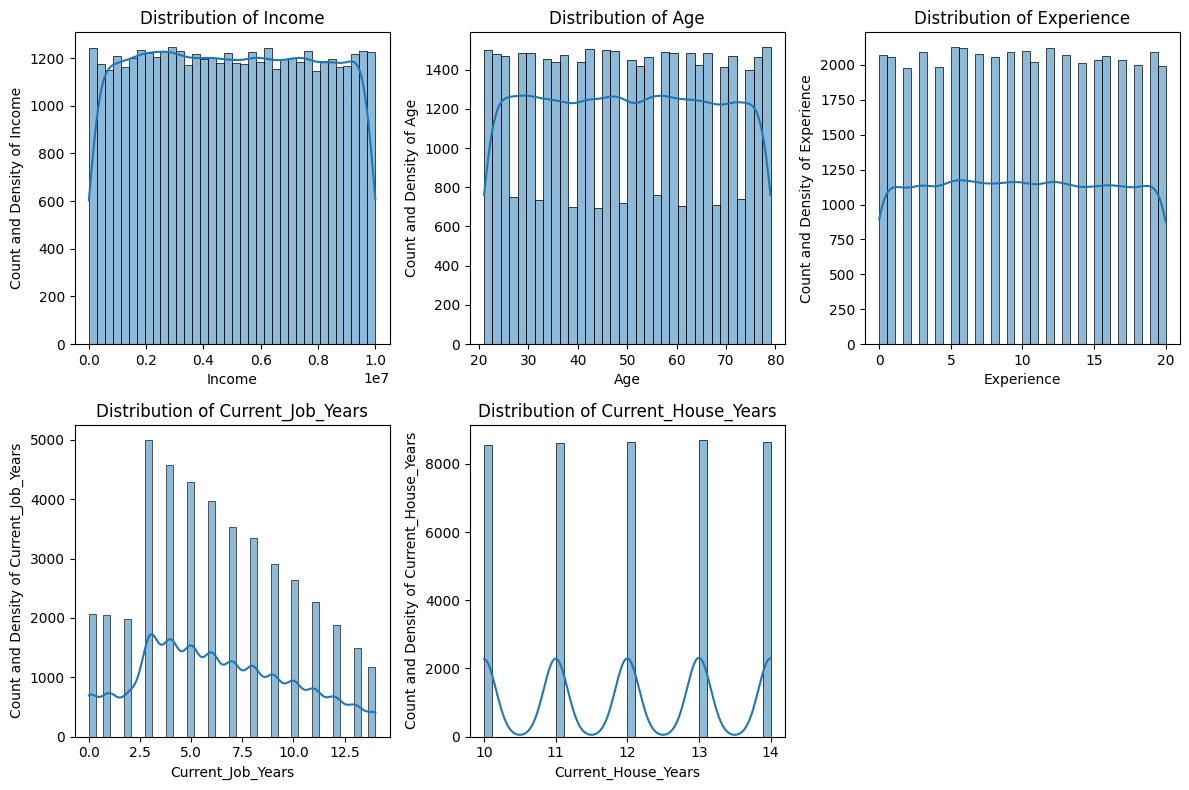

In [21]:
# Hisplot function implementation
plot_dynamic_hisplots_kdeplots(df=df, col_series=nums_cols, ncols=3, figsize=(12, 8))

In [22]:
# Distribution type analysis
def identify_distribution_types(df, col_series, uniform_cols=None, multimodal_cols=None):
    """
    Identifies and categorizes the distribution type of each numerical column in the DataFrame based on skewness and kurtosis.
    Allows manual specification of columns suspected to be uniform or bimodal/multimodal.

    Parameters: 
    df : pd.DataFrame
        The input DataFrame containing the data.
    col_series : list of str 
        List of column names to analyze for distribution type.
    uniform_cols : list of str, optional
        List of column names suspected to be uniform. Default is None.
    bimodal_cols : list of str, optional
        List of column names suspected to be bimodal/multimodal. Default is None.

    Returns:
    pd.DataFrame: A DataFrame containing the columns' names, skewness values, kurtosis values, and identified distribution type.
    """
    # Initialize lists to store results
    mean_list = []
    median_list = []
    mode_list = []
    skew_type_list = []
    skew_val_list = []
    kurtosis_val_list = []

    # Loop through each column to calculate distribution metrics
    for col in col_series:
        data = df[col].dropna()  # Remove any NaN values

        # Calculate summary statistics
        mean = round(data.mean(), 3)
        median = data.median()
        mode = data.mode()[0] if not data.mode().empty else median  # Handle case where mode is empty
        skew_val = round(skew(data, nan_policy="omit"), 3)
        kurtosis_val = round(kurtosis(data, nan_policy="omit"), 3)

        # Identify distribution type based on skewness and summary statistics
        if (mean == median == mode) or (-0.2 < skew_val < 0.2):
            skew_type = "Normal Distribution (Symmetric)"
        elif mean < median < mode:
            if skew_val <= -1:
                skew_type = "Highly Negatively Skewed"
            elif -0.5 >= skew_val > -1:
                skew_type = "Moderately Negatively Skewed"
            else:
                skew_type = "Moderately Normal Distribution (Symmetric)"
        else:
            if skew_val >= 1:
                skew_type = "Highly Positively Skewed"
            elif 0.5 <= skew_val < 1:
                skew_type = "Moderately Positively Skewed"
            else:
                skew_type = "Moderately Normal Distribution (Symmetric)"
        
        # Append the results to the lists
        mean_list.append(mean)
        median_list.append(median)
        mode_list.append(mode)
        skew_type_list.append(skew_type)
        skew_val_list.append(skew_val)
        kurtosis_val_list.append(kurtosis_val)
    
    # Create a DataFrame to store the results
    dist = pd.DataFrame({
        "Column Name": col_series,
        "Mean": mean_list,
        "Median": median_list,
        "Mode": mode_list,
        "Skewness": skew_val_list,
        "Kurtosis": kurtosis_val_list,
        "Type of Distribution": skew_type_list
    })

    # Manually assign specific distributions based on user-provided column names
    if uniform_cols:
        dist.loc[dist['Column Name'].isin(uniform_cols), 'Type of Distribution'] = 'Uniform Distribution'
    if multimodal_cols:
        dist.loc[dist['Column Name'].isin(multimodal_cols), 'Type of Distribution'] = 'Multi-modal Distribution'

    return dist

In [23]:
# Distribution type function implementation
columns_to_check = nums_cols # List of columns to check distribution
uniform_columns = ['Income', 'Age', 'Experience']  # List of uniform columns (special case)
multimodal_columns = ['Current_House_Years']  # List of multi-modal columns (special case)

identify_distribution_types(df, col_series=columns_to_check, uniform_cols=uniform_columns, multimodal_cols=multimodal_columns)

Column Name         Mean     Median     Mode  Skewness  Kurtosis  \
0               Income  4999184.481  4984654.5  5238806     0.008    -1.198   
1                  Age       49.917       50.0       79     0.006    -1.199   
2           Experience        9.975       10.0        5     0.006    -1.195   
3    Current_Job_Years        6.299        6.0        3     0.261    -0.787   
4  Current_House_Years       12.006       12.0       13    -0.007    -1.298   

                         Type of Distribution  
0                        Uniform Distribution  
1                        Uniform Distribution  
2                        Uniform Distribution  
3  Moderately Normal Distribution (Symmetric)  
4                    Multi-modal Distribution

In [24]:
# Experiment using kstest and diptest
# from scipy.stats import skew, kurtosis, kstest
# from diptest import diptest

# def analyze_distribution(df, analyze_columns):
#     distribution_type_list = []
#     skew_val_list = []
#     kurtosis_val_list = []
#     p_value_ks_list = []
#     p_value_dip_list = []
#     mean_list = []
#     median_list = []
#     mode_list = []

#     for column in nums_cols:
#         data = df[column].dropna()

#         mean = round(data.mean(), 3)
#         median = data.median()
#         mode = data.mode().iloc[0]  # Take the first mode if there are multiple

#         skew_val = round(skew(data, nan_policy="omit"), 3)
#         kurtosis_val = round(kurtosis(data, nan_policy="omit"), 3)

#         # Scale data to the range [0, 1]
#         data_min, data_max = data.min(), data.max()
#         scaled_data = (data - data_min) / (data_max - data_min)

#         threshold_pvalue = 0.05

#         try:
#             # Kolmogorov-Smirnov Test for uniform distribution
#             _, p_value_ks = kstest(scaled_data, 'uniform')

#             # Perform Dip Test for multimodal distribution
#             _, p_value_dip = diptest(data)

#             # Determine the type of distribution
#             if p_value_dip < threshold_pvalue:
#                 distribution_type = "Multimodal Distribution"
#             elif p_value_ks > threshold_pvalue and abs(kurtosis_val + 1.2) < 0.5:
#                 distribution_type = "Uniform Distribution"

#             elif abs(skew_val) < 0.2 and abs(kurtosis_val) < 0.2:
#                 distribution_type = "Normal Distribution (Symmetric)"
                
#             else:
#                 # Use mean-median-mode relationship
#                 if mean < median < mode:
#                     distribution_type = "Negatively Skewed"
#                 elif mean > median > mode:
#                     distribution_type = "Positively Skewed"
#                 else:
#                     # Fallback to skewness value if mean-median-mode relationship is inconclusive
#                     if skew_val < -0.2:
#                         distribution_type = "Negatively Skewed"
#                     elif skew_val > 0.2:
#                         distribution_type = "Positively Skewed"
#                     else:
#                         distribution_type = "Approximately Symmetric"

#                 # Add intensity of skewness
#                 if abs(skew_val) >= 1:
#                     distribution_type = "Highly " + distribution_type
#                 elif abs(skew_val) >= 0.5:
#                     distribution_type = "Moderately " + distribution_type

#             distribution_type_list.append(distribution_type)
#             skew_val_list.append(skew_val)
#             kurtosis_val_list.append(kurtosis_val)
#             p_value_ks_list.append(round(p_value_ks, 3))
#             p_value_dip_list.append(round(p_value_dip, 3))
#             mean_list.append(mean)
#             median_list.append(median)
#             mode_list.append(mode)
        
#         except Exception as e:
#             print(f"Error processing column {column}: {str(e)}")
            
#     dist = pd.DataFrame({
#         "Column Name": analyze_columns,
#         "Mean": mean_list,
#         "Median": median_list,
#         "Mode": mode_list,
#         "Skewness": skew_val_list,
#         "Kurtosis": kurtosis_val_list,
#         "p-value_ks": p_value_ks_list,
#         "p-value_dip": p_value_dip_list,
#         "Type of Distribution": distribution_type_list
#     })

#     return dist

# analyze_columns = nums_cols
# result = analyze_distribution(df, analyze_columns)
# result

In [25]:
# Boxplot analysis
def plot_dynamic_boxplots_violinplots(df, col_series, plot_type='boxplot', ncols=6, figsize=(26, 18), orientation='v', hue=None):
    """
    Creates a dynamic grid of either boxplots or violin plots for multiple numerical columns.
    
    Parameters:
    ----------
    df : pandas.DataFrame
        The DataFrame containing the data to plot.
    col_series : list of str
        List of column names to include in the plots.
    plot_type : str, optional, default='boxplot'
        Type of plot to generate. Options are 'boxplot' or 'violinplot'.
    ncols : int, optional, default=6
        Number of columns in the subplot grid. Adjust this value to change grid width.
    figsize : tuple, optional, default=(26, 18)
        Size of the figure to control plot dimensions.
    orientation : str, optional, default='v'
        Orientation of the plots. Use 'v' for vertical and 'h' for horizontal.
    hue : str, optional, default=None
        Column name to use for color encoding. Creates separate plots for each category.
    
    Returns:
    -------
    None
        Displays a grid of plots.
    
    Examples:
    --------
    >>> # Create vertical boxplots
    >>> plot_dynamic_boxplots_violinplots(df, ['col1', 'col2'], plot_type='boxplot', orientation='v')
    
    >>> # Create horizontal violin plots with categorical splitting
    >>> plot_dynamic_boxplots_violinplots(df, ['col1', 'col2'], plot_type='violinplot', 
                                        orientation='h', hue='category')
    """
    # Validate plot_type parameter
    if plot_type not in ['boxplot', 'violinplot']:
        raise ValueError("plot_type must be either 'boxplot' or 'violinplot'")

    # Calculate required number of rows based on number of plots and specified columns
    num_plots = len(col_series)
    nrows = math.ceil(num_plots / ncols)
    
    # Adjust figsize based on orientation
    if orientation == 'h':
        figsize = (figsize[1], figsize[0])  # Swap width and height for horizontal plots
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    ax = ax.flatten()  # Flatten the axes array for easy indexing

    # Generate plots for each column
    for i, col in enumerate(col_series):
        if plot_type == 'boxplot':
            if orientation == 'v':
                sns.boxplot(data=df, ax=ax[i], y=col, orient='v', hue=hue)
                ax[i].set_title(f'Boxplot of {col}')
            else:  # orientation == 'h'
                sns.boxplot(data=df, ax=ax[i], x=col, orient='h', hue=hue)
                ax[i].set_title(f'Boxplot of {col}')
        else: # violinplot
            if orientation == 'v':
                sns.violinplot(data=df, ax=ax[i], y=col, orient='v', hue=hue)
                ax[i].set_title(f'Violinplot of {col}')
            else:  # orientation == 'h'
                sns.violinplot(data=df, ax=ax[i], x=col, orient='h', hue=hue)
                ax[i].set_title(f'Violinplot of {col}')

    # Remove any unused subplots if total subplots exceed columns in cols
    for j in range(num_plots, len(ax)):
        fig.delaxes(ax[j])

    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

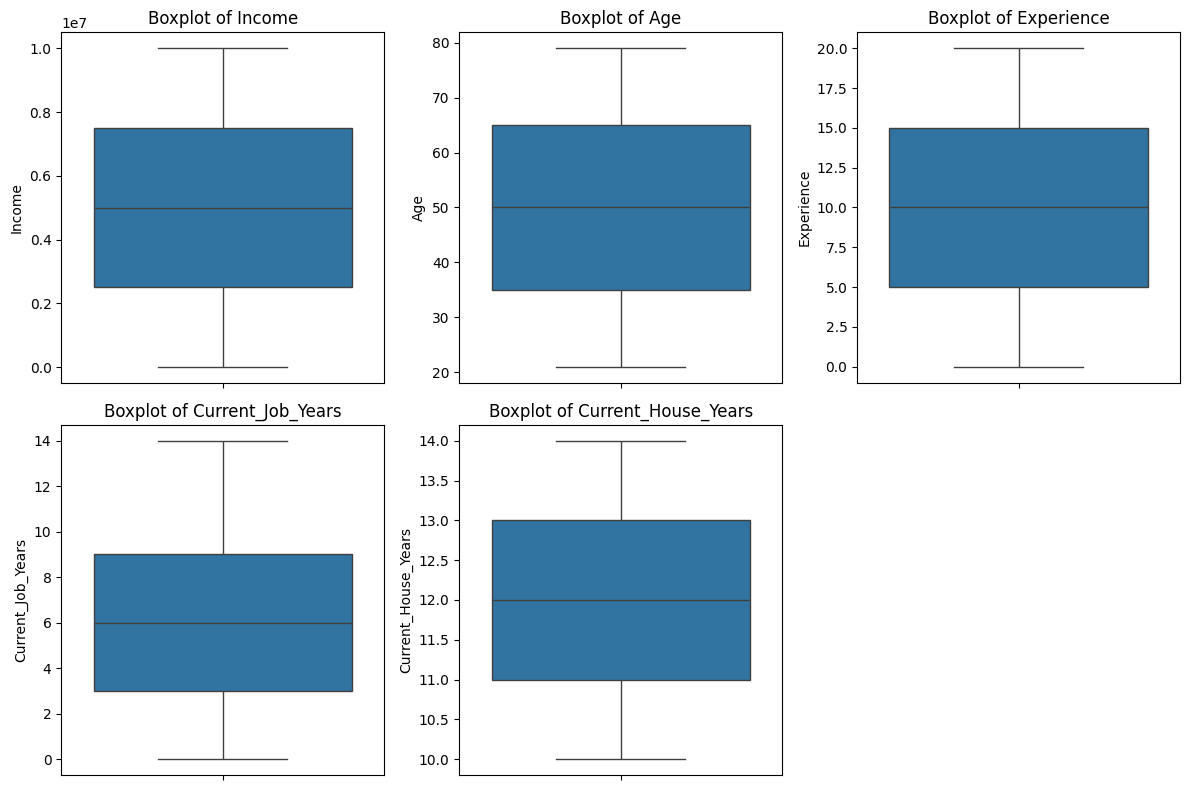

In [26]:
# Boxplot function implementation
plot_dynamic_boxplots_violinplots(df, col_series=nums_cols, ncols=3, figsize=(12, 8), orientation='v')

In [27]:
# Detect outliers in dataframe using IQR method
def outlier_detection_iqr(df, col_series):
    """
    Function to detect outliers in a dataframe using the IQR method.
    
    Parameters:
    df : pd.DataFrame 
        The dataframe containing the data.
    col_series : list of str
        List of column names to include in the analysis.
    
    Returns:
    pd.DataFrame: A summary dataframe showing the number of outliers and non-outliers 
                  for each numeric column, along with the IQR bounds and outlier percentage.
    """
    print(f'Amount of Rows: {len(df)}')
    
    outlier = []  # Store the number of outlier rows per column
    no_outlier = []  # Store the number of non-outlier rows per column
    is_outlier = []  # Boolean indicating whether any outliers exist in the column
    low_bound = []  # Lower bound for outliers (Q1 - 1.5 * IQR)
    high_bound = []  # Upper bound for outliers (Q3 + 1.5 * IQR)
    outlier_percentage = []  # Percentage of outliers for each column

    # Start with all rows marked as True (non-outliers) in the cumulative filter
    filtered_entries = np.array([True] * len(df))

    for col in col_series:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (IQR * 1.5)
        upper_bound = Q3 + (IQR * 1.5)

        # Create a filter that identifies non-outliers for the current column
        filter_outlier = ((df[col] >= lower_bound) & (df[col] <= upper_bound))

        # Append the statistics and filter results
        outlier_count = len(df[~filter_outlier])  # Count of outliers
        non_outlier_count = len(df[filter_outlier])  # Count of non-outliers
        outlier_percentage.append(round((outlier_count / len(df)) * 100, 2))  # Percentage of outliers
        outlier.append(outlier_count)
        no_outlier.append(non_outlier_count)
        is_outlier.append(df[col][~filter_outlier].any())  # Whether any outliers exist
        low_bound.append(lower_bound)  # Lower IQR bound
        high_bound.append(upper_bound)  # Upper IQR bound

        # Update the cumulative filter to only include rows that are non-outliers across all columns
        filtered_entries = filtered_entries & filter_outlier

    # Final printout of cumulative outlier statistics across all columns
    print(f'Amount of Outlier Rows (Across All Columns): {len(df[~filtered_entries])}')
    print(f'Amount of Non-Outlier Rows (Across All Columns): {len(df[filtered_entries])}')
    print(f'Percentage of Outliers: {round(len(df[~filtered_entries]) / len(df) * 100, 2)}%')
    print()

    # Create a summary dataframe
    check_outliers = pd.DataFrame({
        'Column Name': col_series,
        'Outlier Exist': is_outlier,
        'Lower Limit': low_bound,
        'Upper Limit': high_bound,
        'Outlier Data': outlier,
        'Non-Outlier Data': no_outlier,
        'Outlier Percentage (%)': outlier_percentage
    })

    return check_outliers

In [28]:
# Detect outliers in dataframe using Z-Score method
def outlier_detection_zscore(df, col_series, threshold=3):
    """
    Function to detect outliers in a dataframe using the Z-Score method.
    
    Parameters:
    df : pd.DataFrame 
        The dataframe containing the data.
    col_series : list of str
        List of column names to include in the analysis.
    threshold : float, optional (default=3)
        Number of standard deviations to use as the outlier cutoff.
    
    Returns:
    pd.DataFrame: A summary dataframe showing the number of outliers and non-outliers 
                  for each numeric column, along with Z-Score bounds and outlier percentage.
    """
    print(f'Amount of Rows: {len(df)}')
    
    outlier = []  # Store the number of outlier rows per column
    no_outlier = []  # Store the number of non-outlier rows per column
    is_outlier = []  # Boolean indicating whether any outliers exist in the column
    low_bound = []  # Lower bound for outliers based on Z-Score
    high_bound = []  # Upper bound for outliers based on Z-Score
    outlier_percentage = []  # Percentage of outliers for each column

    # Start with all rows marked as True (non-outliers) in the cumulative filter
    filtered_entries = np.array([True] * len(df))

    for col in col_series:
        # Calculate Z-Scores
        z_scores = np.abs(stats.zscore(df[col]))
        
        # Create a filter that identifies non-outliers
        filter_outlier = (z_scores < threshold)

        # Calculate bounds based on mean and standard deviation
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - (threshold * std)
        upper_bound = mean + (threshold * std)

        # Append the statistics and filter results
        outlier_count = len(df[~filter_outlier])  # Count of outliers
        non_outlier_count = len(df[filter_outlier])  # Count of non-outliers
        outlier_percentage.append(round((outlier_count / len(df)) * 100, 2))  # Percentage of outliers
        outlier.append(outlier_count)
        no_outlier.append(non_outlier_count)
        is_outlier.append(df[col][~filter_outlier].any())  # Whether any outliers exist
        low_bound.append(lower_bound)  # Lower Z-Score bound
        high_bound.append(upper_bound)  # Upper Z-Score bound

        # Update the cumulative filter to only include rows that are non-outliers across all columns
        filtered_entries = filtered_entries & filter_outlier

    # Final printout of cumulative outlier statistics across all columns
    print(f'Amount of Outlier Rows (Across All Columns): {len(df[~filtered_entries])}')
    print(f'Amount of Non-Outlier Rows (Across All Columns): {len(df[filtered_entries])}')
    print(f'Percentage of Outliers: {round(len(df[~filtered_entries]) / len(df) * 100, 2)}%')
    print()

    # Create a summary dataframe
    check_outliers = pd.DataFrame({
        'Column Name': col_series,
        'Outlier Exist': is_outlier,
        'Lower Limit': low_bound,
        'Upper Limit': high_bound,
        'Outlier Data': outlier,
        'Non-Outlier Data': no_outlier,
        'Outlier Percentage (%)': outlier_percentage
    })

    return check_outliers

In [29]:
# Outliers cheking with IQR method function implementation
outlier_summary = outlier_detection_iqr(df, col_series=nums_cols)
outlier_summary

Amount of Rows: 43190
Amount of Outlier Rows (Across All Columns): 0
Amount of Non-Outlier Rows (Across All Columns): 43190
Percentage of Outliers: 0.0%



Column Name  Outlier Exist  Lower Limit  Upper Limit  Outlier Data  \
0               Income          False  -4970445.25  14972894.75             0   
1                  Age          False       -10.00       110.00             0   
2           Experience          False       -10.00        30.00             0   
3    Current_Job_Years          False        -6.00        18.00             0   
4  Current_House_Years          False         8.00        16.00             0   

   Non-Outlier Data  Outlier Percentage (%)  
0             43190                     0.0  
1             43190                     0.0  
2             43190                     0.0  
3             43190                     0.0  
4             43190                     0.0

In [30]:
# Outliers cheking with IQR method function implementation
outlier_summary = outlier_detection_zscore(df, col_series=nums_cols)
outlier_summary

Amount of Rows: 43190
Amount of Outlier Rows (Across All Columns): 0
Amount of Non-Outlier Rows (Across All Columns): 43190
Percentage of Outliers: 0.0%



Column Name  Outlier Exist   Lower Limit   Upper Limit  \
0               Income          False -3.650282e+06  1.364865e+07   
1                  Age          False -1.252694e+00  1.010875e+02   
2           Experience          False -8.128215e+00  2.807830e+01   
3    Current_Job_Years          False -4.691828e+00  1.728979e+01   
4  Current_House_Years          False  7.768320e+00  1.624423e+01   

   Outlier Data  Non-Outlier Data  Outlier Percentage (%)  
0             0             43190                     0.0  
1             0             43190                     0.0  
2             0             43190                     0.0  
3             0             43190                     0.0  
4             0             43190                     0.0

- We should just check only using IQR since the distribution are mostly not normal, but i did it just to make sure.

- From those result, we know that **our dataset don't have any outliers and we won't be doing any outliers handling here**.

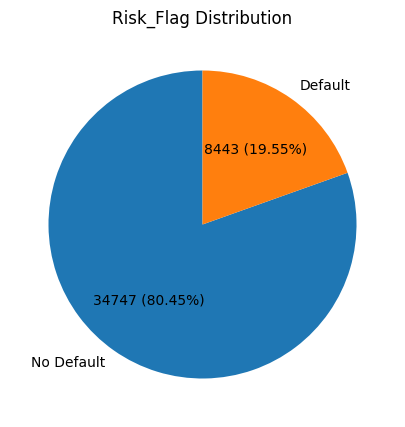

In [31]:
# Risk_Flag Distribution (Combined Pie Chart)
fig, ax = plt.subplots(figsize=(8, 5))
labels = ['No Default', 'Default']
sizes = df['Risk_Flag'].value_counts()

ax.pie(sizes, labels=labels, autopct=lambda p: '{:.0f} ({:.2f}%)'.format(p * sum(sizes) / 100, p), startangle=90)
ax.set_title('Risk_Flag Distribution')
plt.show()

## Categorical Columns

In [32]:
# Countplot analysis
def plot_dynamic_countplot(df, col_series, ncols=6, figsize=(26, 18), stat='count', hue=None, order=None):
    """
    Plots a dynamic grid of countplot for a list of categorical columns from a DataFrame.
    
    Parameters:
    ----------
    df : pandas.DataFrame
        The DataFrame containing the data to plot.
    col_series : list of str
        List of column names to include in the countplots.
    ncols : int, optional, default=6
        Number of columns in the subplot grid. Adjust this value to change grid width.
    figsize : tuple, optional, default=(26, 18)
        Size of the figure to control plot dimensions.
    stat : str, optional, default='count'
        The statistic to compute for the bars
    hue : str, optional, default=None
        Column name to use for color encoding
    order : list, optional, default=None
        Specific ordering for the categorical variables
    
    Returns:
    -------
    None
        Displays a grid of countplots.
    """
    
    # Calculate required number of rows based on number of plots and specified columns
    num_plots = len(col_series)
    nrows = math.ceil(num_plots / ncols)
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    ax = ax.flatten()  # Flatten the axes array for easy indexing

    # Generate countplot for each column
    for i, col in enumerate(col_series):
        # Get the specific order for this column if provided
        if isinstance(order, list):
            current_order = order[i].tolist() if hasattr(order[i], 'tolist') else order[i]
        else:
            current_order = None

        sns.countplot(data=df,
                     ax=ax[i], 
                     x=col, 
                     stat=stat, 
                     hue=hue,
                     order=current_order)
        ax[i].set_title(f'Countplot of {col}')
        ax[i].set_ylabel(f'Count of {col}')
        ax[i].set_xlabel(f'{col}')

        # Add value labels on top of bars
        for p in ax[i].patches:
            ax[i].annotate(
                f'{int(p.get_height())}',  # The text to display
                (p.get_x() + p.get_width() / 2., p.get_height()),  # The position
                ha='center',  # Horizontal alignment
                va='bottom'   # Vertical alignment
            )

    # Remove any unused subplots if total subplots exceed columns in cols
    for j in range(num_plots, len(ax)):
        fig.delaxes(ax[j])

    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

In [33]:
# # Additional : Same result with countplot but with barplot
# def plot_dynamic_barplot(df, col_series, ncols=6, figsize=(26, 18), hue=None, order=None):
#     """
#     Plots a dynamic grid of barplots for a list of categorical columns from a DataFrame.
    
#     Parameters:
#     ----------
#     df : pandas.DataFrame
#         The DataFrame containing the data to plot.
#     col_series : list of str
#         List of column names to include in the barplots.
#     ncols : int, optional, default=6
#         Number of columns in the subplot grid. Adjust this value to change grid width.
#     figsize : tuple, optional, default=(26, 18)
#         Size of the figure to control plot dimensions.
#     hue : str, optional, default=None
#         Column name to use for color encoding
#     order : list, optional, default=None
#         Specific ordering for the categorical variables
    
#     Returns:
#     -------
#     None
#         Displays a grid of barplots.
#     """
    
#     # Calculate required number of rows based on number of plots and specified columns
#     num_plots = len(col_series)
#     nrows = math.ceil(num_plots / ncols)
    
#     fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
#     ax = ax.flatten()  # Flatten the axes array for easy indexing

#     # Generate barplot for each column
#     for i, col in enumerate(col_series):
#         # Pre-aggregate the data
#         if hue is None:
#             # Simple count aggregation
#             plot_data = df[col].value_counts().reset_index()
#             plot_data.columns = [col, 'count']
#             x = col
#             y = 'count'
#         else:
#             # Aggregation with hue
#             plot_data = df.groupby([col, hue]).size().reset_index(name='count')
#             x = col
#             y = 'count'

#         # Get the specific order for this column if provided
#         if isinstance(order, list):
#             current_order = order[i].tolist() if hasattr(order[i], 'tolist') else order[i]
#         else:
#             current_order = None

#         # Create barplot
#         sns.barplot(data=plot_data,
#                    ax=ax[i], 
#                    x=x,
#                    y=y,
#                    hue=hue,
#                    order=current_order)
        
#         ax[i].set_title(f'Distribution of {col}')
#         ax[i].set_ylabel('Count')
#         ax[i].set_xlabel(f'{col}')

#         # Add value labels on top of bars
#         for p in ax[i].patches:
#             ax[i].annotate(
#                 f'{int(p.get_height())}',  # The text to display
#                 (p.get_x() + p.get_width() / 2., p.get_height()),  # The position
#                 ha='center',  # Horizontal alignment
#                 va='bottom'   # Vertical alignment
#             )

#         # Rotate x-axis labels if needed
#         plt.setp(ax[i].get_xticklabels(), rotation=45, ha='right')

#     # Remove any unused subplots if total subplots exceed columns in cols
#     for j in range(num_plots, len(ax)):
#         fig.delaxes(ax[j])

#     plt.tight_layout()  # Adjust layout to avoid overlap
#     plt.show()

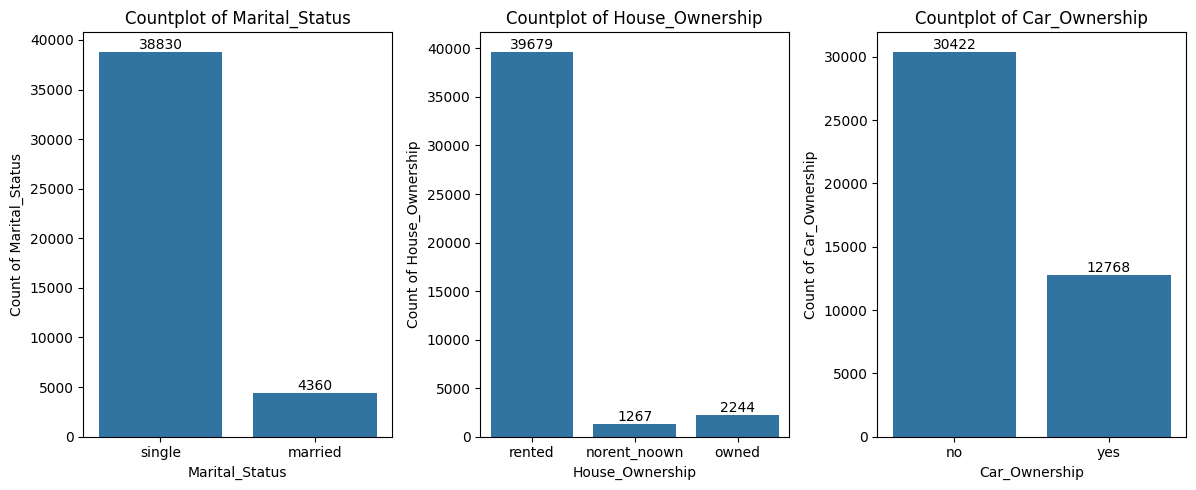

In [34]:
# Countplot function implementation (for few unique values columns)
cats_few = ['Marital_Status', 'House_Ownership', 'Car_Ownership']
plot_dynamic_countplot(df=df, col_series=cats_few, ncols=5, figsize=(20, 5))

In [35]:
# # Another way plotting categorical values : individual plots in a loop (the usual is subplot in a grid)
# cats_few = ['Marital_Status', 'House_Ownership', 'Car_Ownership']

# for cat in cats_few:
#     fig, ax = plt.subplots(figsize=(8, 6))
#     sns.countplot(data = df, x = cat, ax = ax)
#     ax.set_title(f'Countplot for {cat}')
#     ax.set_ylabel(f'Count {cat}')
#     ax.tick_params(axis='x')
#     ax.bar_label(ax.containers[0])

#     plt.tight_layout()
#     plt.show()

Profession, State, and City are too many to be plotted altogether since they have many unique values, so we will only look at the top 10.

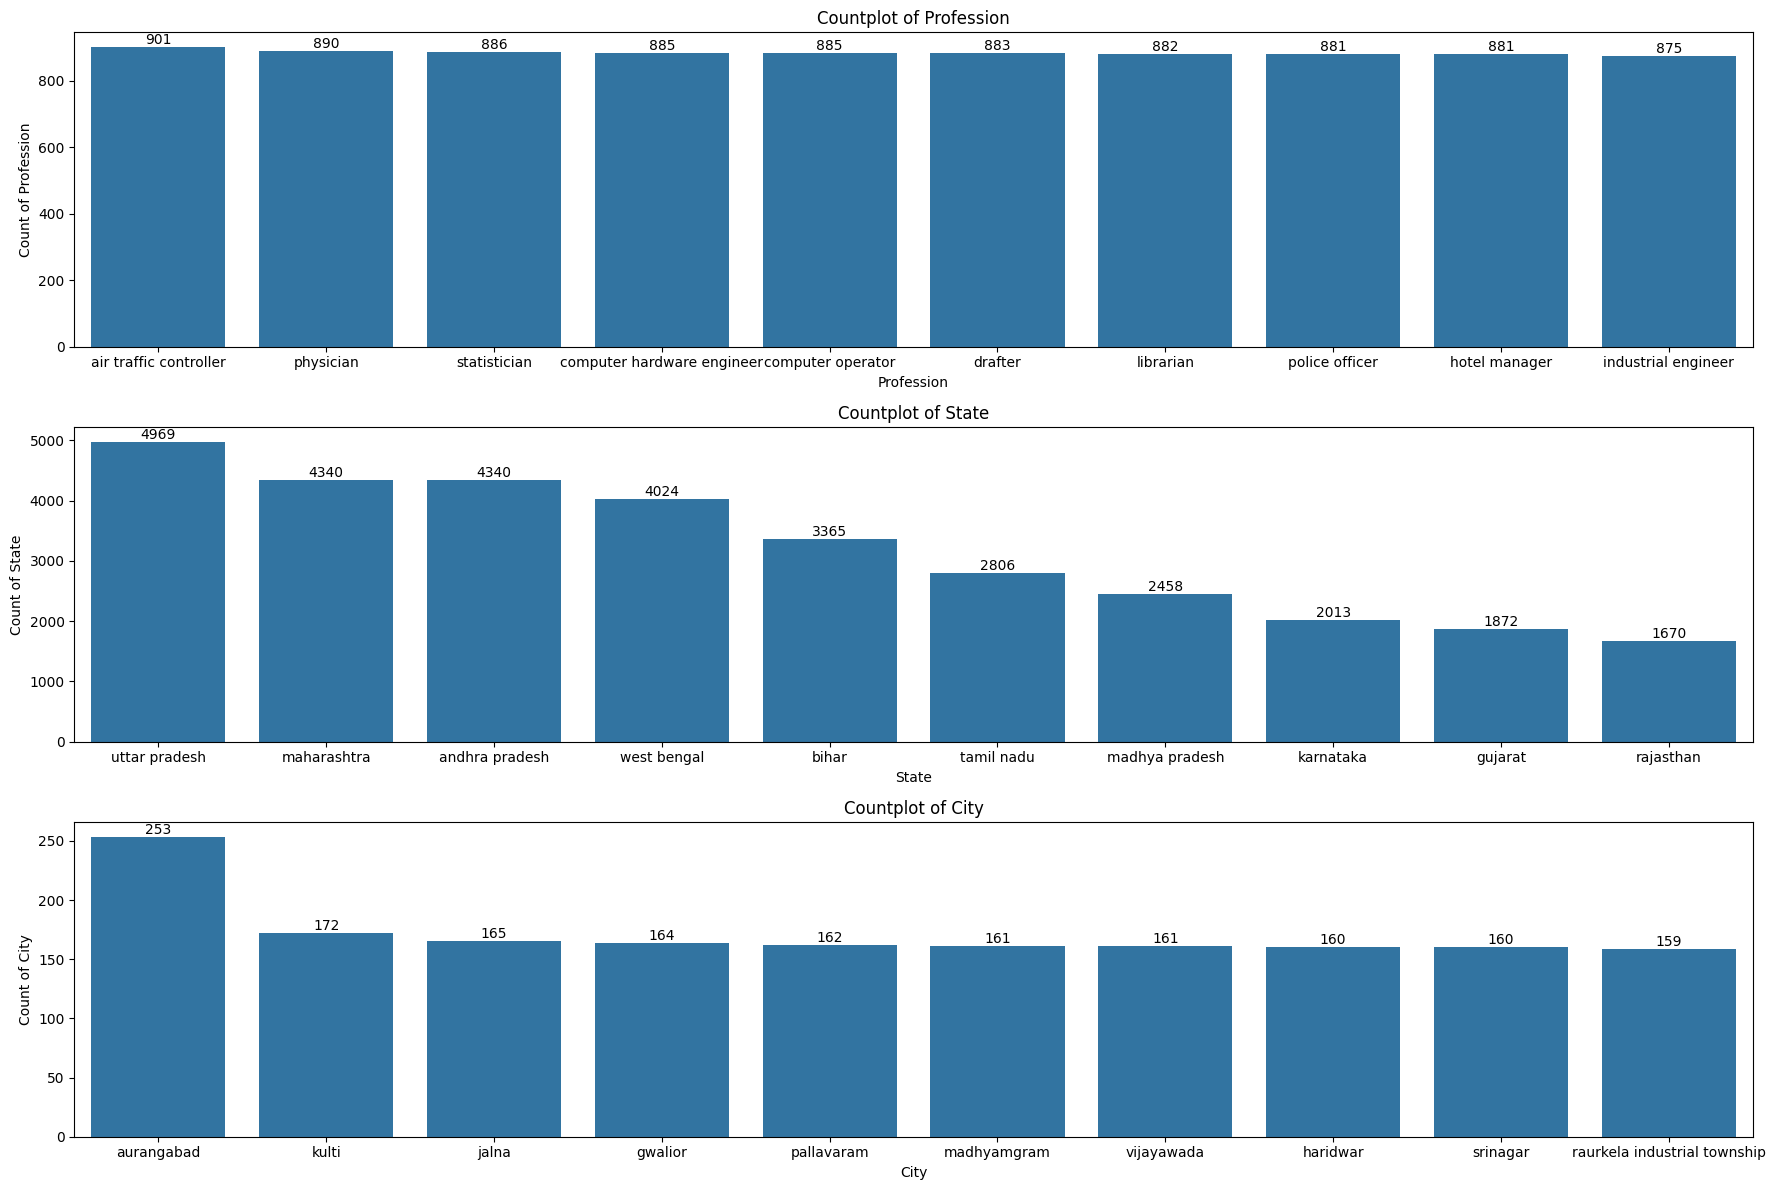

In [36]:
# Countplot function implementation (for few unique values columns)
cats_many = ['Profession', 'State', 'City']

# Show top 10 categories for each column
plot_dynamic_countplot(
    df=df, 
    col_series=cats_many, 
    ncols=1, 
    figsize=(18, 12),
    order=[df[cat].value_counts().iloc[:10].index.tolist() for cat in cats_many]
)

In [37]:
# # Another way plotting categorical values : individual plots in a loop (the usual is subplot in a grid)
# cats_many = ['Profession', 'State', 'City']

# for cat in cats_many :
#     fig, ax = plt.subplots(figsize=(15,6))
#     sns.countplot(data = df, x = cat, ax = ax, order = df[cat].value_counts().iloc[:10].index)
#     ax.set_title(f'Countplot for {cat}')
#     ax.set_ylabel(f'Count {cat}')
#     ax.tick_params(axis='x')
#     ax.bar_label(ax.containers[0])

#     plt.tight_layout()
#     plt.show()

# Univariate Analysis Findings

- For the analysis of numerical columns, several findings were observed:

    1. The distribution of the target variable (Risk_Flag) is bimodal, with a significant dominance of the value 0 (No default or non-failure to pay).

    2. Features like Income, Age, and Experience exhibit a uniform distribution, while Current_House_Years and Current_Job_Years have multi-modal distributions as indicated by histplot with kde. No outliers were detected for the overall numerical features based on boxplots.

    3. Some features, such as Income and Age, may require scaling due to their large value ranges compared to other numerical features.

- For the analysis of categorical columns, several observations were made:

    1. Categories in the Profession, City, and State features have too many unique values, making it challenging to plot the entire distribution.

    2. Some features have dominating values, including: (feature name : value name)
        - Car_Ownership : no
        - House_Ownership : rented
        - Married/Single : single

- Some follow-up steps during data pre-processing include:

    1. Handling categorical data from features like Profession, City, and State with a large number of unique values. This can be achieved by grouping or categorizing them to reduce the number of distinct values before encoding.

    2. Considering resampling due to class imbalance in the target variable, where Risk_Flag Default represents only 19.55% of the total data. This imbalance falls into the category of moderate (1-20%), and resampling may be necessary.

# Bivariate/Multivariate Analysis

<Figure size 1500x1500 with 0 Axes>

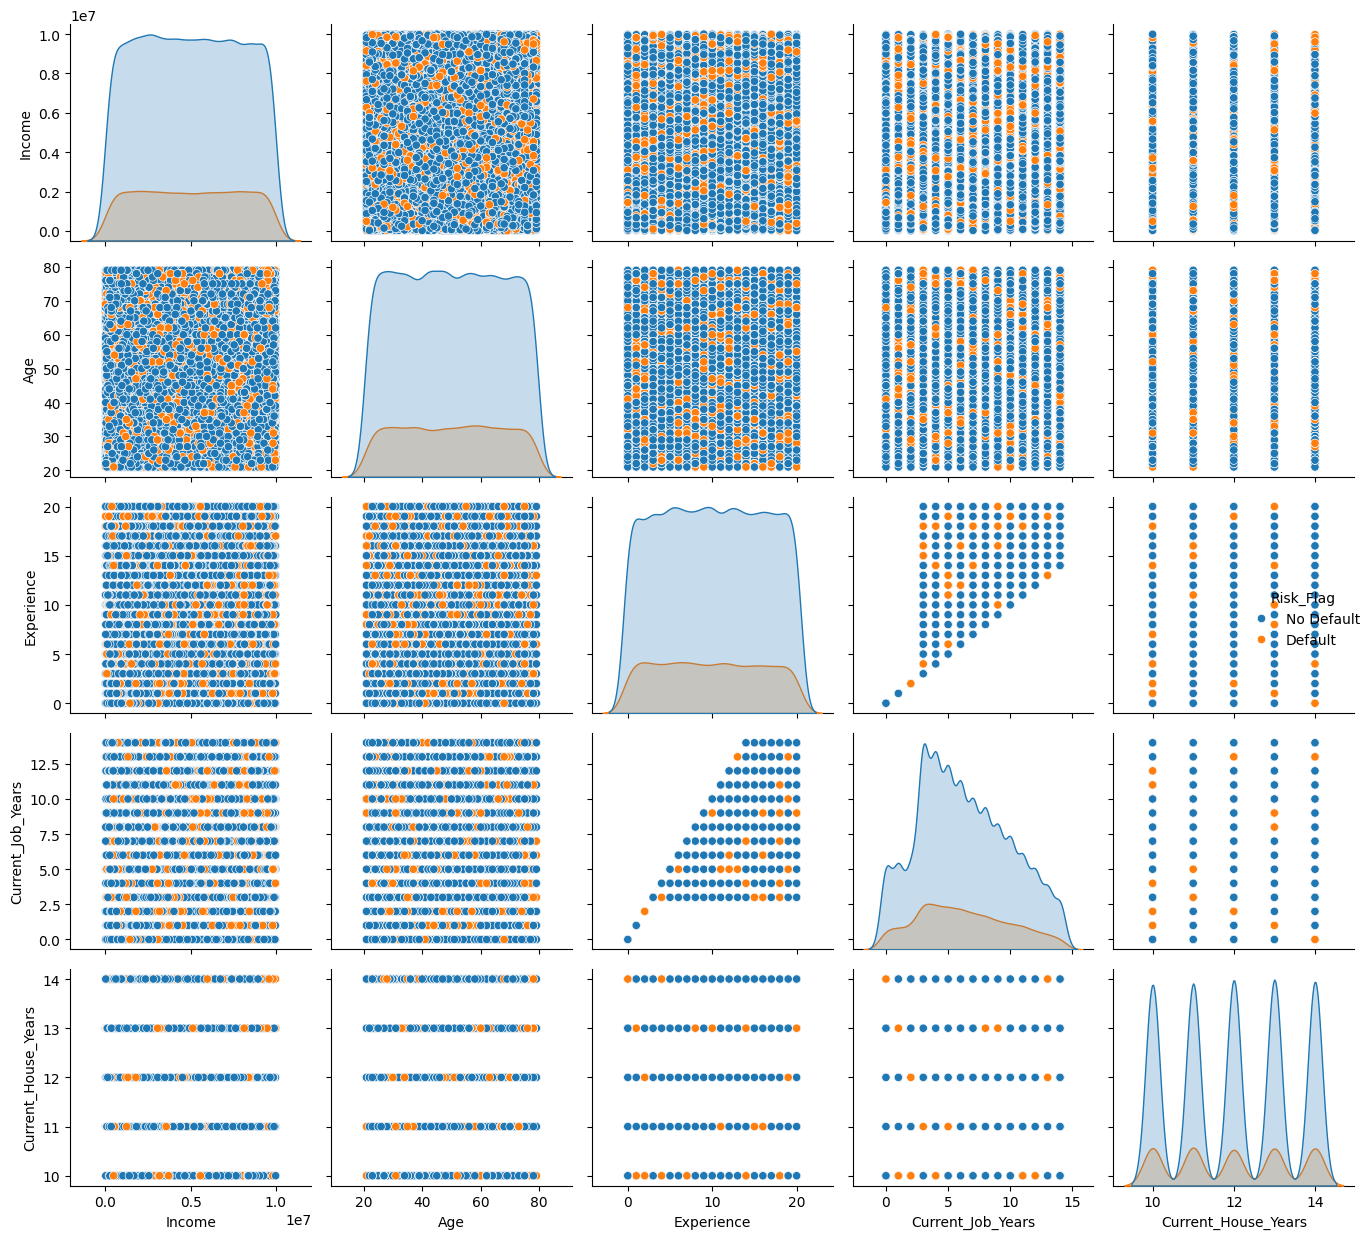

In [38]:
# Pairplot of numerical features
plt.figure(figsize=(15, 15))
sns.pairplot(data=df, diag_kind='kde', hue='Risk_Flag')
plt.tight_layout()
plt.show()

In [39]:
# Change the target datatype to numerical again for correlation analysis
change_target_dtype(data=df, target_type='numerical')

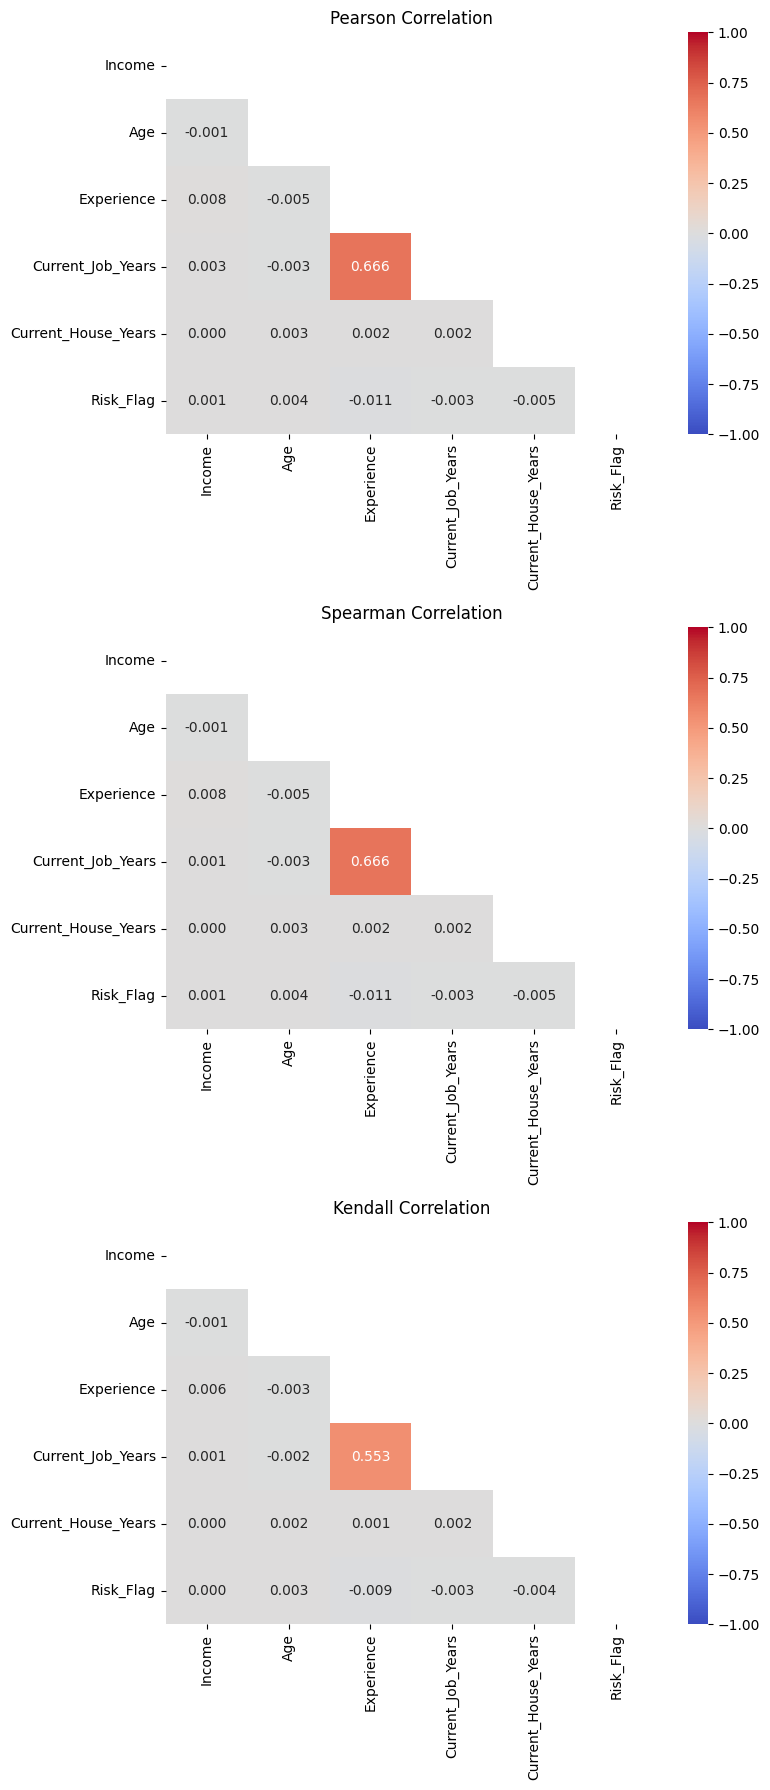

In [40]:
# Correlation heatmap of numerical features and target
fig, ax = plt.subplots(3, 1, figsize=(8, 18))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype=bool))

# Plot correlation heatmap with Pearson method
sns.heatmap(data=df.corr(numeric_only=True), mask=mask, cmap='coolwarm', annot=True, fmt='.3f', vmin=-1, vmax=1, ax=ax[0])
ax[0].set_title('Pearson Correlation')

# Plot correlation heatmap with Spearman method
sns.heatmap(data=df.corr(method='spearman', numeric_only=True), mask=mask, cmap='coolwarm', annot=True, fmt='.3f', vmin=-1, vmax=1, ax=ax[1])
ax[1].set_title('Spearman Correlation')

# Plot correlation heatmap with Kendall method
sns.heatmap(data=df.corr(method='kendall', numeric_only=True), mask=mask, cmap='coolwarm', annot=True, fmt='.3f', vmin=-1, vmax=1, ax=ax[2])
ax[2].set_title('Kendall Correlation')

plt.tight_layout()
plt.show()

Observing the relationship between non-linear feature-feature and feature-target pairs in the previous pairplot (scatterplot matrix), the use of the Pearson method may not be suitable. Therefore, when examining correlations using `df.corr()`, it is more appropriate to rely on the results of the Spearman method, which can capture non-linear relationships.

In [41]:
# Feature-Feature correlation representation in tabular form 
corr_feature = df.corr(method='spearman', numeric_only=True)

# Flatten correlation matrix
flat_cm = corr_feature.stack().reset_index()
flat_cm.columns = ['A', 'B', 'Corr Value']

# Filter the DataFrame using .loc for consistency
flat_cm = flat_cm.loc[
    (flat_cm['Corr Value'] < 1) & # Filter for the feature correlation by itself
    (flat_cm['A'] != "Risk_Flag") & # Filter out the target variable(s)
    (flat_cm['B'] != "Risk_Flag")
]

flat_cm['Corr Type'] = flat_cm['Corr Value'].apply(lambda x : 'Positive' if x >= 0 else 'Negative')
flat_cm['Corr Value'] = flat_cm['Corr Value'].apply(lambda x : abs(x))
flat_cm = flat_cm.sort_values(by='Corr Value', ascending=False, ignore_index=True)

redundan_cm = flat_cm.drop_duplicates(subset=['Corr Value', 'Corr Type']).reset_index(drop=True) # Filter for the feature correlation of A-B then B-A
print("Correlation Between Features :")
display(redundan_cm)

Correlation Between Features :


A                    B  Corr Value Corr Type
0           Experience    Current_Job_Years    0.666470  Positive
1           Experience               Income    0.008139  Positive
2                  Age           Experience    0.004861  Negative
3    Current_Job_Years                  Age    0.003360  Negative
4  Current_House_Years                  Age    0.003207  Positive
5    Current_Job_Years  Current_House_Years    0.002001  Positive
6           Experience  Current_House_Years    0.001909  Positive
7    Current_Job_Years               Income    0.001320  Positive
8                  Age               Income    0.000949  Negative
9               Income  Current_House_Years    0.000378  Positive

In [42]:
# Feature-Target correlation representation in tabular form 
corr_target = df.corrwith(df["Risk_Flag"], method='spearman', numeric_only=True)
corr = corr_target.reset_index(name='Corr Value').rename(columns={'index' : 'Feature'})

corr = corr.loc[corr['Feature'] != "Risk_Flag"] # Filter for the feature correlation by itself

corr['Corr Type'] = corr['Corr Value'].apply(lambda x : 'Positive' if x >= 0 else 'Negative')
corr['Corr Value'] = corr['Corr Value'].apply(lambda x : abs(x))
corr = corr.sort_values('Corr Value', ascending=False, ignore_index=True)

print("Correlation of Features to Target :")
display(corr)

Correlation of Features to Target :


Feature  Corr Value Corr Type
0           Experience    0.010709  Negative
1  Current_House_Years    0.004781  Negative
2                  Age    0.003846  Positive
3    Current_Job_Years    0.003427  Negative
4               Income    0.000510  Positive

In [43]:
# Change the target datatype to categorical again for correlation analysis
change_target_dtype(data=df, target_type='categorical')


Chi-Square Analysis Results:
--------------------------------------------------------------------------------


Feature  Chi-Square   P-Value  Cramér's V Effect Size  \
4             City  324.394735  0.345633    0.086665  Negligible   
3       Profession   41.374788  0.802354    0.030951  Negligible   
5            State   33.952804  0.167424    0.028038  Negligible   
2    Car_Ownership    5.418814  0.019921    0.011201  Negligible   
1  House_Ownership    0.868142  0.647866    0.004483  Negligible   
0   Marital_Status    0.062055  0.803277    0.001199  Negligible   

   Is Significant Strongest Category Association Direction  
4           False        yamunanagar              Positive  
3           False       psychologist              Positive  
5           False              bihar              Negative  
2            True                yes              Positive  
1           False       norent_noown              Positive  
0           False            married              Positive

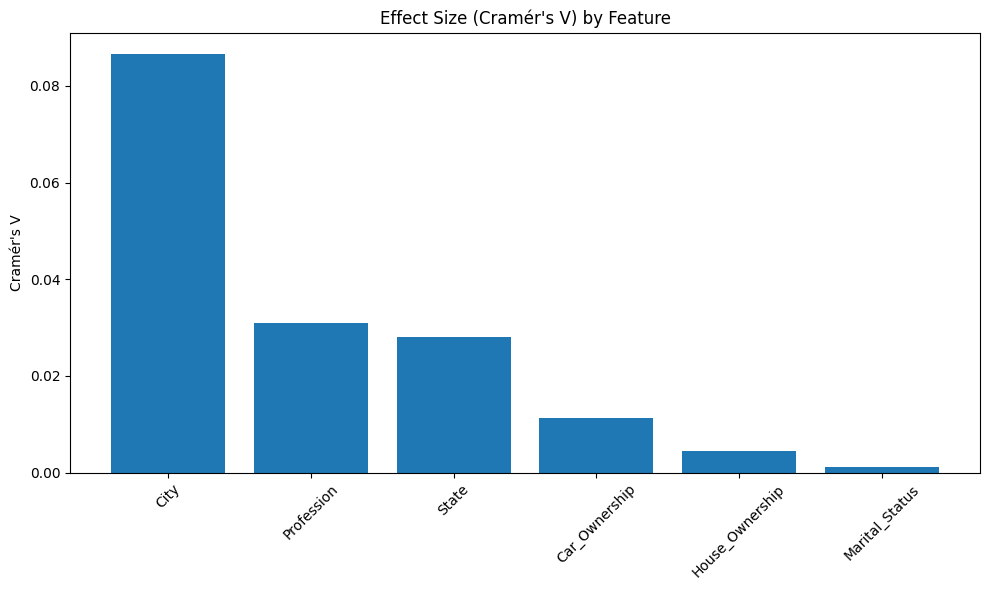

In [44]:
# Categorical features correlation analysis
def analyze_categorical_relationships(df, features, target, alpha=0.05):
    """
    Analyze relationships between categorical features and target using Chi-Square test
    and calculate effect sizes using Cramér's V.
    
    Parameters:
    -----------
    df : pandas DataFrame
        The input dataframe containing the features and target
    features : list
        List of categorical feature names
    target : str
        Name of the target variable
    alpha : float, optional (default=0.05)
        Significance level for the chi-square test
    
    Returns:
    --------
    pandas DataFrame
        Summary of the analysis including chi-square statistics, p-values, and effect sizes
    """
    results = []
    
    for feature in features:
        # Create contingency table
        contingency = pd.crosstab(df[feature], df[target])
        
        # Perform chi-square test
        chi2, p_value, dof, expected = chi2_contingency(contingency)
        
        # Calculate Cramér's V for effect size
        n = contingency.sum().sum()
        min_dim = min(contingency.shape) - 1
        cramer_v = np.sqrt(chi2 / (n * min_dim))
        
        # Calculate standardized residuals for post-hoc analysis
        observed = contingency.values
        standardized_residuals = (observed - expected) / np.sqrt(expected)
        
        # Determine significance and effect size interpretation
        is_significant = p_value < alpha
        
        # Interpret effect size (common thresholds for Cramér's V)
        if cramer_v < 0.1:
            effect_size = 'Negligible'
        elif cramer_v < 0.3:
            effect_size = 'Small'
        elif cramer_v < 0.5:
            effect_size = 'Medium'
        else:
            effect_size = 'Large'
            
        # Find categories with strongest associations
        max_residual_idx = np.unravel_index(
            np.abs(standardized_residuals).argmax(), 
            standardized_residuals.shape
        )
        strongest_category = contingency.index[max_residual_idx[0]]
        strongest_association = 'Positive' if standardized_residuals[max_residual_idx] > 0 else 'Negative'
        
        results.append({
            'Feature': feature,
            'Chi-Square': chi2,
            'P-Value': p_value,
            "Cramér's V": cramer_v,
            'Effect Size': effect_size,
            'Is Significant': is_significant,
            'Strongest Category': strongest_category,
            'Association Direction': strongest_association
        })
    
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('Cramér\'s V', ascending=False)
    
    return results_df

# Using your existing categorical features
cats_check_correlation = cats_cols_exclude_target

# Run the analysis
results = analyze_categorical_relationships(df, cats_check_correlation, 'Risk_Flag')

# Display results
print("\nChi-Square Analysis Results:")
print("-" * 80)
display(results)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(results['Feature'], results["Cramér's V"])
plt.title("Effect Size (Cramér's V) by Feature")
plt.xticks(rotation=45)
plt.ylabel("Cramér's V")
plt.tight_layout()
plt.show()

### Reminder : Understanding Chi-Square Test and Cramér's V

- **Chi-Square Test of Independence**

  - **Purpose**: The Chi-Square Test of Independence is used to determine whether there is a significant association between two categorical variables. It tests the null hypothesis that the variables are independent.

  - **How it Works**: 
    - A contingency table is created, showing the frequency distribution of the variables.
    - The test calculates the expected frequencies assuming the variables are independent.
    - The Chi-Square statistic is computed as the sum of the squared differences between observed and expected frequencies, divided by the expected frequencies.

  - **Formula**: 
    \[
    \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
    \]
    Where \(O_i\) is the observed frequency and \(E_i\) is the expected frequency.

  - **P-Value**: The p-value indicates the probability of observing the data if the null hypothesis is true. A low p-value (typically < 0.05) suggests rejecting the null hypothesis, indicating a significant association.

  - **Degrees of Freedom (dof)**: Calculated as \((r-1) \times (c-1)\), where \(r\) is the number of rows and \(c\) is the number of columns in the contingency table.

- **Cramér's V**

  - **Purpose**: Cramér's V is a measure of association between two categorical variables, providing a value between 0 and 1 to indicate the strength of the association.

  - **How it Works**: 
    - Based on the Chi-Square statistic, Cramér's V normalizes the value to account for the size of the contingency table.
    - It is particularly useful for tables larger than 2x2.

  - **Formula**: 
    \[
    V = \sqrt{\frac{\chi^2}{n \cdot \min(k-1, r-1)}}
    \]
    Where \(n\) is the total number of observations, \(k\) is the number of categories in one variable, and \(r\) is the number of categories in the other variable.

  - **Value Range**: 
    - 0 indicates no association.
    - 1 indicates a perfect association.
    - Common thresholds for interpretation:
      - **Negligible**: \(V < 0.1\)
      - **Small**: \(0.1 \leq V < 0.3\)
      - **Medium**: \(0.3 \leq V < 0.5\)
      - **Large**: \(V \geq 0.5\)

- **Usage in Data Analysis**

  - **Feature Selection**: Identify categorical features that have a significant association with the target variable, which can be important predictors in modeling.

  - **Data Exploration**: Understand the relationships between categorical variables to inform data preprocessing and feature engineering.

  - **Model Interpretation**: Provide insights into which categories are most strongly associated with the target, aiding in model interpretation and decision-making.

- **Code Implementation**

  The provided code performs the following:
  - Computes the Chi-Square statistic and p-value for each categorical feature against the target.
  - Calculates Cramér's V to measure the strength of the association.
  - Provides effect size interpretation and identifies the strongest category associations.
  - Visualizes the effect sizes using a bar plot for easy comparison.

This approach offers a comprehensive analysis of categorical variable relationships, helping you make informed decisions in your data science projects.

### Reminder : Issues with Using .corr() for Categorical Data

- **Why .corr() is Not Suitable**

   1. **Incorrect Assumptions**
      - `.corr()` calculates Pearson correlation by default, which assumes:
      - Linear relationships between variables
      - Continuous numerical data
      - Normal distribution of variables
      - Interval or ratio level measurements
      - Categorical data violates these assumptions as it represents discrete, non-ordered categories.

   2. **Label Encoding Problems**
      ```python
      # Example of problematic approach
      df_encoded = df[categorical_columns].apply(LabelEncoder().fit_transform)
      correlation = df_encoded.corr()  # This is misleading
      ```
      - Label encoding assigns arbitrary numerical values (0, 1, 2, etc.)
      - The numerical differences between encoded values have no meaningful interpretation
      - Example:
      - If 'married' = 1 and 'single' = 0
      - The difference (1-0) doesn't represent any real quantitative relationship
      - The ordering is arbitrary and could be reversed without changing the meaning

   3. **Misleading Results**
      - Correlations calculated this way can suggest relationships that don't actually exist
      - The strength and direction of correlations become arbitrary based on the encoding
      - Results can change dramatically with different encoding schemes

- **Better Alternatives**

   1. **Cramér's V**
      - Specifically designed for categorical data
      - Provides a meaningful measure of association
      - Range is always between 0 and 1
      - Not affected by arbitrary category encodings

   2. **Chi-Square Test**
      - Tests for statistical independence
      - Doesn't require numerical encoding
      - Provides p-values for significance testing

- **Example of Proper Implementation**

   ```python
   def create_categorical_correlation_matrix(df, categorical_columns):
      n_cols = len(categorical_columns)
      matrix = np.zeros((n_cols, n_cols))
      
      for i in range(n_cols):
         for j in range(i, n_cols):
               # Using Cramér's V instead of Pearson correlation
               cramers_v_val = cramers_v(
                  df[categorical_columns[i]], 
                  df[categorical_columns[j]]
               )
               matrix[i][j] = cramers_v_val
               matrix[j][i] = cramers_v_val
      
      return pd.DataFrame(
         matrix, 
         index=categorical_columns, 
         columns=categorical_columns
      )
   ```

- **Best Practices**

   1. **Always Use Appropriate Methods**
      - Use Cramér's V for categorical associations
      - Use Chi-square tests for independence testing
      - Consider the nature of your variables when choosing analysis methods

   2. **Documentation**
      - Clearly document the statistical methods used
      - Explain why certain approaches were chosen
      - Note any limitations or assumptions

   3. **Visualization**
      - Use appropriate visualization techniques
      - Consider using contingency tables and mosaic plots
      - Avoid visualizations that imply numerical relationships between categories

- **Impact on Analysis**

   Using `.corr()` on categorical data can lead to:
   - Incorrect feature selection decisions
   - Misunderstanding of variable relationships
   - Flawed model development strategies
   - Unreliable conclusions and recommendations

By using appropriate methods like Cramér's V and Chi-square tests, you ensure that your analysis of categorical relationships is statistically sound and meaningful for your data science projects.

Other references for categorical correlation : https://www.statology.org/correlation-between-categorical-variables/

# Multivariate Analysis Findings

- For the time being, from this EDA process (before performing feature encoding), the relationships among all numerical features and the target are considered to have low correlation (<0.02). The most relevant features are Experience (-0.01), Current_House_Years (-0.004), and Age (0.003).

- Experience and Current_Job_Years features have a relatively high positive correlation (0.666). This implies that the larger the experience, the longer the current job years, indicating that these two features are quite redundant. Therefore, one of them needs to be dropped; in this case, the feature to be dropped is Current_Job_Years as it has a lower correlation with the target compared to the Experience feature. Meanwhile, the relationships among other features have relatively low correlations, <= 0.01.

- In categorical correlation, the features are not that significant to the target variable.

# Business Insight (Multivariate Continuation)

### Default by Numerical Columns

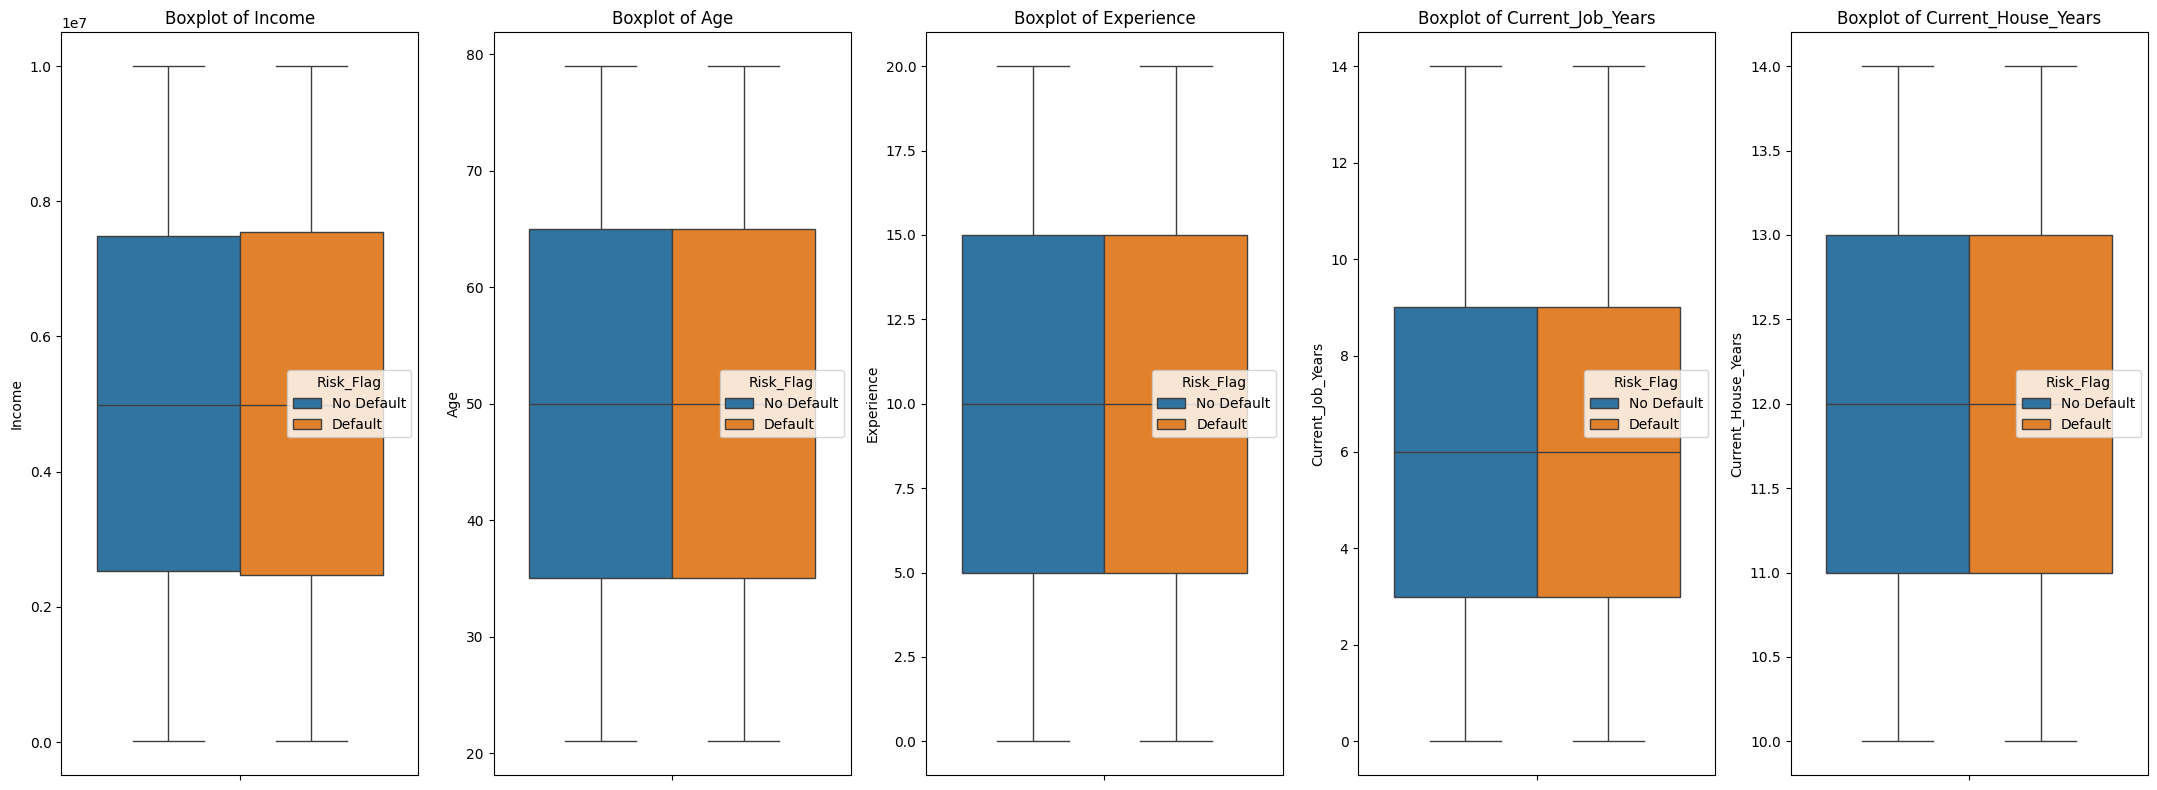

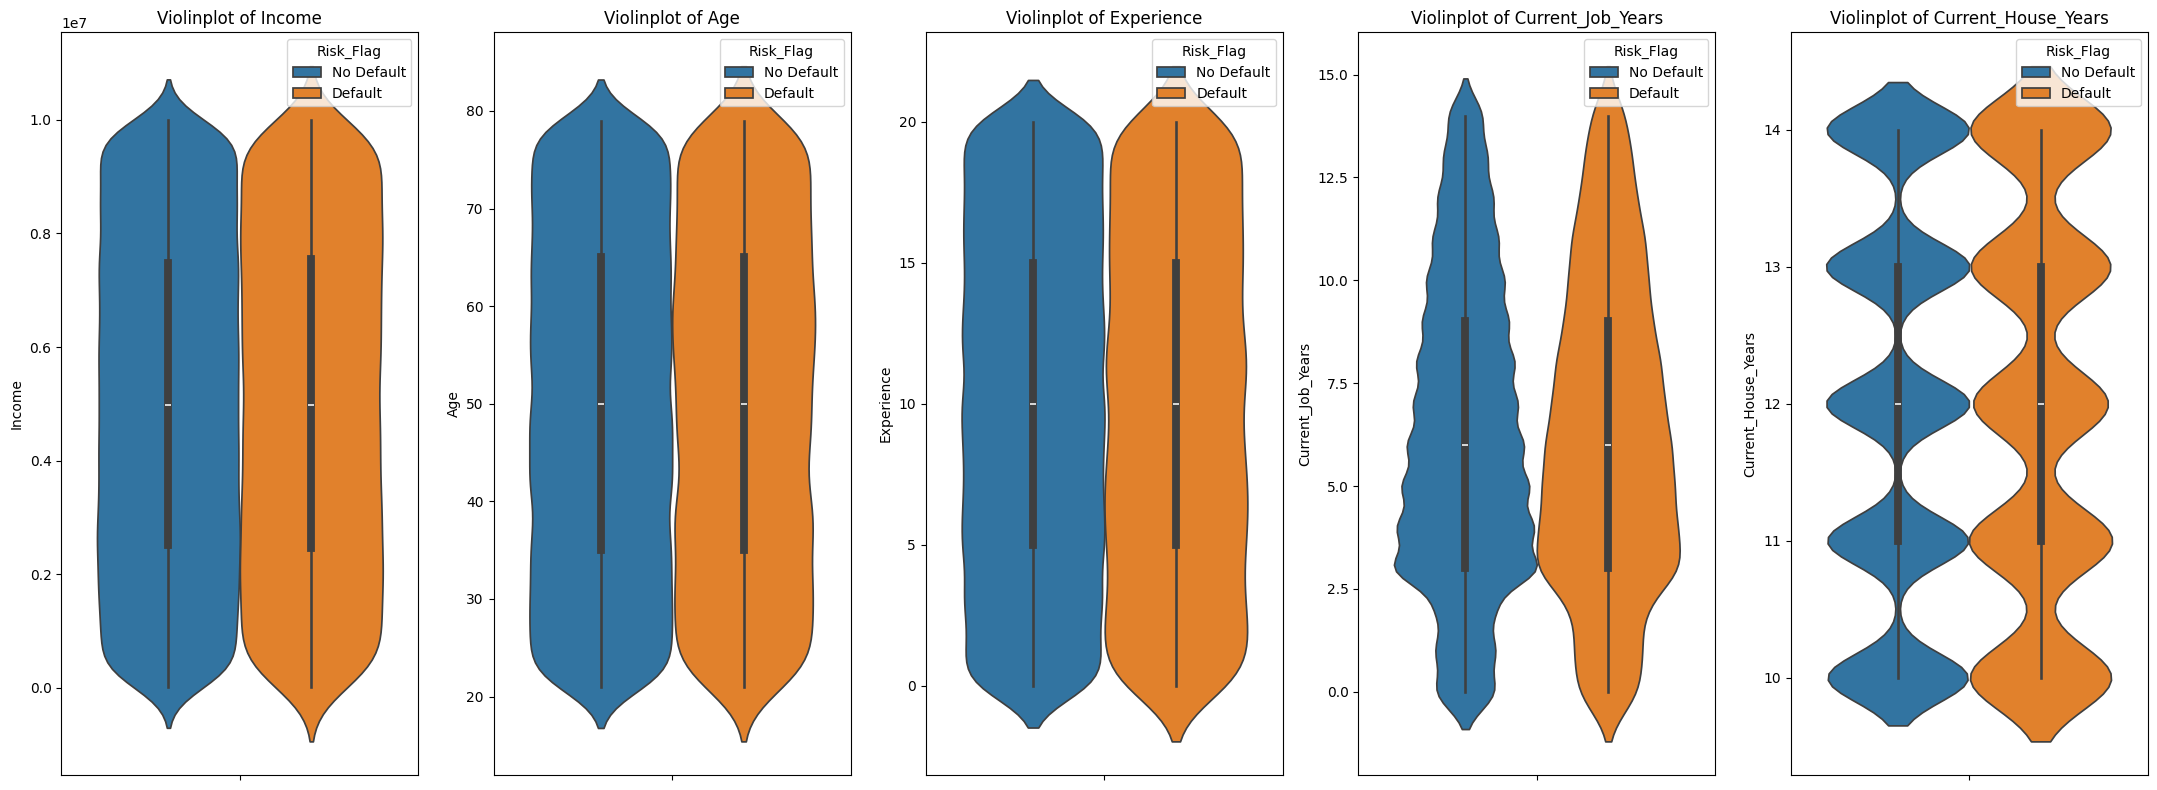

In [45]:
# Boxplot function implementation
plot_dynamic_boxplots_violinplots(df, col_series=nums_cols, plot_type='boxplot', ncols=6, figsize=(26, 8), orientation='v', hue='Risk_Flag')
plot_dynamic_boxplots_violinplots(df, col_series=nums_cols, plot_type='violinplot', ncols=6, figsize=(26, 8), orientation='v', hue='Risk_Flag')

### Default by Marital_Status, House Ownership, and Car Ownership

#### Plotting by the amount

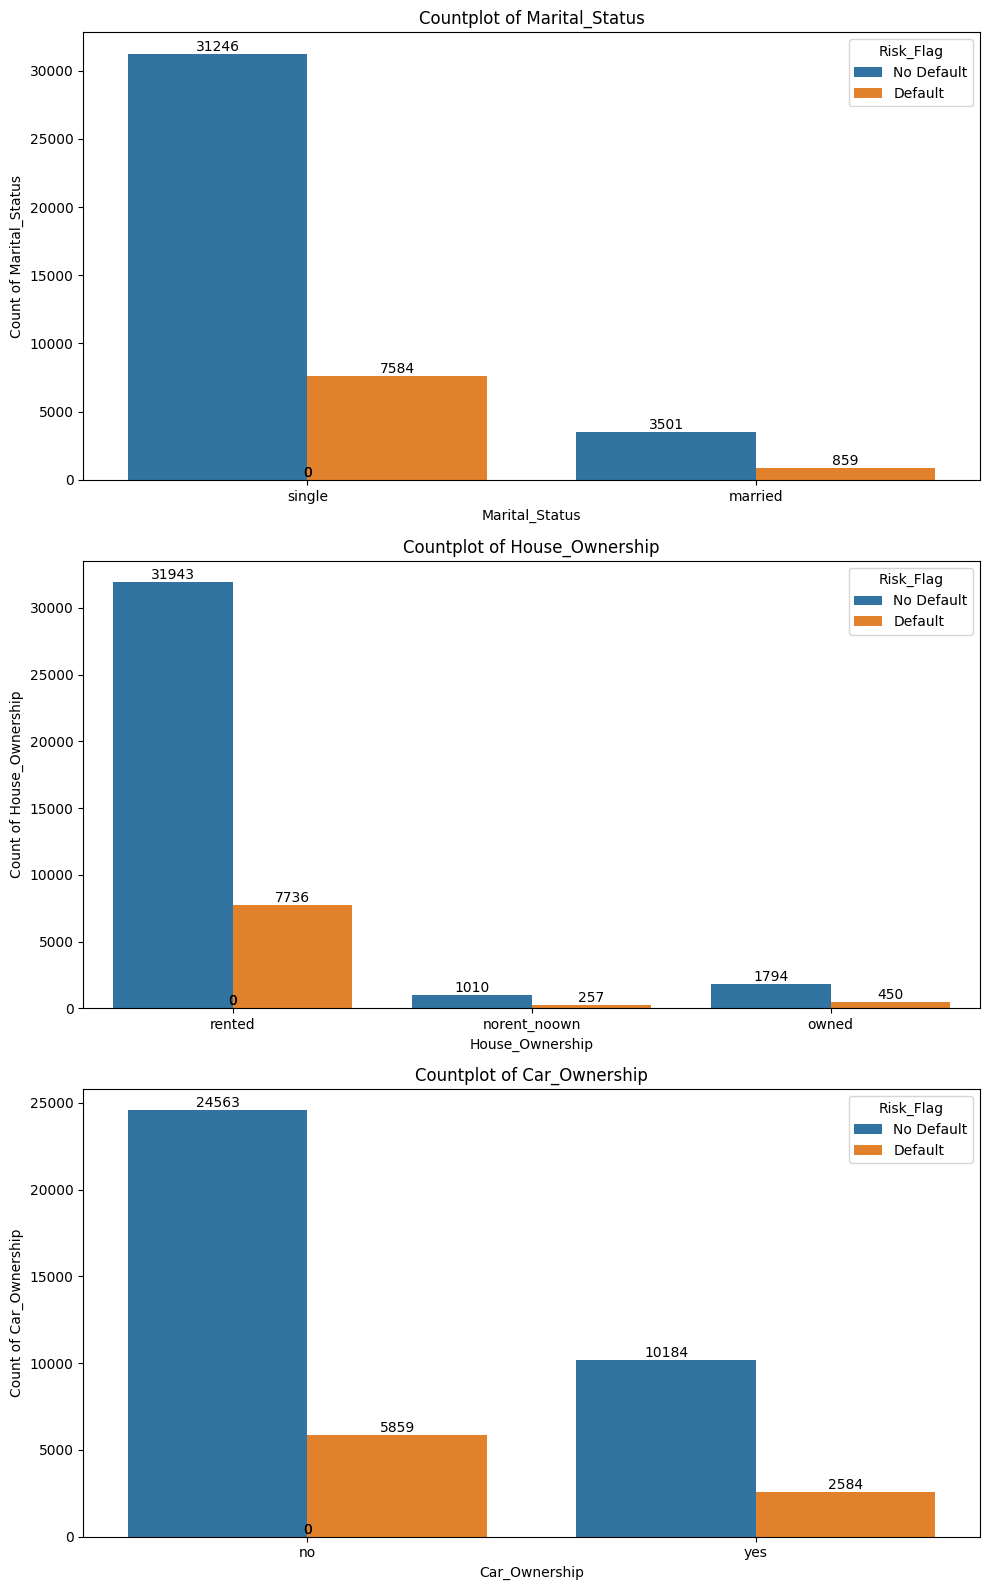

In [46]:
# Countplot Categorical (Few unique values)
plot_dynamic_countplot(
    df=df, 
    col_series=cats_few, 
    ncols=1, 
    figsize=(10, 16),
    hue="Risk_Flag"
)

#### Plotting by Ratio

In [47]:
# Proportion of all caterorical status by risk_flag
def plot_risk_distribution_pies(df, categorical_col, figsize=(12, 6), colors=['lightblue', 'orange'], 
                              label_size=12, title_size=14):
    """
    Creates pie charts showing the risk distribution for each category in a categorical column.
    
    Parameters:
    -----------
    df : pandas DataFrame
        The input dataframe containing the data
    categorical_col : str
        Name of the categorical column to analyze
    figsize : tuple, optional (default=(12, 6))
        Size of the figure
    colors : list, optional (default=['lightblue', 'red'])
        Colors to use for the pie charts
    label_size : int, optional (default=12)
        Font size for labels and percentages
    title_size : int, optional (default=14)
        Font size for titles
    """
    
    # Calculate proportions
    proportions = df.groupby([categorical_col, 'Risk_Flag']).size().unstack(fill_value=0)
    proportions = proportions.apply(lambda x: x / x.sum(), axis=1)
    
    # Adjust figure size based on number of categories
    n_categories = len(proportions)
    if n_categories > 2:
        figsize = (15, 6)  # Make figure wider for more categories
    
    # Create subplots
    fig, ax = plt.subplots(1, n_categories, figsize=figsize)
    
    # Handle case where there's only one category (converts ax to array)
    if n_categories == 1:
        ax = [ax]
    
    # Create pie chart for each category
    for i, (category, row) in enumerate(proportions.iterrows()):
        ax[i].pie(row, 
                 labels=['No Default', 'Default'],
                 autopct='%1.2f%%',
                 colors=colors,
                 startangle=90,
                 textprops={'fontsize': label_size})
        ax[i].set_title(category, fontsize=title_size)
    
    plt.tight_layout()
    plt.show()

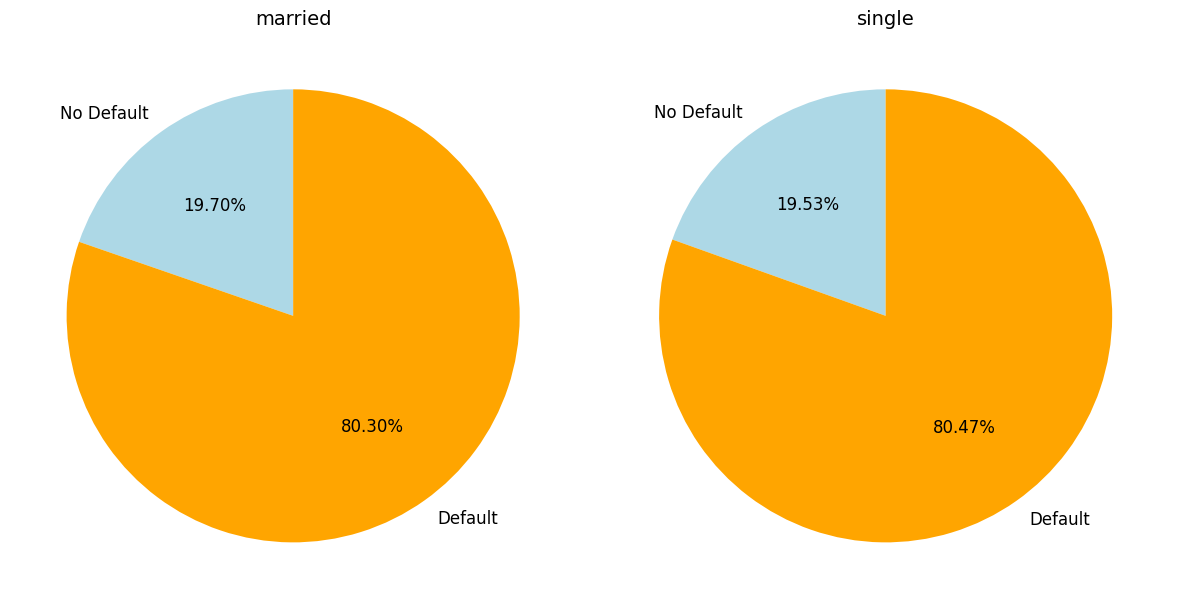

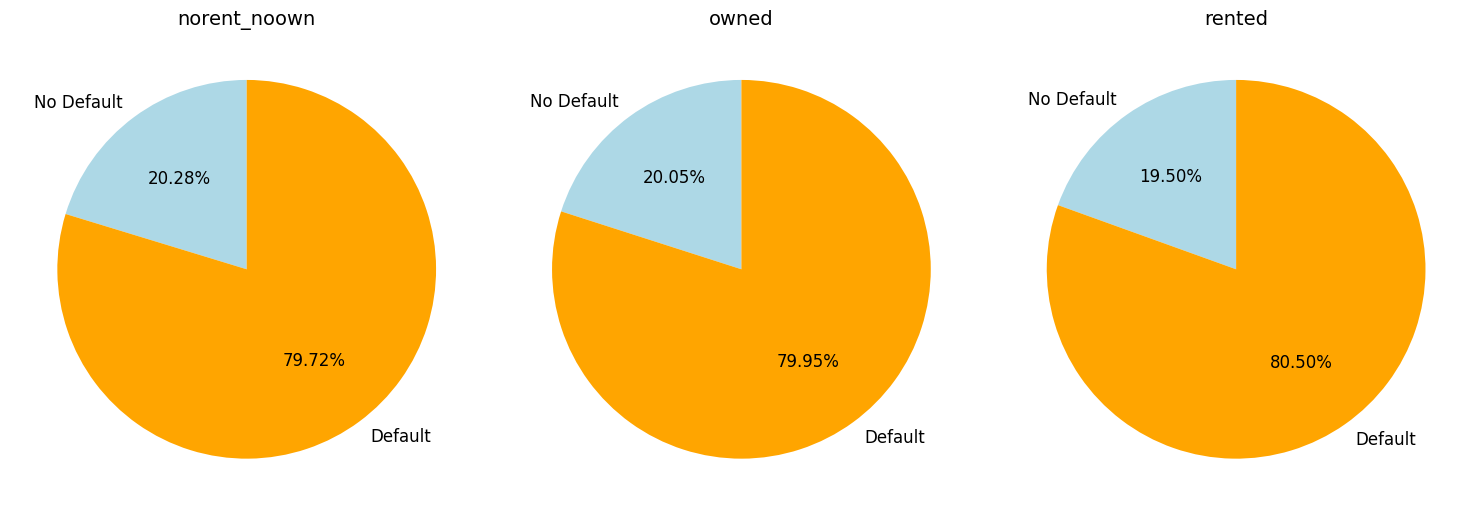

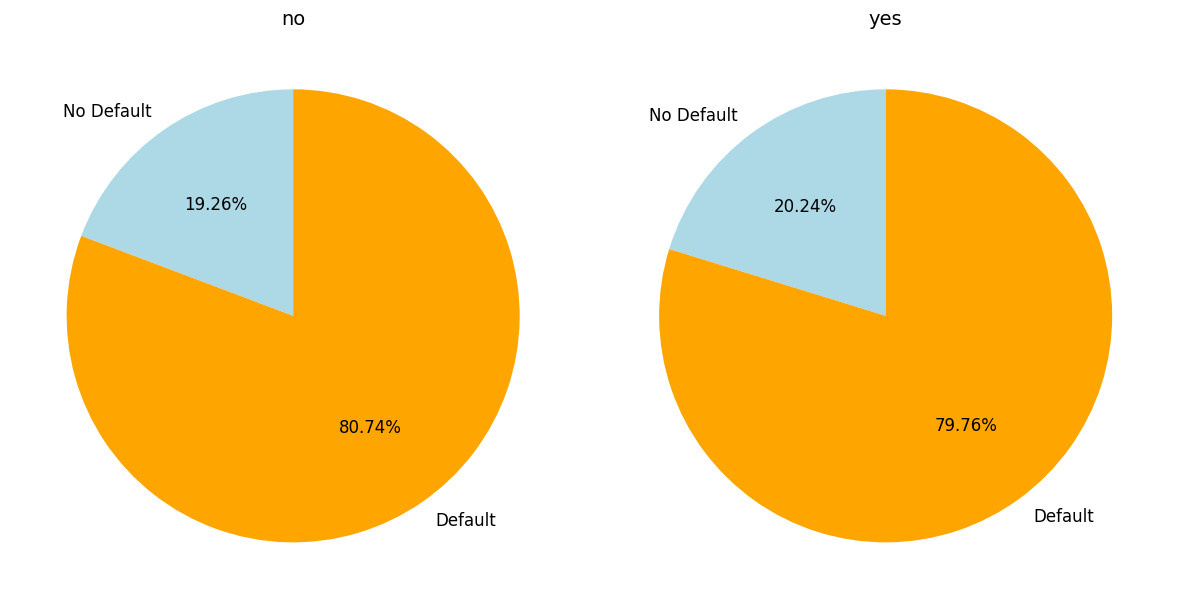

In [48]:
# Test with every category
plot_risk_distribution_pies(df, 'Marital_Status')
plot_risk_distribution_pies(df, 'House_Ownership')
plot_risk_distribution_pies(df, 'Car_Ownership')

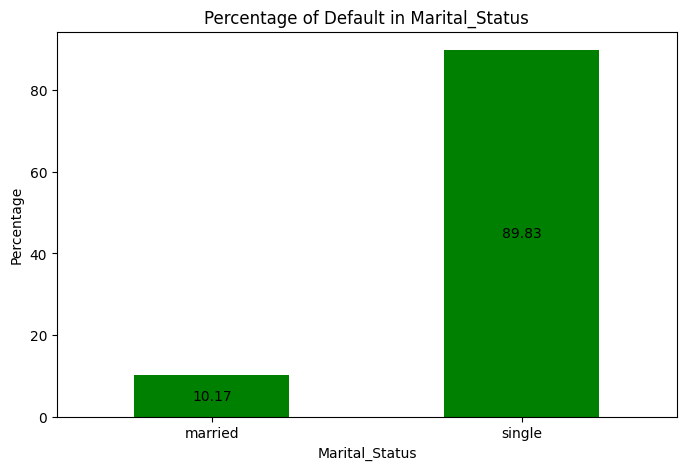

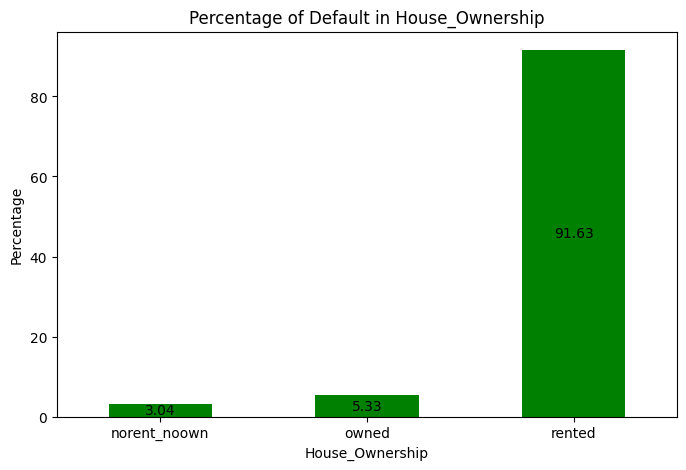

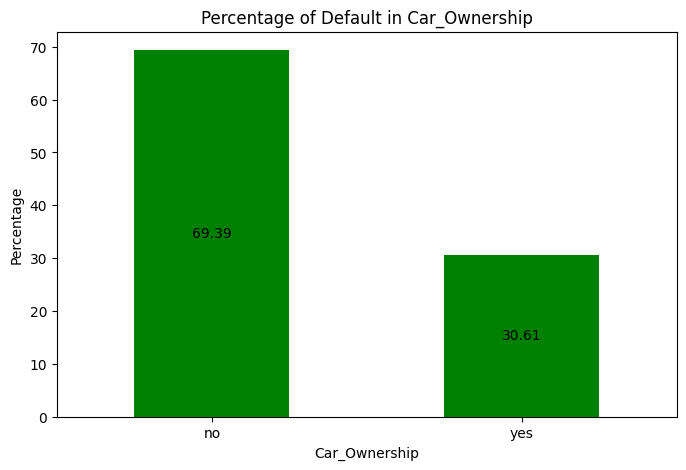

In [49]:
# Additional : Calculate and plot the distribution of defaults across categories
# Shows what percentage of all defaults come from each category within a feature
for cat in cats_few:
    fig, ax = plt.subplots(figsize=(8, 5))
    df_cats_group = df[df['Risk_Flag'] == "Default"].groupby(cat).size() / df[df['Risk_Flag'] == "Default"].shape[0] * 100

    ax = df_cats_group.plot(kind='bar', color='green')
    ax.bar_label(ax.containers[0], fmt='%.2f', label_type='center') #experimenting with putting the label inside the bar
    ax.set_title(f'Percentage of Default in {cat}')
    ax.set_ylabel(f'Percentage')
    ax.tick_params(axis='x', rotation=0)

#### **Business Insight:**

From the information on categorical features, customers applying for loans are predominantly from the single category, only have rented homes, and do not own a car. When compared for each category:

1. **Based on Marital Status (Married/Single):**
   - Customers who are single are slightly more inclined to have the potential for default compared to married customers. This insight suggests that marital status may play a role in assessing the risk of loan default.

2. **Based on Home Ownership Status (Rented/Own/No House):**
   - Customers who have rented homes (rented) tend to have a higher potential for default compared to customers with private homes or no home ownership. This may indicates that the status of home ownership is a significant factor in assessing the risk of loan default.

3. **Based on Car Ownership Status (Yes/No):**
   - Customers who do not own a car are slightly more inclined to have the potential for default compared to those who own a car. This suggests that car ownership status may influence a customer's ability to repay the loan.

It is important to emphasize that these findings may be biased due to the imbalance in the available data across categories. Further analysis and a deeper understanding of these factors are required to make more accurate decisions in credit risk assessment.

#### Brief Business Recommendation

1. **Marital Status:**
   - **Targeted Risk Mitigation for Single Applicants:**
     - Implement a more rigorous risk assessment process for loan applications from single individuals, taking into account additional financial indicators and conducting thorough background checks. This can help in identifying potential default risks early on and adjusting loan terms accordingly.

   - **Customized Loan Products:**
     - Develop loan products tailored to the needs and financial situations of single individuals. This could include personalized interest rates, repayment schedules, or other terms that better align with the financial capabilities of single applicants, potentially reducing the default risk.

2. **Home Ownership Status:**
   - **Adjusted Loan Terms for Renters:**
     - For customers with rented homes, consider offering loan products with terms that accommodate their financial situation, such as flexible repayment schedules or lower interest rates. This can help mitigate the higher default potential associated with rented home ownership.

   - **Financial Education Programs:**
     - Implement financial education programs specifically targeting customers who rent homes. These programs can empower renters with better financial management skills, reducing the likelihood of default and improving their overall financial stability.

3. **Car Ownership Status:**
   - **Risk-Adjusted Interest Rates:**
     - Introduce risk-adjusted interest rates based on car ownership status. Customers without a car may face higher interest rates due to the perceived higher default risk. Offering competitive rates to car owners may incentivize them to choose your loan products.

   - **Collaboration with Dealerships:**
     - Explore partnerships with car dealerships to provide exclusive loan offers or discounts to customers purchasing cars. This collaboration can attract customers with car ownership aspirations and potentially lower the default risk associated with non-car owners.

### Default by Profession

In [50]:
# Create function for plotting top and bottom N value from a categorical feature
def plot_categorical_top_bottom_value(df, category_col, target='Risk_Flag', pos_class='Default', neg_class='No Default', 
                                      method='count', n_groups=5, figsize=(24, 12)):
    """
    Plot the distribution of binary target variable for a categorical feature using either count or rate method.
    
    Parameters:
    -----------
    df : pandas DataFrame
        The input dataframe containing the data
    category_col : str
        Name of the categorical column to analyze
    target : str, optional (default='Risk_Flag')
        Name of the target column containing binary classes
    pos_class : str, optional (default='Default')
        Name of the positive class in target column
    neg_class : str, optional (default='No Default')
        Name of the negative class in target column
    method : str, optional (default='count')
        Method to sort the categories:
        - 'count': Sort by absolute number of positive class
        - 'rate': Sort by positive class rate (positive / total)
    n_groups : int, optional (default=5)
        Number of top/bottom groups to display
    figsize : tuple, optional (default=(24, 12))
        Size of the figure
        
    Returns:
    --------
    None
        Displays a figure with two subplots showing the top and bottom groups
    """
    
    # Create the grouped data
    grouped_data = df.groupby([category_col, target]).size().unstack(fill_value=0)
    
    if method == 'count':
        # Sort by absolute number of positive class
        top_groups = grouped_data[pos_class].sort_values(ascending=False).head(n_groups).index
        bottom_groups = grouped_data[pos_class].sort_values().head(n_groups).index
        
        # Reindex to show only those top and bottom groups
        top_data = grouped_data.reindex(top_groups)
        bottom_data = grouped_data.reindex(bottom_groups)
        
        title_prefix = f'Number of {pos_class}'
        
    elif method == 'rate':
        # Calculate and sort by positive class rate
        grouped_data['Positive_Rate'] = grouped_data[pos_class] / (grouped_data[pos_class] + grouped_data[neg_class])
        top_groups = grouped_data['Positive_Rate'].sort_values(ascending=False).head(n_groups).index
        bottom_groups = grouped_data['Positive_Rate'].sort_values().head(n_groups).index
        
        # Reindex to show only those top and bottom groups
        top_data = grouped_data.drop('Positive_Rate', axis=1).reindex(top_groups)
        bottom_data = grouped_data.drop('Positive_Rate', axis=1).reindex(bottom_groups)
        
        title_prefix = f'{pos_class} Rate'
    
    else:
        raise ValueError("Method must be either 'count' or 'rate'")
    
    # Create the plot
    fig, ax = plt.subplots(2, 1, figsize=figsize)
    
    # Plot top groups
    top_data.plot(kind='bar', stacked=True, ax=ax[0])
    ax[0].set_title(f'Top {n_groups} {category_col}s by {title_prefix}')
    ax[0].set_ylabel('Count')
    ax[0].legend(title=target)
    
    # Plot bottom groups
    bottom_data.plot(kind='bar', stacked=True, ax=ax[1])
    ax[1].set_title(f'Bottom {n_groups} {category_col}s by {title_prefix}')
    ax[1].set_ylabel('Count')
    ax[1].legend(title=target)
    
    # Add value labels
    for subplot in ax:
        for container in subplot.containers:
            subplot.bar_label(container, label_type='center')
    
    # Rotate x-axis labels
    plt.setp(ax[0].get_xticklabels(), rotation=45, ha='right')
    plt.setp(ax[1].get_xticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

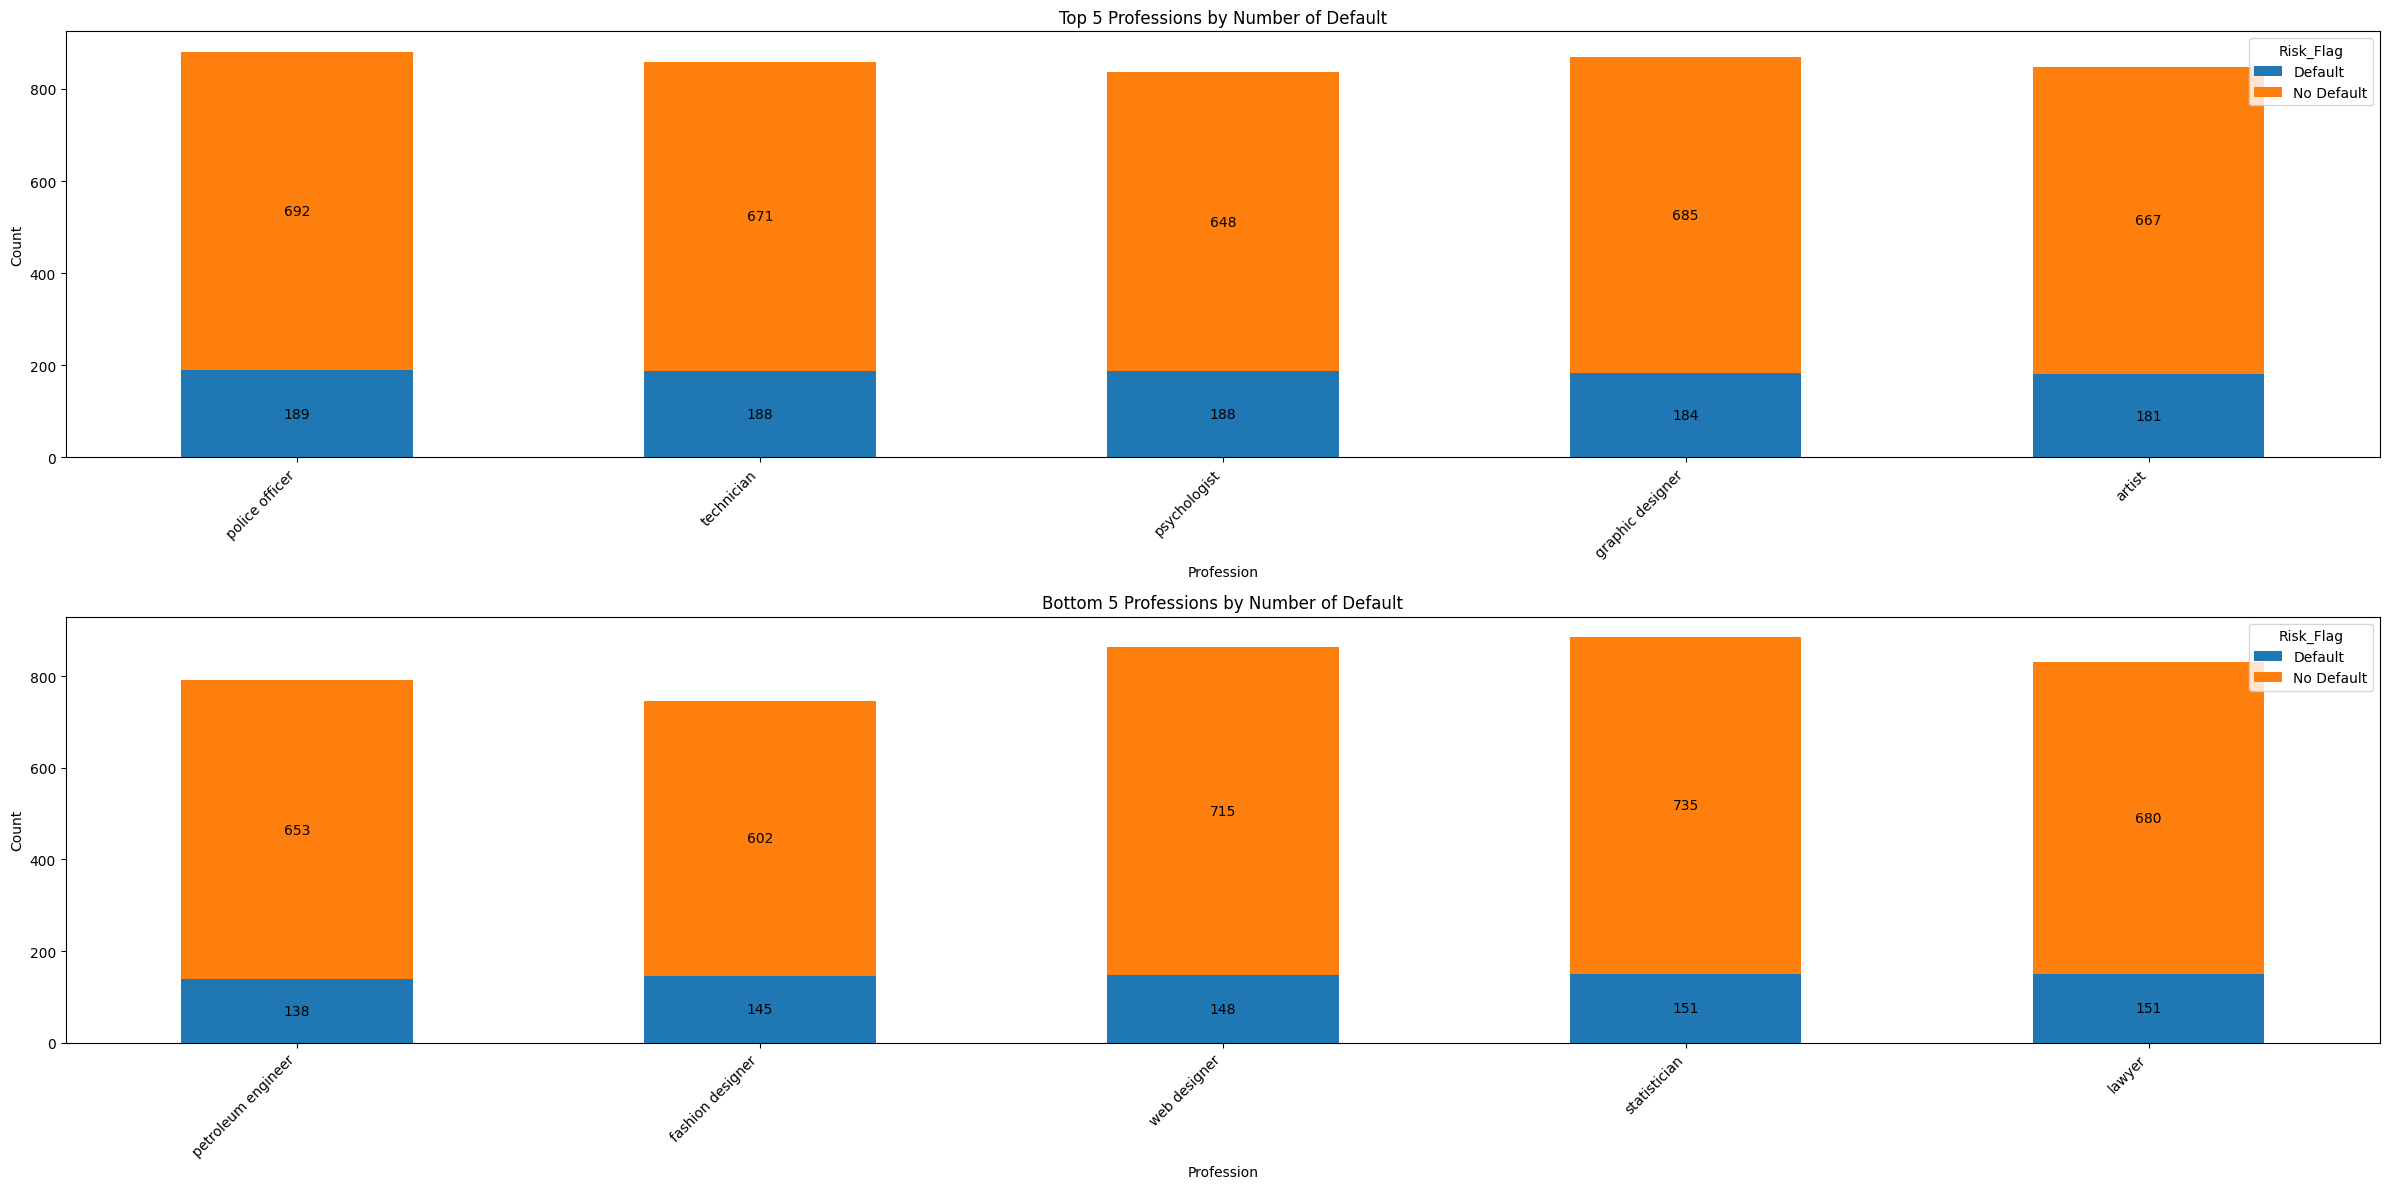

In [51]:
# Function implementation for profession
plot_categorical_top_bottom_value(df, 'Profession', target='Risk_Flag', pos_class='Default', neg_class='No Default')

# # Example usage reusable for other project
# plot_categorical_defaults(
#     df, 
#     'CustomerSegment', 
#     target='Churned',
#     pos_class='Yes',
#     neg_class='No',
#     method='rate'
# )

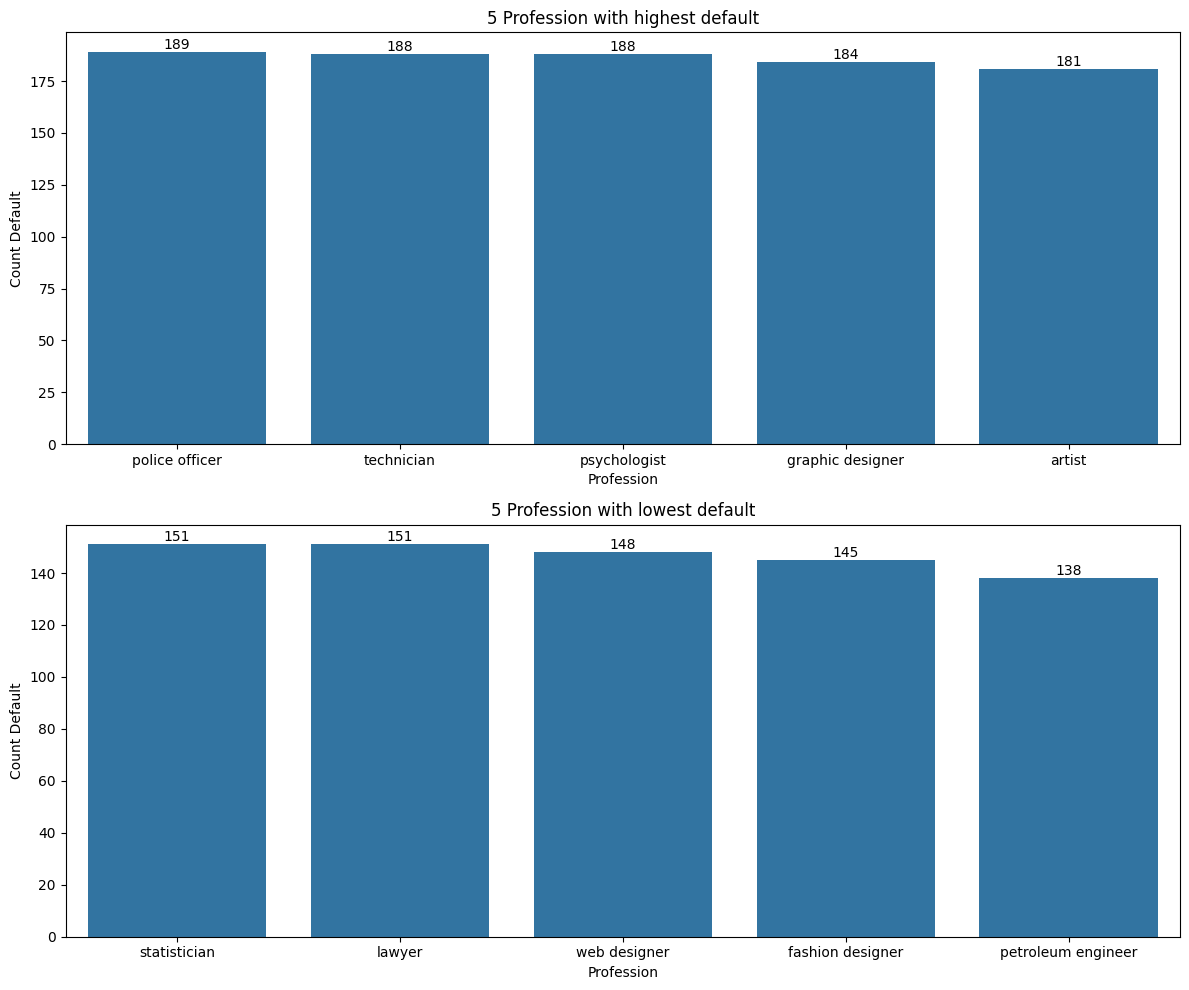

In [52]:
## Original Implementation : using the aggregate function to sum numerical Risk_Flag
change_target_dtype(df, target_type='numerical')

# Top and Bottom 5 default by profession
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Plot top 5
default_profession_top_5 = df.groupby('Profession').agg({'Risk_Flag':'sum'}).sort_values(by='Risk_Flag', ascending=False).reset_index().head(5)
sns.barplot(data=default_profession_top_5, x='Profession', y='Risk_Flag', ax=ax[0])
ax[0].set_title('5 Profession with highest default')
ax[0].set_ylabel('Count Default')
ax[0].bar_label(ax[0].containers[0])

# Plot bottom 5
default_profession_bottom_5 = df.groupby('Profession').agg({'Risk_Flag':'sum'}).sort_values(by='Risk_Flag', ascending=False).reset_index().tail(5)
sns.barplot(data=default_profession_bottom_5, x='Profession', y='Risk_Flag', ax=ax[1])
ax[1].set_title('5 Profession with lowest default')
ax[1].set_ylabel('Count Default')
ax[1].bar_label(ax[1].containers[0])

plt.tight_layout()
plt.show()

#### Business Insight :

> Police Officer, Technician, Psychologist, Graphic Designer, and Artist are professions with the highest default rates, while Statistician, Lawyer, Web Designer, Fashiopn Designer, and Petroleum Engineer are professions with the lowest default rates.

#### Business Recommendation :

> - Develop specialized risk assessment services tailored for individuals in high-default professions. Utilize advanced data analytics, including behavioral and financial indicators, to provide a more accurate prediction of creditworthiness for applicants in these professions.

> - Collaborate with industry associations and employers to gather additional insights into the financial stability and responsibility of individuals in high-risk professions. This collaboration can enhance the accuracy of risk assessments and lead to more informed lending decisions.

> - Launch targeted financial education programs specifically designed for individuals in professions with high default rates. These programs can help borrowers manage their finances more effectively, reducing the likelihood of defaults.

### Default by State

In [53]:
change_target_dtype(df, target_type='categorical')

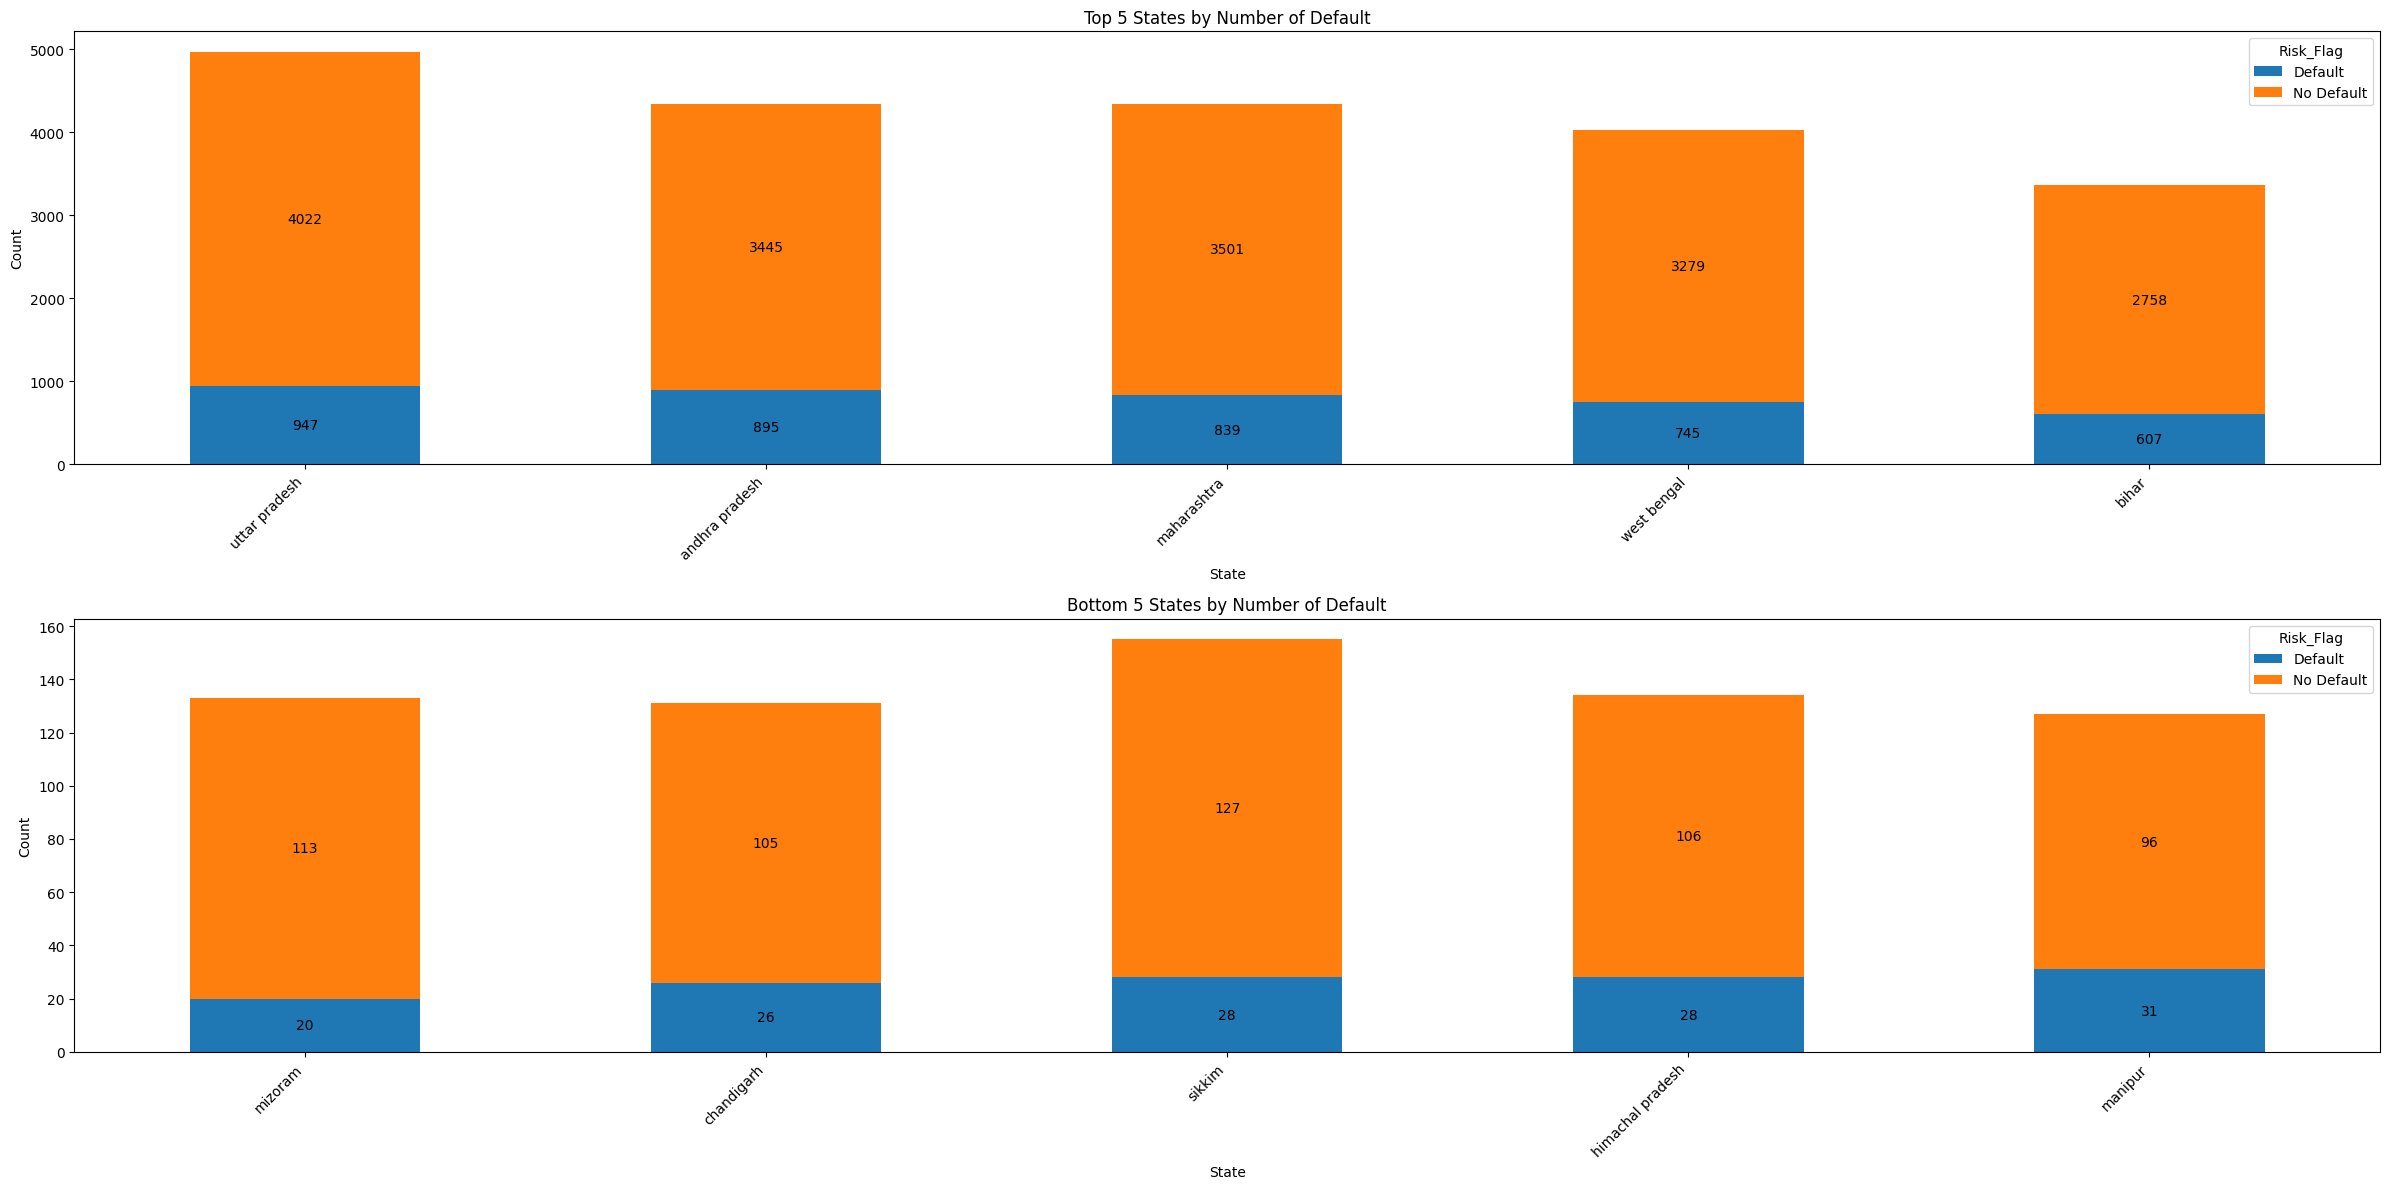

In [54]:
# Function implementation for state
plot_categorical_top_bottom_value(df, 'State', target='Risk_Flag', pos_class='Default', neg_class='No Default')

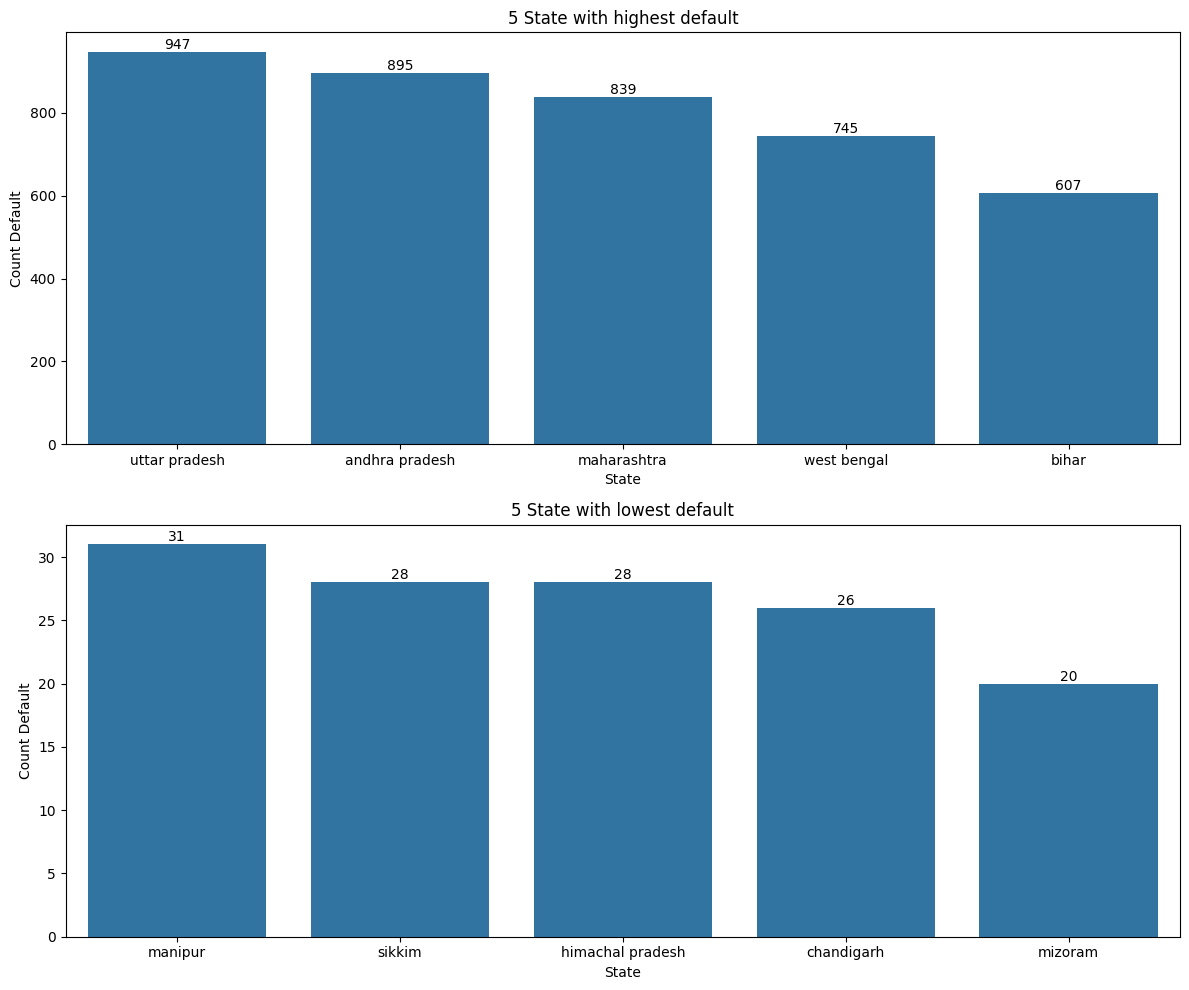

In [55]:
## Original Implementation : using the aggregate function to sum numerical Risk_Flag
change_target_dtype(df, target_type='numerical')

# Top and Bottom 5 by state
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Plot top 5
default_state_top_5 = df.groupby('State').agg({'Risk_Flag':'sum'}).sort_values(by='Risk_Flag', ascending=False).reset_index().head(5)
sns.barplot(data=default_state_top_5, x='State', y='Risk_Flag', ax=ax[0])
ax[0].set_title('5 State with highest default')
ax[0].set_ylabel('Count Default')
ax[0].bar_label(ax[0].containers[0])

# Plot bottom 5
default_state_bottom_5 = df.groupby('State').agg({'Risk_Flag':'sum'}).sort_values(by='Risk_Flag', ascending=False).reset_index().tail(5)
sns.barplot(data=default_state_bottom_5, x='State', y='Risk_Flag', ax=ax[1])
ax[1].set_title('5 State with lowest default')
ax[1].set_ylabel('Count Default')
ax[1].bar_label(ax[1].containers[0])

plt.tight_layout()
plt.show()

#### Business Insight :

> Uttar Pradesh, Andhra Pradesh, Maharashtra, West Bengal, and Bihar are the top 5 states with the highest number of customers with defaults, while Manipur, Sikkim, Himachal Pradesh, Chandigarh, and Mizoram are states with the lowest number of customer defaults. This case is a little bit different from profession case, here we can see that the difference in the amount between the top and bottom are quite high.

#### Business Recommendation :

> - Tailor marketing strategies based on the default rates in different states. Allocate marketing budgets and efforts more heavily towards states with lower default rates (e.g., Mizoram, Chandigarh), while implementing targeted campaigns or risk mitigation measures in states with higher default rates (e.g., Uttar Pradesh, Andhra Pradesh).

> -  Develop or refine credit risk models specific to each state. Incorporate state-specific economic indicators, socio-economic factors, and regional trends to create more accurate risk assessments for customers in each location.

> - Introduce loan products or terms that are customized to the economic conditions and financial behaviors prevalent in each state. This can help align the business's offerings with the specific needs and capacities of customers in different regions.

### Default by City

In [56]:
change_target_dtype(df, target_type='categorical')

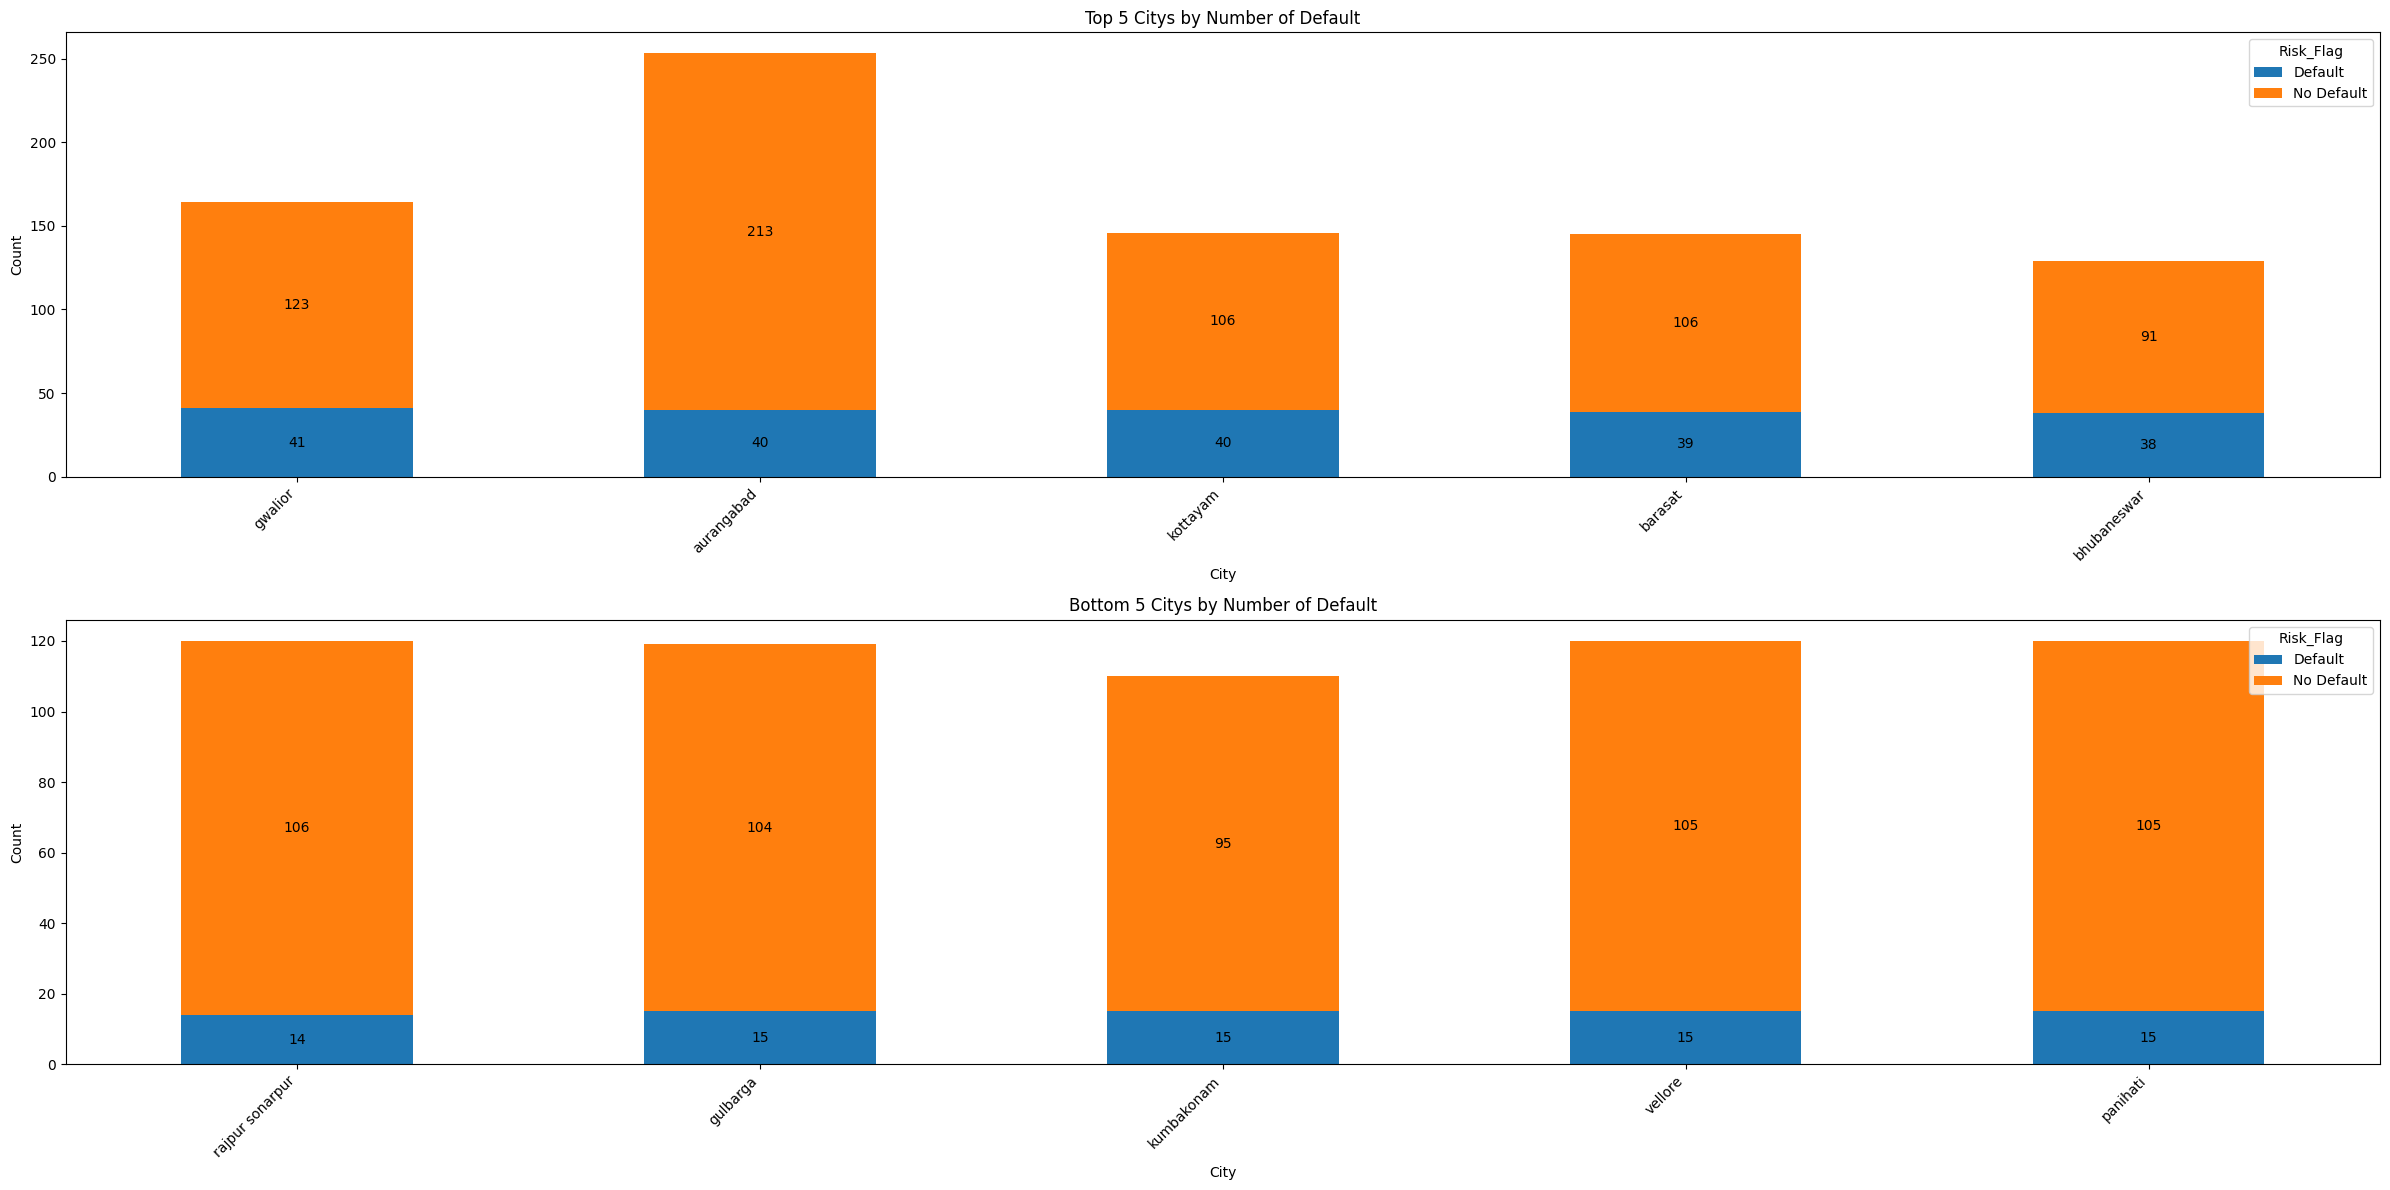

In [57]:
# Function implementation for state
plot_categorical_top_bottom_value(df, 'City', target='Risk_Flag', pos_class='Default', neg_class='No Default')

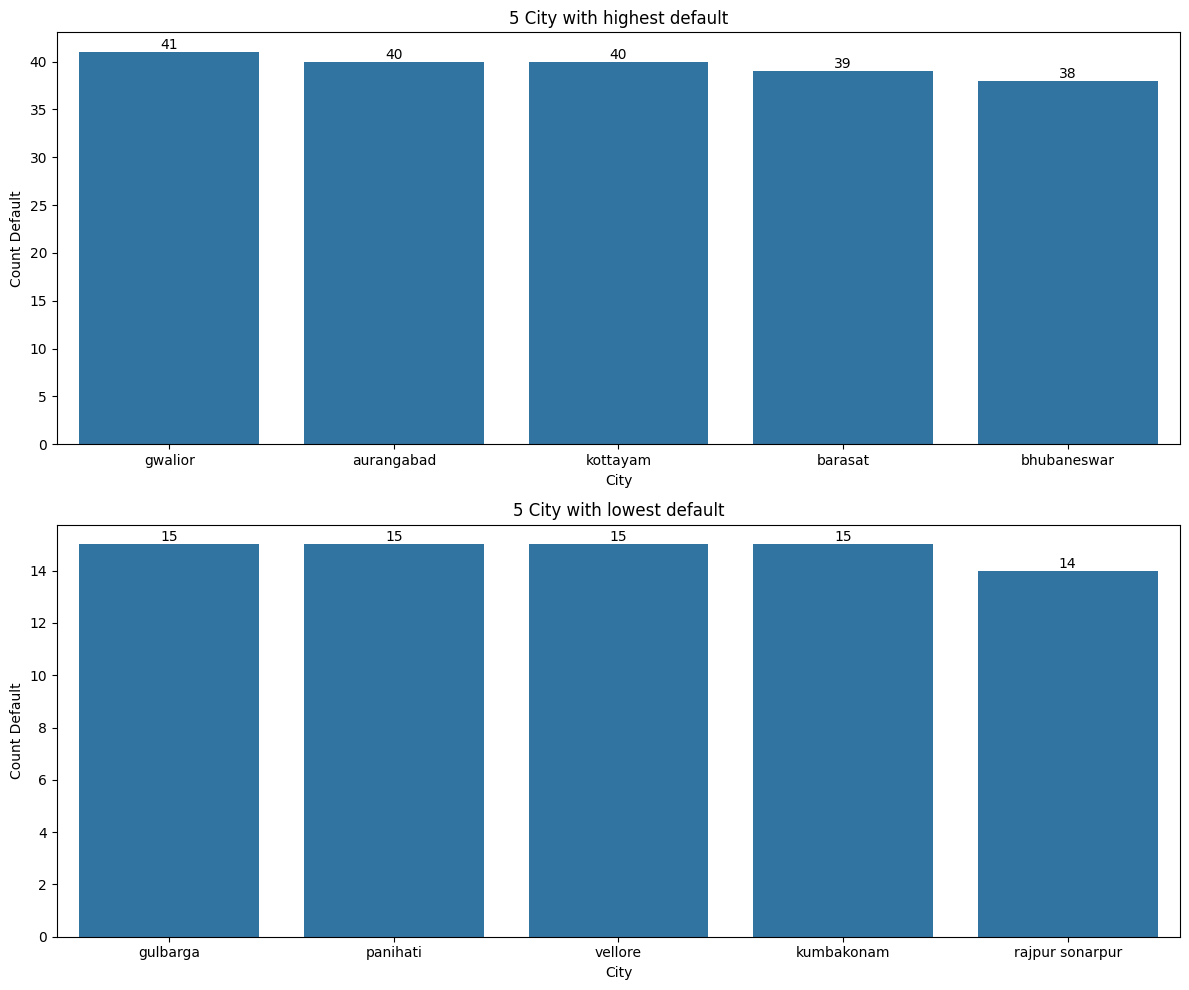

In [58]:
## Original Implementation : using the aggregate function to sum numerical Risk_Flag
change_target_dtype(df, target_type='numerical')

# Top and Bottom 5 by city
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Plot top 5
default_state_top_5 = df.groupby('City').agg({'Risk_Flag':'sum'}).sort_values(by='Risk_Flag', ascending=False).reset_index().head(5)
sns.barplot(data=default_state_top_5, x='City', y='Risk_Flag', ax=ax[0])
ax[0].set_title('5 City with highest default')
ax[0].set_ylabel('Count Default')
ax[0].bar_label(ax[0].containers[0])

# Plot bottom 5
default_state_bottom_5 = df.groupby('City').agg({'Risk_Flag':'sum'}).sort_values(by='Risk_Flag', ascending=False).reset_index().tail(5)
sns.barplot(data=default_state_bottom_5, x='City', y='Risk_Flag', ax=ax[1])
ax[1].set_title('5 City with lowest default')
ax[1].set_ylabel('Count Default')
ax[1].bar_label(ax[1].containers[0])

plt.tight_layout()
plt.show()

#### Business Insight :

> Gwalior, Aurangabad, Kottayam, Barasat, and Bhubaneswar are the top 5 cities with the highest number of customers with defaults, while Gulbarga, Panihati, Vellore, Kumbakonam, and Rajpur Sonapur are cities with the lowest number of customer defaults.

#### Business Recommendation :

> - Establish credit counseling centers in cities with high default rates to provide personalized financial advice and assistance to individuals facing repayment challenges.

> - Collaborate with local businesses and community organizations to promote these counseling services, creating a network that supports financial well-being at the grassroots level.

> - Implement advanced fraud prevention technologies, such as machine learning algorithms and biometric authentication, in cities with high default rates to enhance the security of financial transactions.

# **STAGE 2 : DATA PRE-PROCESSING**

The following important findings were discovered in the previous section:

1. The dataset does not contain missing values, duplicated values, or outliers.

2. For cleaning purposes, further checks may be needed, especially on categorical features with a considerable number of unique values, such as Profession, City, and State. If missing or duplicated values emerge after cleaning, they will be addressed through either dropping or filling with the modes.

3. Scaling is necessary for numerical features with large scales, such as Income and/or age (also with other engineered features later).

## Initial Cleaning and Encoding

In [59]:
change_target_dtype(df, target_type='categorical')

In [60]:
# Make a copy of original dataframe for preprocessing and encoding process
df_encoding = df.copy()
df_encoding.head()

Income  Age  Experience Marital_Status House_Ownership Car_Ownership  \
0  1303834   23           3         single          rented            no   
1  7574516   40          10         single          rented            no   
2  3991815   66           4        married          rented            no   
3  6256451   41           2         single          rented           yes   
4  5768871   47          11         single          rented            no   

            Profession             City           State  Current_Job_Years  \
0  mechanical engineer             rewa  madhya pradesh                  3   
1   software developer         parbhani     maharashtra                  9   
2     technical writer        alappuzha          kerala                  4   
3   software developer      bhubaneswar          odisha                  2   
4        civil servant  tiruchirappalli      tamil nadu                  3   

   Current_House_Years   Risk_Flag  
0                   13  No Default  
1                   13  No Default  
2                   10  No Default  
3                   12     Default  
4                   14     Default

## Cleaning and Encoding for Profession

In [61]:
# Checking every unique values in Profession
df_encoding['Profession'].unique()

array(['mechanical engineer', 'software developer', 'technical writer',
       'civil servant', 'librarian', 'economist', 'flight attendant',
       'architect', 'designer', 'physician', 'financial analyst',
       'air traffic controller', 'politician', 'police officer', 'artist',
       'surveyor', 'design engineer', 'chemical engineer',
       'hotel manager', 'dentist', 'comedian', 'biomedical engineer',
       'graphic designer', 'computer hardware engineer',
       'petroleum engineer', 'secretary', 'computer operator',
       'chartered accountant', 'technician', 'microbiologist',
       'fashion designer', 'aviator', 'psychologist', 'magistrate',
       'lawyer', 'firefighter', 'engineer', 'official', 'analyst',
       'geologist', 'drafter', 'statistician', 'web designer',
       'consultant', 'chef', 'army officer', 'surgeon', 'scientist',
       'civil engineer', 'industrial engineer', 'technology specialist'],
      dtype=object)

- There is nothing unusual about each value in the 'profession' feature. Besides performing frequency (count) analysis for the original values, we will also consider adding a feature engineering step by creating new groupings based on the profession types (e.g., Engineer, Government and Public Service, etc.).

- Encoding will be applied during the grouping process as it requires information about the names of each profession to create the groups.

## Cleaning and Encoding for State

In [62]:
# Checking every unique values in State
df_encoding['State'].unique()

array(['madhya pradesh', 'maharashtra', 'kerala', 'odisha', 'tamil nadu',
       'gujarat', 'rajasthan', 'telangana', 'bihar', 'andhra pradesh',
       'west bengal', 'haryana', 'puducherry', 'karnataka',
       'uttar pradesh', 'himachal pradesh', 'punjab', 'tripura',
       'uttarakhand', 'jharkhand', 'mizoram', 'assam',
       'jammu and kashmir', 'delhi', 'chhattisgarh', 'chandigarh',
       'manipur', 'sikkim'], dtype=object)

- There is nothing unusual about each value in the State feature. The approach will be similar to the Profession, where, in addition to performing frequency (count) encoding, grouping based on the regional zones in India (west, south, east, and west) will be conducted. This process may require some additional research and extra effort during verification.

In [63]:
# Frequency/Count Encoding for State
import category_encoders as ce
count_encoder = ce.CountEncoder()

df_encoding['State_Count'] = count_encoder.fit_transform(df_encoding['State'])
df_encoding.sample(5)

Income  Age  Experience Marital_Status House_Ownership Car_Ownership  \
7013   2748810   71           2         single          rented            no   
2743   3959539   38           0         single    norent_noown            no   
14185  5384565   35           6         single          rented            no   
3768   1886371   68          15         single          rented           yes   
3652   8344782   77          16         single          rented            no   

              Profession            City           State  Current_Job_Years  \
7013       hotel manager        suryapet       telangana                  2   
2743      microbiologist  tadepalligudem  andhra pradesh                  0   
14185       statistician       firozabad   uttar pradesh                  6   
3768   financial analyst      ahmednagar     maharashtra                  7   
3652           scientist          rohtak         haryana                 12   

       Current_House_Years   Risk_Flag  State_Count  
7013                    10  No Default         1383  
2743                    14  No Default         4340  
14185                   12  No Default         4969  
3768                    10  No Default         4340  
3652                    10  No Default         1458

In [64]:
# Check effect of Frequency/Count Encoding to original feature
original_features = df['State'].unique()
encoded_features = df_encoding['State_Count'].unique()
for feature, encoded_feature in zip(original_features, encoded_features):
    print(f"'{feature}' : {encoded_feature}")

'madhya pradesh' : 2458
'maharashtra' : 4340
'kerala' : 992
'odisha' : 838
'tamil nadu' : 2806
'gujarat' : 1872
'rajasthan' : 1670
'telangana' : 1383
'bihar' : 3365
'andhra pradesh' : 4024
'west bengal' : 1458
'haryana' : 262
'puducherry' : 2013
'karnataka' : 4969
'uttar pradesh' : 134
'himachal pradesh' : 773
'punjab' : 150
'tripura' : 290
'uttarakhand' : 1501
'jharkhand' : 133
'mizoram' : 1095
'assam' : 291
'jammu and kashmir' : 940
'delhi' : 680
'chhattisgarh' : 131
'chandigarh' : 127
'manipur' : 155


## Cleaning and Encoding for City

In [65]:
# Checking every unique values in City
df_encoding['City'].unique()

array(['rewa', 'parbhani', 'alappuzha', 'bhubaneswar', 'tiruchirappalli',
       'jalgaon', 'tiruppur', 'jamnagar', 'kota', 'karimnagar', 'hajipur',
       'adoni', 'erode', 'kollam', 'madurai', 'anantapuram', 'kamarhati',
       'bhusawal', 'sirsa', 'amaravati', 'secunderabad', 'ahmedabad',
       'ajmer', 'ongole', 'miryalaguda', 'ambattur', 'indore',
       'pondicherry', 'shimoga', 'chennai', 'gulbarga', 'khammam',
       'saharanpur', 'gopalpur', 'amravati', 'udupi', 'howrah',
       'aurangabad', 'hospet', 'shimla', 'khandwa', 'bidhannagar',
       'bellary', 'danapur', 'purnia', 'bijapur', 'patiala', 'malda',
       'sagar', 'durgapur', 'junagadh', 'singrauli', 'agartala',
       'thanjavur', 'hindupur', 'naihati', 'north dumdum', 'panchkula',
       'anantapur', 'serampore', 'bathinda', 'nadiad', 'kanpur',
       'haridwar', 'berhampur', 'jamshedpur', 'hyderabad', 'bidar',
       'kottayam', 'solapur', 'suryapet', 'aizawl', 'asansol', 'deoghar',
       'eluru', 'ulhasnagar', 'a

- There is a case where City new delhi seems to be the same as City delhi city, we will check that.

In [66]:
df_encoding.loc[df_encoding['City'].str.contains('delhi')]['City'].unique()

array(['delhi city', 'new delhi'], dtype=object)

In [67]:
# Checking for similar cases where city name contains 'city' word
city_check = df_encoding.loc[df_encoding['City'].str.lower().str.contains('city')]['City'].unique()
display(city_check)

# Printing the amount of data for this case
print(len(df.loc[df_encoding['City'] == 'chandigarh city']))
print(len(df.loc[df_encoding['City'] == 'delhi city']))

array(['delhi city', 'chandigarh city'], dtype=object)

131
109


In [68]:
df_encoding[df_encoding['City'] == 'chandigarh city'].shape[0] + df_encoding[df_encoding['City'] == 'delhi city'].shape[0]

240

The case of cities that have the word 'city' is only owned by chandigarh city and delhi city (seen from the sum of rows). The cities involved are only in delhi city which is similar to new delhi because they both have the same state.

In [69]:
# Replace Delhi_city city to New_Delhi
df['City'] = df['City'].replace('delhi city', 'new delhi')

In [70]:
# Frequency/Count Encoding for City
df_encoding['City_Count'] = count_encoder.fit_transform(df_encoding['City'])
df_encoding.sample(5)

Income  Age  Experience Marital_Status House_Ownership Car_Ownership  \
28110  5501045   44          20         single          rented           yes   
3807   2819566   63           8         single    norent_noown            no   
38333  6086898   65           3         single          rented           yes   
38028  3610934   33          14         single           owned            no   
5042   1165459   25           6         single          rented            no   

              Profession                          City              State  \
28110          secretary                         hosur         tamil nadu   
3807   financial analyst                      rourkela             odisha   
38333   fashion designer                    davanagere          karnataka   
38028            surgeon  raurkela industrial township             odisha   
5042          technician                      srinagar  jammu and kashmir   

       Current_Job_Years  Current_House_Years   Risk_Flag  State_Count  \
28110                  8                   10  No Default         2806   
3807                   5                   13  No Default          838   
38333                  3                   12  No Default         2013   
38028                 12                   11  No Default          838   
5042                   3                   14  No Default          291   

       City_Count  
28110         120  
3807          148  
38333         133  
38028         159  
5042          160

In [71]:
# Effect of Frequency/Count or Label Encoding to original feature
def check_frequency_encoding_result(original, encoded):
    original_features = df[original].unique()
    encoded_features = df_encoding[encoded].unique()

    for feature, encoded_feature in zip(original_features, encoded_features):
        print(f"'{feature}': {encoded_feature}")

check_frequency_encoding_result(original='City', encoded='City_Count')

'rewa': 138
'parbhani': 126
'alappuzha': 125
'bhubaneswar': 129
'tiruchirappalli': 148
'jalgaon': 156
'tiruppur': 135
'jamnagar': 128
'kota': 136
'karimnagar': 140
'hajipur': 142
'adoni': 157
'erode': 146
'kollam': 137
'madurai': 150
'anantapuram': 123
'kamarhati': 133
'bhusawal': 147
'sirsa': 119
'amaravati': 139
'secunderabad': 132
'ahmedabad': 154
'ajmer': 253
'ongole': 144
'miryalaguda': 134
'ambattur': 130
'indore': 121
'pondicherry': 145
'shimoga': 110
'chennai': 116
'gulbarga': 160
'khammam': 124
'saharanpur': 122
'gopalpur': 127
'amravati': 151
'udupi': 120
'howrah': 153
'aurangabad': 141
'hospet': 143
'shimla': 172
'khandwa': 159
'bidhannagar': 117
'bellary': 131
'danapur': 152
'purnia': 165
'bijapur': 149
'patiala': 109
'malda': 102
'sagar': 162
'durgapur': 155
'junagadh': 113
'singrauli': 161
'agartala': 112
'thanjavur': 111
'hindupur': 114
'naihati': 115
'north dumdum': 106
'panchkula': 164
'anantapur': 103


## Encoding for Marital_Status, House_Ownership, Car_Ownership

In [72]:
# Checking for categorical features that needs to be encoded
encoded_features = ['Marital_Status', 'House_Ownership', 'Car_Ownership']

for col in encoded_features :
    print(col)
    print(df_encoding[col].unique())
    print()

Marital_Status
['single' 'married']

House_Ownership
['rented' 'norent_noown' 'owned']

Car_Ownership
['no' 'yes']



- Marital status is usually nominal categorical but since it only have 2 unique value here so we will go with label encoding because using one-hot will only produce the result in 2 column and making it redundant. this approach is also more memory efficient.

- House ownership will be encoded with one-hot encoding.

- Car ownership have the same case with marital status, we will use label encoding.

In [73]:
# Label encoding for Marital_Status, House_Ownership, Car_Ownership
df_encoding['Marital_Status'] = df_encoding['Marital_Status'].map({'single': 0, 'married': 1})
df_encoding['Car_Ownership'] = df_encoding['Car_Ownership'].map({'no': 0, 'yes': 1})

In [74]:
# One-hot encoding for House_Ownership
onehots_df = pd.get_dummies(df_encoding['House_Ownership'], prefix='House_Ownership', drop_first=True) * 1
df_encoding = pd.concat([df_encoding, onehots_df], axis=1)

# Drop the original House_Ownership column after one-hot encoding
df_encoding.drop(columns='House_Ownership', inplace=True)

## Feature Engineering

- Creating new features from existing ones using domain knowledge or business rules
- Transforming raw data into meaningful features that better represent the underlying problem

### Profession_Group

In [75]:
# Profession feature before encoding
print(f"Number of unique profession: {df_encoding['Profession'].nunique()}")
print(df_encoding['Profession'].unique())

Number of unique profession: 51
['mechanical engineer' 'software developer' 'technical writer'
 'civil servant' 'librarian' 'economist' 'flight attendant' 'architect'
 'designer' 'physician' 'financial analyst' 'air traffic controller'
 'politician' 'police officer' 'artist' 'surveyor' 'design engineer'
 'chemical engineer' 'hotel manager' 'dentist' 'comedian'
 'biomedical engineer' 'graphic designer' 'computer hardware engineer'
 'petroleum engineer' 'secretary' 'computer operator'
 'chartered accountant' 'technician' 'microbiologist' 'fashion designer'
 'aviator' 'psychologist' 'magistrate' 'lawyer' 'firefighter' 'engineer'
 'official' 'analyst' 'geologist' 'drafter' 'statistician' 'web designer'
 'consultant' 'chef' 'army officer' 'surgeon' 'scientist' 'civil engineer'
 'industrial engineer' 'technology specialist']


In [76]:
# Profession Grouping
profession_groups = {
    'engineering': ['engineer', 'mechanical engineer', 'civil engineer', 'industrial engineer', 'design engineer', 'chemical engineer', 'biomedical engineer', 'computer hardware engineer', 'petroleum engineer', 'surveyor', 'drafter'],
    'technology': ['software developer', 'computer operator', 'technology specialist', 'web designer', 'technician'],
    'healthcare': ['physician', 'dentist', 'surgeon', 'psychologist'],
    'finance': ['economist', 'financial analyst', 'chartered accountant'],
    'design': ['architect', 'designer', 'graphic designer', 'fashion designer', 'artist'],
    'aviation': ['flight attendant', 'air traffic controller', 'aviator'],
    'government public service': ['civil servant', 'politician', 'police officer', 'magistrate', 'army officer', 'firefighter', 'lawyer', 'official', 'librarian'],
    'business management' : ['hotel manager', 'consultant', 'secretary'],
    'science research' : ['scientist', 'microbiologist', 'geologist', 'statistician', 'analyst'],
    'miscellaneous': ['comedian', 'chef', 'technical writer']
}

df_encoding['Profession_Group'] = df_encoding['Profession'].map({prof: group for group, prof_list in profession_groups.items() for prof in prof_list})

In [77]:
## Re-check whether we got missing profession that is not grouped
# Extract all unique professions from the dataframe
all_professions = set(df_encoding['Profession'])

# Extract all professions listed in the profession_groups dictionary
grouped_professions = set(prof for prof_list in profession_groups.values() for prof in prof_list)

# Find the professions that are missing in the grouping process
missing_professions = all_professions - grouped_professions

# Check if there are missing professions and print a message if so
if missing_professions:
    print("Professions missed in the grouping process:")
    for profession in missing_professions:
        print(profession)
else:
    print("All professions are properly grouped.")

All professions are properly grouped.


In [78]:
# One-hot Encoding for Profession grouping
onehots = pd.get_dummies(df_encoding['Profession_Group'], drop_first=True, prefix='Prof') *1
df_encoding = pd.concat([df_encoding, onehots], axis=1)

# Drop the Profession_Group after one-hot encoding
df_encoding.drop(columns='Profession_Group', inplace=True)

# #Another way to directly one-hot encode
# df_encoding = pd.get_dummies(df_encoding, columns=['Profession_Group'], prefix='Profession')

# for col in df_encoding.columns:
#     if col.startswith('Profession_'):
#         df_encoding[col] = df_encoding[col].astype(int)

In [79]:
# (Additional) Frequency/Count Encoding for original Profession
df_encoding['Profession_Count'] = count_encoder.fit_transform(df_encoding['Profession'])

In [80]:
# Effect of Frequency/Count or Label Encoding to original feature
check_frequency_encoding_result(original='Profession', encoded='Profession_Count')

# Drop the original Profession after frequency encoding
df_encoding.drop(columns='Profession', inplace=True)

'mechanical engineer': 863
'software developer': 872
'technical writer': 853
'civil servant': 861
'librarian': 882
'economist': 856
'flight attendant': 820
'architect': 815
'designer': 849
'physician': 890
'financial analyst': 843
'air traffic controller': 901
'politician': 851
'police officer': 881
'artist': 848
'surveyor': 837
'design engineer': 847
'chemical engineer': 824
'hotel manager': 854
'dentist': 867
'comedian': 869
'biomedical engineer': 885
'graphic designer': 791
'computer hardware engineer': 846
'petroleum engineer': 828
'secretary': 859
'computer operator': 862
'chartered accountant': 747
'technician': 844
'microbiologist': 836
'fashion designer': 831
'aviator': 812
'psychologist': 781
'magistrate': 834
'lawyer': 883
'firefighter': 886
'engineer': 825
'official': 840
'analyst': 801
'geologist': 787
'drafter': 845
'statistician': 860
'web designer': 875
'consultant': 816


In [81]:
# Check profession and profession_group after encoding
df_encoding.head()

Income  Age  Experience  Marital_Status  Car_Ownership             City  \
0  1303834   23           3               0              0             rewa   
1  7574516   40          10               0              0         parbhani   
2  3991815   66           4               1              0        alappuzha   
3  6256451   41           2               0              1      bhubaneswar   
4  5768871   47          11               0              0  tiruchirappalli   

            State  Current_Job_Years  Current_House_Years   Risk_Flag  \
0  madhya pradesh                  3                   13  No Default   
1     maharashtra                  9                   13  No Default   
2          kerala                  4                   10  No Default   
3          odisha                  2                   12     Default   
4      tamil nadu                  3                   14     Default   

   State_Count  City_Count  House_Ownership_owned  House_Ownership_rented  \
0         2458         138                      0                       1   
1         4340         126                      0                       1   
2          992         125                      0                       1   
3          838         129                      0                       1   
4         2806         148                      0                       1   

   Prof_business management  Prof_design  Prof_engineering  Prof_finance  \
0                         0            0                 1             0   
1                         0            0                 0             0   
2                         0            0                 0             0   
3                         0            0                 0             0   
4                         0            0                 0             0   

   Prof_government public service  Prof_healthcare  Prof_miscellaneous  \
0                               0                0                   0   
1                               0                0                   0   
2                               0                0                   1   
3                               0                0                   0   
4                               1                0                   0   

   Prof_science research  Prof_technology  Profession_Count  
0                      0                0               863  
1                      0                1               872  
2                      0                0               853  
3                      0                1               872  
4                      0                0               861

### Generation

In [82]:
# Function to determine the generation based on age
def assign_generation(age):
    if age <= 27:
        return 'Generation Z'
    elif age <= 43:
        return 'Generation Millenials'
    elif age < 59:
        return 'Generation X'
    elif age < 69:
        return 'Boomers II'
    elif age <= 78:
        return 'Boomers I'
    else:
        return 'Other'

df_encoding['Generation'] = df_encoding['Age'].apply(assign_generation)

Reference : https://www.beresfordresearch.com/age-range-by-generation/

In [83]:
# Label Encoding for Generation
df_encoding['Generation'].replace({'Generation Z': 0,
                                   'Generation Millenials': 1,
                                   'Generation X' : 2,
                                   'Boomers II' : 3,
                                   'Boomers I' : 4,
                                   'Other' : 5}, inplace=True)

df_encoding['Generation'] = df_encoding['Generation'].astype('int64')

### Income_Level

In [84]:
# Function to determine the income level based on income
q1 = np.percentile(df['Income'], 25)
q2 = np.percentile(df['Income'], 50)
q3 = np.percentile(df['Income'], 75)

def assign_income_level(income):
    if income <= q1:
        return 'Low Income'
    elif income <= q2:
        return 'Medium-Low Income'
    elif income <= q3:
        return 'Medium-High Income'
    else :
        return 'High Income'

df_encoding['Income_Level'] = df_encoding['Income'].apply(assign_income_level)

In [85]:
# Label encoding for income level
df_encoding['Income_Level'] = df_encoding['Income_Level'].map({'Low Income': 0,
                                                               'Medium-Low Income': 1,
                                                               'Medium-High Income' : 2,
                                                               'High Income' : 3})

### Experience_Level

In [86]:
# Function to determine the experience level based on years of experience
def assign_experience_level(experience):
    if experience <= 5:
        return 'Entry Level'
    elif experience <= 10:
        return 'Mid-Level'
    elif experience <= 15:
        return 'Senior Level'
    else :
        return 'Executive Level'

df_encoding['Experience_Level'] = df_encoding['Experience'].apply(assign_experience_level)

In [87]:
# Label encoding for experience level
df_encoding['Experience_Level'] = df_encoding['Experience_Level'].replace({'Entry Level': 0,
                                                                           'Mid-Level': 1,
                                                                           'Senior Level' : 2,
                                                                           'Executive Level' : 3})

### State_Group

In [88]:
# Function for grouping state
def state_group(state) :
    if state in ['uttar pradesh', 'haryana', 'jammu and kashmir', 'punjab', 'uttarakhand', 'chandigarh', 'delhi', 'himachal pradesh'] :
        return 'north_zone'
    elif state in ['bihar', 'jharkhand', 'odisha', 'west bengal', 'assam', 'sikkim', 'tripura', 'mizoram', 'manipur'] :
        return 'east_zone'
    elif state in ['andhra pradesh', 'tamil nadu', 'karnataka', 'telangana', 'kerala', 'puducherry'] :
        return 'south_zone'
    else :
        return 'west_zone'

df_encoding['State_Group'] = df_encoding['State'].apply(state_group)

In [89]:
df_encoding['State_Group'].value_counts()

State_Group
south_zone    11796
east_zone     11388
west_zone     11020
north_zone     8986
Name: count, dtype: int64

In [90]:
# One-hot Encoding for State grouping
onehots = pd.get_dummies(df_encoding['State_Group'], drop_first=True, prefix='State') *1
df_encoding = pd.concat([df_encoding, onehots], axis=1)

# Drop the original State and State_Group after one-hot encoding
df_encoding.drop(columns=['State', 'State_Group'], inplace=True)

# #Another way to directly one-hot encode
# df_encoding = pd.get_dummies(df_encoding, columns=['State_Group'], prefix='State')

# for col in df_encoding.columns:
#     if col.startswith('State_'):
#         df_encoding[col] = df_encoding[col].astype(int)

### City_Group

In [91]:
# Function for grouping city
def city_group(city):
    if city in ['new delhi', 'mumbai', 'kolkata', 'chennai', 'bangalore']:
        return 'metro'
    elif city in ['ahmedabad', 'hyderabad', 'pune', 'surat', 'jaipur', 'lucknow', 'kanpur', 'nagpur', 'visakhapatnam', 'indore', 'thane',
                  'bhopal', 'pimpri-chinchwad', 'patna', 'vadodara', 'ghaziabad', 'ludhiana', 'agra', 'nashik', 'faridabad', 'meerut', 'rajkot',
                  'varanasi', 'srinagar', 'amritsar', 'allahabad', 'jabalpur', 'gwalior', 'vijayawada', 'jodhpur', 'raipur', 'kota', 'guwahati', 'chandigarh city']:
        return 'urban'
    elif city in ['navi mumbai', 'kalyan-dombivli', 'vasai-virar', 'mira-bhayandar', 'thiruvananthapuram', 'bhiwandi', 'noida', 'bhopal', 'howrah', 'saharanpur',
                  'berhampur', 'suryapet', 'muzaffarpur', 'nadiad', 'siliguri', 'bhavnagar', 'kurnool', 'tenali', 'satna', 'nandyal', 'etawah', 'morena', 'ballia',
                  'machilipatnam', 'mau', 'machilipatnam', 'bhagalpur', 'siwan', 'meerut', 'dibrugarh', 'gaya', 'darbhanga', 'hajipur', 'mirzapur', 'akola', 'satna',
                  'motihari', 'jalna', 'ramgarh', 'ozhukarai', 'saharsa', 'munger', 'farrukhabad', 'nangloi jat', 'thoothukudi', 'nagercoil', 'rourkela', 'jhansi', 'sultan pur majra']:
        return 'suburban'
    else:
        return 'rural'

df_encoding['City_Group'] = df_encoding['City'].apply(city_group)

In [92]:
df_encoding['City_Group'].value_counts()

City_Group
rural       31565
suburban     6227
urban        4719
metro         679
Name: count, dtype: int64

In [93]:
# One-hot Encoding for City grouping
onehots = pd.get_dummies(df_encoding['City_Group'], drop_first=True, prefix='City') *1
df_encoding = pd.concat([df_encoding, onehots], axis=1)

# Drop the original City and City_Group after one-hot encoding
df_encoding.drop(columns=['City', 'City_Group'], inplace=True)

# #Another way to directly one-hot encode
# df_encoding = pd.get_dummies(df_encoding, columns=['City_Group'], prefix='City')

# for col in df_encoding.columns:
#     if col.startswith('City_'):
#         df_encoding[col] = df_encoding[col].astype(int)

### Income_Age_Ratio

In [94]:
# Ratio Income by Age
df_encoding['Income_Age_Ratio'] = df_encoding['Income'] / df_encoding['Age']

### Experience_Age_Ratio

In [95]:
# Ratio Experience by Age
df_encoding['Experience_Age_Ratio'] = df_encoding['Experience'] / df_encoding['Age']

### Job_House_Duration_Ratio

In [96]:
# Ratio Current_Job_Years by Jumlah Tahun Current_House_Years
df_encoding['Job_House_Duration_Ratio'] = df_encoding['Current_Job_Years'] / df_encoding['Current_House_Years']

In [97]:
# Check result after the whole process of feature engineering
print(f"original column lenght : {len(df.columns)}")
print(f"after engineering column lenght : {len(df_encoding.columns)}")

df_encoding.head()

original column lenght : 12
after engineering column lenght : 34


Income  Age  Experience  Marital_Status  Car_Ownership  Current_Job_Years  \
0  1303834   23           3               0              0                  3   
1  7574516   40          10               0              0                  9   
2  3991815   66           4               1              0                  4   
3  6256451   41           2               0              1                  2   
4  5768871   47          11               0              0                  3   

   Current_House_Years   Risk_Flag  State_Count  City_Count  \
0                   13  No Default         2458         138   
1                   13  No Default         4340         126   
2                   10  No Default          992         125   
3                   12     Default          838         129   
4                   14     Default         2806         148   

   House_Ownership_owned  House_Ownership_rented  Prof_business management  \
0                      0                       1                         0   
1                      0                       1                         0   
2                      0                       1                         0   
3                      0                       1                         0   
4                      0                       1                         0   

   Prof_design  Prof_engineering  Prof_finance  \
0            0                 1             0   
1            0                 0             0   
2            0                 0             0   
3            0                 0             0   
4            0                 0             0   

   Prof_government public service  Prof_healthcare  Prof_miscellaneous  \
0                               0                0                   0   
1                               0                0                   0   
2                               0                0                   1   
3                               0                0                   0   
4                               1                0                   0   

   Prof_science research  Prof_technology  Profession_Count  Generation  \
0                      0                0               863           0   
1                      0                1               872           1   
2                      0                0               853           3   
3                      0                1               872           1   
4                      0                0               861           2   

   Income_Level  Experience_Level  State_north_zone  State_south_zone  \
0             0                 0                 0                 0   
1             3                 1                 0                 0   
2             1                 0                 0                 1   
3             2                 0                 0                 0   
4             2                 2                 0                 1   

   State_west_zone  City_rural  City_suburban  City_urban  Income_Age_Ratio  \
0                1           1              0           0      56688.434783   
1                1           1              0           0     189362.900000   
2                0           1              0           0      60482.045455   
3                0           1              0           0     152596.365854   
4                0           1              0           0     122741.936170   

   Experience_Age_Ratio  Job_House_Duration_Ratio  
0              0.130435                  0.230769  
1              0.250000                  0.692308  
2              0.060606                  0.400000  
3              0.048780                  0.166667  
4              0.234043                  0.214286

# Feature Selection

In [98]:
# Re-arrange the columns (Risk_Flag in last)
df_1 = df_encoding.drop(columns='Risk_Flag')
df_2 = df_encoding['Risk_Flag']
df_encoding = pd.concat([df_1, df_2], axis='columns')

## Checking correlation heatmap (spearman method)

### Reminder Regarding Correlation Score Calculation Method using `df.corr()`

Pearson, Spearman, and Kendall are three different methods used to measure the correlation between two variables. While they all assess the relationship between variables, they operate based on different principles and are suitable for different types of data.

1. **Pearson Correlation Coefficient:**
   - **Type of Variables:** Pearson correlation is used for linear relationships between two continuous variables.
   - **Assumptions:** It assumes that the variables are normally distributed and have a linear relationship.
   - **Strengths:** It is sensitive to linear relationships and is easy to interpret.
   - **Formula:** The Pearson correlation coefficient is calculated as the covariance of the two variables divided by the product of their standard deviations.

2. **Spearman Rank Correlation Coefficient:**
   - **Type of Variables:** Spearman correlation is a non-parametric method used when the relationship between variables is monotonic but not necessarily linear. It can be applied to ordinal, interval, or ratio data.
   - **Assumptions:** It does not assume that the variables are normally distributed.
   - **Strengths:** It is less sensitive to outliers than Pearson correlation and can capture non-linear relationships.
   - **Procedure:** Instead of working with the actual values of the variables, Spearman's method involves ranking the data and then computing the Pearson correlation on the ranks.

3. **Kendall Tau Rank Correlation Coefficient:**
   - **Type of Variables:** Like Spearman, Kendall correlation is a non-parametric measure suitable for ordinal, interval, or ratio data.
   - **Assumptions:** It does not assume normal distribution and is robust against outliers.
   - **Strengths:** It is also less sensitive to outliers and is particularly useful when dealing with tied ranks.
   - **Procedure:** Similar to Spearman, Kendall's method involves ranking the data, and the correlation is computed based on concordant and discordant pairs of ranks.

**Summary:**
- Pearson is for linear relationships between continuous variables and assumes normal distribution.
- Spearman is for monotonic relationships (not necessarily linear) and is non-parametric.
- Kendall is for monotonic relationships as well, is non-parametric, and is often preferred when dealing with tied ranks.

The choice between these methods depends on the nature of your data and the assumptions you are willing to make about the underlying distribution of the variables. If in doubt, Spearman and Kendall are often safer choices, especially when dealing with non-normally distributed data or ordinal variables.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [102]:
change_target_dtype(df_encoding, target_type='numerical')

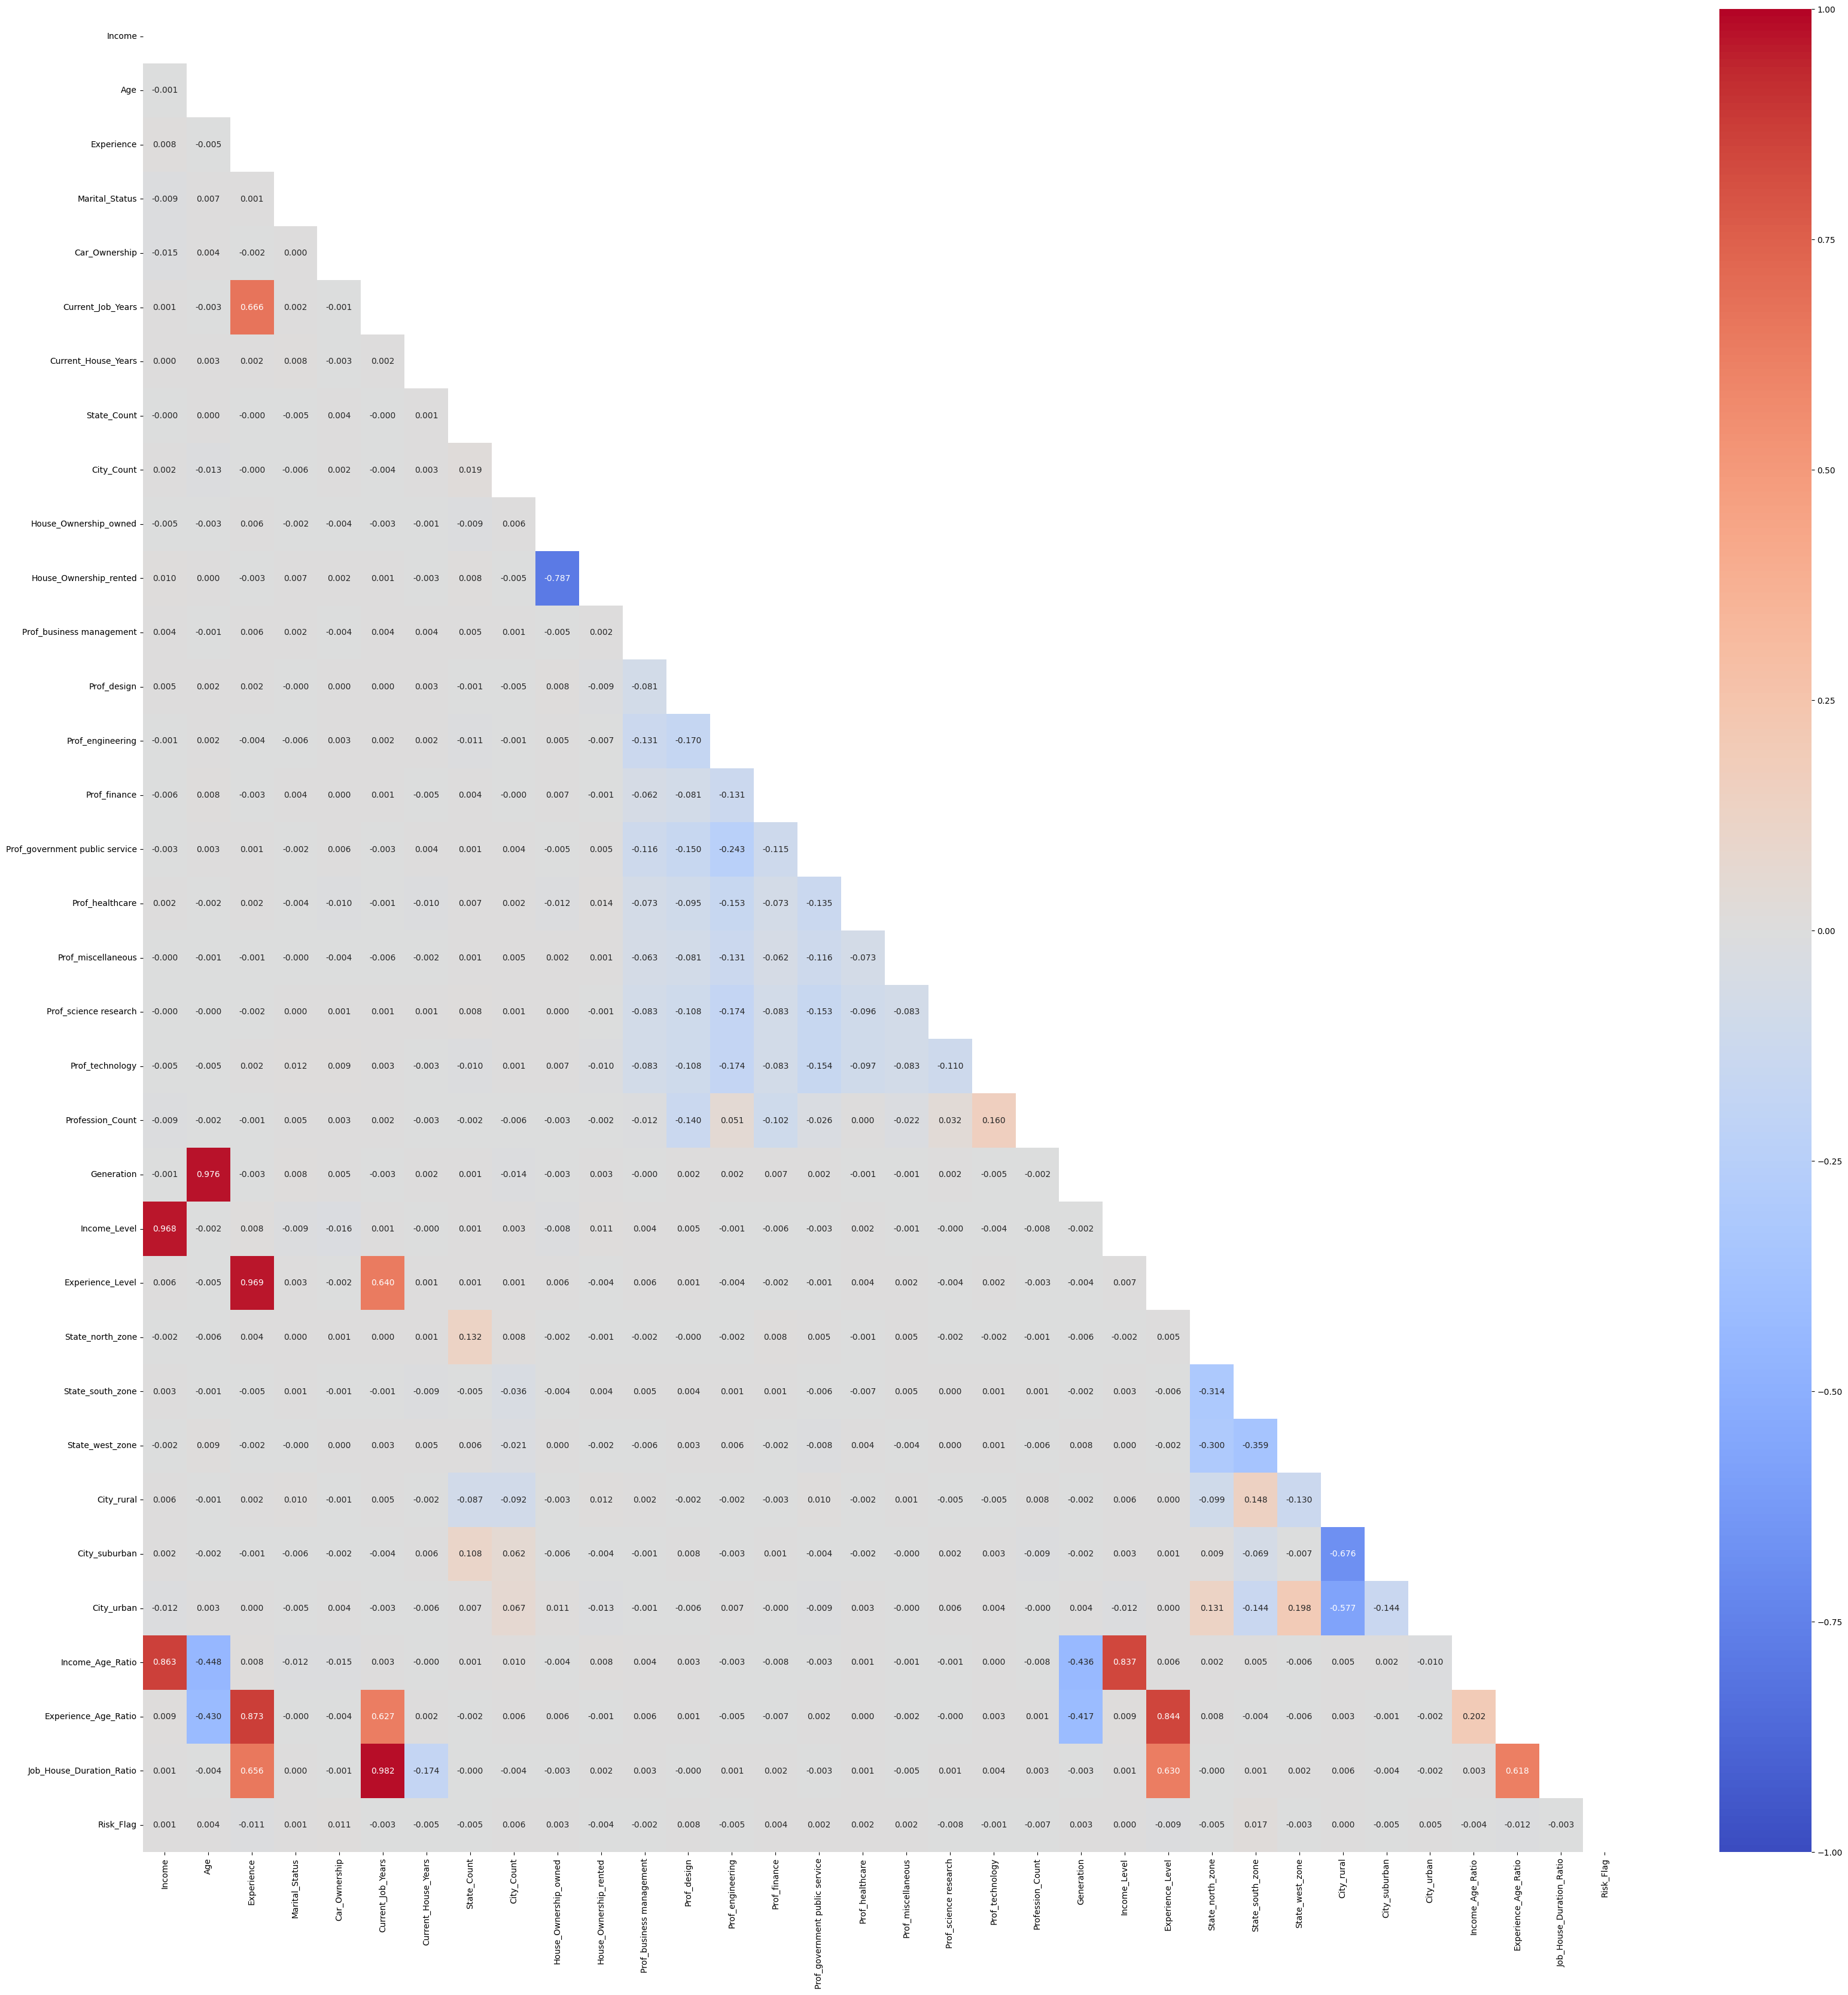

In [103]:
# Heatmap (spearman corr)
plt.figure(figsize=(40,40))
mask = np.triu(np.ones_like(df_encoding.corr(numeric_only=True), dtype=bool))
sns.heatmap(data = df_encoding.corr(method='spearman', numeric_only=True), mask=mask, cmap='coolwarm', annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.show()

In [106]:
# Feature-Feature correlation representation in tabular form 
corr_feature = df_encoding.corr(method='spearman', numeric_only=True)

# Flatten correlation matrix
flat_cm = corr_feature.stack().reset_index()
flat_cm.columns = ['A', 'B', 'Corr Value']

# Filter the DataFrame using .loc for consistency
flat_cm = flat_cm.loc[
    (flat_cm['Corr Value'] < 1) & # Filter for the feature correlation by itself
    (flat_cm['A'] != "Risk_Flag") & # Filter out the target variable(s)
    (flat_cm['B'] != "Risk_Flag")
]

flat_cm['Corr Type'] = flat_cm['Corr Value'].apply(lambda x : 'Positive' if x >= 0 else 'Negative')
flat_cm['Corr Value'] = flat_cm['Corr Value'].apply(lambda x : abs(x))
flat_cm = flat_cm.sort_values(by='Corr Value', ascending=False, ignore_index=True)

redundan_cm = flat_cm.drop_duplicates(subset=['Corr Value', 'Corr Type']).reset_index(drop=True) # Filter for the feature correlation of A-B then B-A
print("Correlation Between Features :")
display(redundan_cm.iloc[:20])

Correlation Between Features :


A                         B  Corr Value Corr Type
0   Job_House_Duration_Ratio         Current_Job_Years    0.981519  Positive
1                        Age                Generation    0.976024  Positive
2                 Experience          Experience_Level    0.968691  Positive
3                     Income              Income_Level    0.968246  Positive
4       Experience_Age_Ratio                Experience    0.872598  Positive
5           Income_Age_Ratio                    Income    0.862993  Positive
6       Experience_Age_Ratio          Experience_Level    0.844313  Positive
7           Income_Age_Ratio              Income_Level    0.837429  Positive
8     House_Ownership_rented     House_Ownership_owned    0.786993  Negative
9              City_suburban                City_rural    0.676336  Negative
10         Current_Job_Years                Experience    0.666470  Positive
11                Experience  Job_House_Duration_Ratio    0.656085  Positive
12          Experience_Level         Current_Job_Years    0.640157  Positive
13  Job_House_Duration_Ratio          Experience_Level    0.629795  Positive
14         Current_Job_Years      Experience_Age_Ratio    0.626845  Positive
15  Job_House_Duration_Ratio      Experience_Age_Ratio    0.617996  Positive
16                City_rural                City_urban    0.577118  Negative
17          Income_Age_Ratio                       Age    0.448018  Negative
18          Income_Age_Ratio                Generation    0.436069  Negative
19                       Age      Experience_Age_Ratio    0.429554  Negative

In [114]:
change_target_dtype(df_encoding, target_type='numerical')

In [115]:
# Feature-Target correlation representation in tabular form 
corr_target = df_encoding.corrwith(df_encoding["Risk_Flag"], method='spearman', numeric_only=True)
corr = corr_target.reset_index(name='Corr Value').rename(columns={'index' : 'Feature'})

corr = corr.loc[corr['Feature'] != "Risk_Flag"] # Filter for the feature correlation by itself

corr['Corr Type'] = corr['Corr Value'].apply(lambda x : 'Positive' if x >= 0 else 'Negative')
corr['Corr Value'] = corr['Corr Value'].apply(lambda x : abs(x))
corr = corr.sort_values('Corr Value', ascending=False, ignore_index=True)

print("Correlation of Features to Target :")
display(corr.iloc[:20])

Correlation of Features to Target :


Feature  Corr Value Corr Type
0         State_south_zone    0.016780  Positive
1     Experience_Age_Ratio    0.012238  Negative
2            Car_Ownership    0.011265  Positive
3               Experience    0.010709  Negative
4         Experience_Level    0.008536  Negative
5    Prof_science research    0.007770  Negative
6              Prof_design    0.007752  Positive
7         Profession_Count    0.006596  Negative
8               City_Count    0.005921  Positive
9            City_suburban    0.005366  Negative
10        State_north_zone    0.005268  Negative
11              City_urban    0.005148  Positive
12     Current_House_Years    0.004781  Negative
13        Prof_engineering    0.004763  Negative
14             State_Count    0.004685  Negative
15  House_Ownership_rented    0.004412  Negative
16            Prof_finance    0.003982  Positive
17                     Age    0.003846  Positive
18        Income_Age_Ratio    0.003791  Negative
19       Current_Job_Years    0.003427  Negative

## Checking multicolinearity using Variance Inflation Factor (VIF)

### Reminder Regarding Variance Inflation Factor (VIF)

#### Variance Inflation Factor (VIF)

Variance Inflation Factor (VIF) is a statistical metric used to detect multicollinearity among independent variables in regression models. Multicollinearity occurs when independent variables are highly correlated with each other, which can lead to:
- Unstable coefficient estimates
- Inflated standard errors
- Difficulties in model interpretation

##### Mathematical Formulation
The VIF for the \(i\)-th independent variable is calculated as:

\[
\text{VIF}_i = \frac{1}{1 - R_i^2}
\]

Where \(R_i^2\) is the \(R^2\) value obtained from regressing the \(i\)-th independent variable against all other independent variables.

##### Interpretation Guidelines
- **VIF = 1**: No multicollinearity
- **VIF > 1**: Increasing levels of multicollinearity
- **VIF > 5 or 10**: Significant multicollinearity (potentially problematic)

##### Practical Implications
1. **Regression Tasks (commonly used)**: 
   - Helps identify which variables contribute to multicollinearity
   - Assists in deciding whether to:
     * Remove certain variables
     * Re-specify the model
     * Apply techniques to mitigate multicollinearity

2. **Classification Tasks**:
   - Applicable in coefficient-based models like logistic regression
   - Less critical in tree-based models (Random Forest, Gradient Boosting), these models can handle correlated predictors to some extent
   - Interpretation may vary based on the specific algorithm

##### Recommendations
- Always assess multicollinearity, regardless of the task (regression or classification)
- Consider the context and characteristics of your data
- Use VIF as one of multiple tools for model diagnostics

##### Reference
Detailed documentation: [Statsmodels VIF Function](https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html#statsmodels.stats.outliers_influence.variance_inflation_factor)

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, target_col, high_threshold=10, moderate_threshold=5):
    """
    Calculate VIF for each feature in the dataset.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame
    target_col (str): Name of target column to exclude
    
    Returns:
    pd.DataFrame: DataFrame with VIF scores
    """
    # Create DataFrame of features only
    features_df = df.drop(columns=[target_col])
    
    # Initialize VIF DataFrame
    vif_data = pd.DataFrame()
    vif_data['Feature'] = features_df.columns
    
    # Calculate VIF for each feature
    try:
        vif_data['VIF'] = [variance_inflation_factor(features_df.values, i) 
                          for i in range(features_df.shape[1])]
    except Exception as e:
        print(f"Error calculating VIF: {e}")
        return None
    
    # Sort by VIF score
    vif_data = vif_data.sort_values('VIF', ascending=False).reset_index(drop=True)
    
    # Add interpretation column
    vif_data['Interpretation'] = vif_data['VIF'].apply(lambda x: 
        'High multicollinearity' if x > high_threshold
        else ('Moderate multicollinearity' if x > moderate_threshold 
        else 'Low multicollinearity'))
    
    return vif_data

In [129]:
# VIF calculation function usage
vif_results = calculate_vif(df_encoding, 'Risk_Flag')
display(vif_results)

Feature         VIF              Interpretation
0                 Profession_Count  335.917971      High multicollinearity
1                Current_Job_Years  237.256526      High multicollinearity
2         Job_House_Duration_Ratio  232.523209      High multicollinearity
3              Current_House_Years  226.304807      High multicollinearity
4                              Age  209.115618      High multicollinearity
5                       City_Count   83.541190      High multicollinearity
6                       Experience   83.383416      High multicollinearity
7                           Income   82.921250      High multicollinearity
8                       Generation   58.599217      High multicollinearity
9                       City_rural   45.486809      High multicollinearity
10                    Income_Level   44.466599      High multicollinearity
11                Experience_Level   41.200099      High multicollinearity
12          House_Ownership_rented   31.547381      High multicollinearity
13                Income_Age_Ratio   22.652058      High multicollinearity
14            Experience_Age_Ratio   21.744979      High multicollinearity
15                   City_suburban    9.822789  Moderate multicollinearity
16                      City_urban    7.775194  Moderate multicollinearity
17                     State_Count    4.990744       Low multicollinearity
18                Prof_engineering    4.560618       Low multicollinearity
19  Prof_government public service    3.915358       Low multicollinearity
20           House_Ownership_owned    2.729790       Low multicollinearity
21                 Prof_technology    2.667317       Low multicollinearity
22           Prof_science research    2.645173       Low multicollinearity
23                     Prof_design    2.568836       Low multicollinearity
24                 Prof_healthcare    2.286063       Low multicollinearity
25                 State_west_zone    2.077898       Low multicollinearity
26                State_south_zone    2.057265       Low multicollinearity
27        Prof_business management    1.979516       Low multicollinearity
28              Prof_miscellaneous    1.975333       Low multicollinearity
29                    Prof_finance    1.965169       Low multicollinearity
30                State_north_zone    1.876798       Low multicollinearity
31                   Car_Ownership    1.420204       Low multicollinearity
32                  Marital_Status    1.113211       Low multicollinearity

## Checking feature importance using SelectKBest

### Reminder Regarding Feature Relevance Calculation Method using SelectKBest

`sklearn.feature_selection.f_classif`, `sklearn.feature_selection.mutual_info_classif`, and `sklearn.feature_selection.chi2` are three different feature selection methods in scikit-learn, and each of them uses a different statistical test or measure to evaluate the importance of features in a classification task.

1. **`sklearn.feature_selection.f_classif`:**

   - **Type of Test:** Analysis of variance (ANOVA) F-statistic.
   - **Nature:** Assesses the linear dependency between each feature and the target variable.
   - **Assumption:** Assumes that the features are normally distributed and that the variance of the feature values is roughly equal across different classes.
   - **Usage:** Suitable for identifying features with significant differences in means among different classes.

   ```python
   from sklearn.feature_selection import f_classif
   ```

2. **`sklearn.feature_selection.mutual_info_classif`:**

   - **Type of Measure:** Mutual information, a non-parametric measure of the dependency between variables.
   - **Nature:** Captures any kind of statistical dependency, whether it is linear or non-linear.
   - **Assumption:** Has fewer assumptions compared to `f_classif` and is more robust when the relationship between features and the target variable is not strictly linear.
   - **Usage:** Suitable for identifying features with any type of relationship with the target variable.

   ```python
   from sklearn.feature_selection import mutual_info_classif
   ```

3. **`sklearn.feature_selection.chi2`:**

   - **Type of Test:** Chi-squared (χ²) statistical test.
   - **Nature:** Assesses the independence between each feature and the target variable.
   - **Assumption:** Assumes that the features and target variable are categorical.
   - **Usage:** Suitable for identifying features that are independent of the target variable in a categorical setting.

   ```python
   from sklearn.feature_selection import chi2
   ```

**Summary:**
- `f_classif` is based on the F-statistic and assumes a linear relationship between features and the target variable.
- `mutual_info_classif` is based on mutual information and is non-parametric, capturing any kind of statistical dependency.
- `chi2` uses the chi-squared test and is suitable for categorical data, assessing the independence between features and the target variable.

The choice between these methods depends on the nature of your data, the type of variables you have, and the assumptions you are willing to make about the relationships between features and the target variable. If your data is categorical, `chi2` might be more appropriate, while `f_classif` and `mutual_info_classif` are suitable for continuous or ordinal data.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [99]:
# Create temporary dataframe for testing SelectKBest
df_feature_target_relation = df_encoding.copy()
df_feature_target_relation.head()

Income  Age  Experience  Marital_Status  House_Ownership  Car_Ownership  \
0  1303834   23           3               0                1              0   
1  7574516   40          10               0                1              0   
2  3991815   66           4               1                1              0   
3  6256451   41           2               0                1              1   
4  5768871   47          11               0                1              0   

   Current_Job_Years  Current_House_Years  State_Count  City_Count  \
0                  3                   13        14122         798   
1                  9                   13        25562         849   
2                  4                   10         5805         688   
3                  2                   12         4658         607   
4                  3                   14        16537         809   

   Prof_aviation  Prof_business management  Prof_design  Prof_engineering  \
0              0                         0            0                 1   
1              0                         0            0                 0   
2              0                         0            0                 0   
3              0                         0            0                 0   
4              0                         0            0                 0   

   Prof_finance  Prof_government public service  Prof_healthcare  \
0             0                               0                0   
1             0                               0                0   
2             0                               0                0   
3             0                               0                0   
4             0                               1                0   

   Prof_miscellaneous  Prof_science research  Prof_technology  \
0                   0                      0                0   
1                   0                      0                1   
2                   1                      0                0   
3                   0                      0                1   
4                   0                      0                0   

   Profession_Count  Generation  Income_Level  Experience_Level  \
0              5217           0             0                 0   
1              5053           1             3                 1   
2              5195           3             1                 0   
3              5053           1             2                 0   
4              4413           2             2                 2   

   State_east_zone  State_north_zone  State_south_zone  State_west_zone  \
0                0                 0                 0                1   
1                0                 0                 0                1   
2                0                 0                 1                0   
3                1                 0                 0                0   
4                0                 0                 1                0   

   City_metro  City_rural  City_suburban  City_urban  Income_Age_Ratio  \
0           0           1              0           0      56688.434783   
1           0           1              0           0     189362.900000   
2           0           1              0           0      60482.045455   
3           0           1              0           0     152596.365854   
4           0           1              0           0     122741.936170   

   Experience_Age_Ratio  Job_House_Duration_Ratio  Risk_Flag  
0              0.130435                  0.230769          0  
1              0.250000                  0.692308          0  
2              0.060606                  0.400000          0  
3              0.048780                  0.166667          1  
4              0.234043                  0.214286          1

In [100]:
#Calculation of feature importance score to target (numerical/categorical feature - categorical target)
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Separate features and target variable
x_features_test = df_feature_target_relation.drop(columns=['Risk_Flag'])  # Features
y_target_test = df_feature_target_relation['Risk_Flag']  # Target variable

# Instantiate SelectKBest
k_best = SelectKBest(score_func=mutual_info_classif, k='all')  # Use 'all' to see scores for all features

# Fit and transform the data
x_selected_features = k_best.fit_transform(x_features_test, y_target_test)

# Get scores, p-values, and feature names
feature_scores = k_best.scores_
feature_pvalues = k_best.pvalues_ #for mutual_info_classif this will display None but not for other method
feature_names = x_features_test.columns

# Create a DataFrame to display feature scores and p-values
feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores, 'P_Values' : feature_pvalues})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Display the feature scores and p-values
display(feature_scores_df)

Feature     Score P_Values
32                Income_Age_Ratio  0.160810     None
0                           Income  0.159842     None
29                      City_rural  0.041764     None
4                  House_Ownership  0.030773     None
33            Experience_Age_Ratio  0.021829     None
5                    Car_Ownership  0.012132     None
23                Experience_Level  0.011476     None
22                    Income_Level  0.010244     None
26                State_south_zone  0.010200     None
7              Current_House_Years  0.009552     None
27                 State_west_zone  0.009353     None
24                 State_east_zone  0.009217     None
21                      Generation  0.009078     None
9                       City_Count  0.007233     None
13                Prof_engineering  0.006450     None
8                      State_Count  0.005733     None
25                State_north_zone  0.005580     None
15  Prof_government public service  0.004409     None
6                Current_Job_Years  0.004308     None
34        Job_House_Duration_Ratio  0.003811     None
2                       Experience  0.003621     None
30                   City_suburban  0.002079     None
18           Prof_science research  0.002049     None
1                              Age  0.001869     None
20                Profession_Count  0.001549     None
14                    Prof_finance  0.001504     None
3                   Marital_Status  0.001383     None
31                      City_urban  0.001273     None
12                     Prof_design  0.001112     None
19                 Prof_technology  0.001090     None
11        Prof_business management  0.001038     None
10                   Prof_aviation  0.000853     None
16                 Prof_healthcare  0.000198     None
28                      City_metro  0.000000     None
17              Prof_miscellaneous  0.000000     None

In [101]:
#Calculation of feature importance score to target (categorical feature - categorical target)
from sklearn.feature_selection import SelectKBest, chi2

# Separate features and target variable
x_features_test = df_feature_target_relation.drop(columns=['Risk_Flag'])  # Features
y_target_test = df_feature_target_relation['Risk_Flag']  # Target variable

# Instantiate SelectKBest
k_best = SelectKBest(score_func=chi2, k='all')  # Use 'all' to see scores for all features

# Fit and transform the data
x_selected_features = k_best.fit_transform(x_features_test, y_target_test)

# Get scores, p-values, and feature names
feature_scores = k_best.scores_
feature_pvalues = k_best.pvalues_ #for mutual_info_classif this will display None but not for other method
feature_names = x_features_test.columns

# Create a DataFrame to display feature scores and p-values
feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores, 'P_Values' : feature_pvalues})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Display the feature scores and p-values
display(feature_scores_df)

Feature         Score       P_Values
0                           Income  3.992087e+06   0.000000e+00
32                Income_Age_Ratio  2.434992e+06   0.000000e+00
8                      State_Count  1.490513e+05   0.000000e+00
2                       Experience  1.073079e+03  2.344231e-235
1                              Age  6.986581e+02  5.854660e-154
20                Profession_Count  5.163660e+02  2.613234e-114
9                       City_Count  4.911179e+02  8.138839e-109
23                Experience_Level  2.118227e+02   5.497972e-48
6                Current_Job_Years  1.518872e+02   6.706133e-35
5                    Car_Ownership  1.016771e+02   6.535069e-24
3                   Marital_Status  1.006588e+02   1.092775e-23
21                      Generation  8.272359e+01   9.436847e-20
28                      City_metro  5.163920e+01   6.669638e-13
24                 State_east_zone  4.542573e+01   1.585375e-11
25                State_north_zone  3.371357e+01   6.385362e-09
26                State_south_zone  3.036029e+01   3.587983e-08
15  Prof_government public service  2.445678e+01   7.599564e-07
31                      City_urban  2.011023e+01   7.310464e-06
13                Prof_engineering  1.976034e+01   8.778541e-06
27                 State_west_zone  1.639546e+01   5.140832e-05
34        Job_House_Duration_Ratio  1.187821e+01   5.679460e-04
10                   Prof_aviation  9.620536e+00   1.924136e-03
18           Prof_science research  9.283338e+00   2.312477e-03
11        Prof_business management  7.758507e+00   5.346013e-03
16                 Prof_healthcare  7.360631e+00   6.666739e-03
33            Experience_Age_Ratio  4.957371e+00   2.597968e-02
19                 Prof_technology  4.647432e+00   3.110003e-02
12                     Prof_design  4.323226e+00   3.759559e-02
14                    Prof_finance  3.533869e+00   6.012732e-02
4                  House_Ownership  2.436755e+00   1.185212e-01
30                   City_suburban  2.202986e+00   1.377437e-01
7              Current_House_Years  7.869449e-01   3.750255e-01
22                    Income_Level  7.374314e-01   3.904849e-01
17              Prof_miscellaneous  6.712072e-01   4.126310e-01
29                      City_rural  1.090452e-03   9.736571e-01

- It can be seen that the results obtained using SelectKBest are quite different from the results of feature-target correlation calculation using `df.corr()`, especially with the SelectKBest method which is more robust in capturing non-linear feature-target relationships such as mutual_info_classif.

- In this method, it was found that the most relevant feature to the Risk_Flag is related to Income, which actually sounds more reasonable.

In [104]:
df_encoding.columns

Index(['Income', 'Age', 'Experience', 'Marital_Status', 'House_Ownership',
       'Car_Ownership', 'Current_Job_Years', 'Current_House_Years',
       'State_Count', 'City_Count', 'Prof_aviation',
       'Prof_business management', 'Prof_design', 'Prof_engineering',
       'Prof_finance', 'Prof_government public service', 'Prof_healthcare',
       'Prof_miscellaneous', 'Prof_science research', 'Prof_technology',
       'Profession_Count', 'Generation', 'Income_Level', 'Experience_Level',
       'State_east_zone', 'State_north_zone', 'State_south_zone',
       'State_west_zone', 'City_metro', 'City_rural', 'City_suburban',
       'City_urban', 'Income_Age_Ratio', 'Experience_Age_Ratio',
       'Job_House_Duration_Ratio', 'Risk_Flag'],
      dtype='object')

In [105]:
# Select only relevant features for each cases before moving to modelling process
df_model = df_encoding.copy()

# Important features only based on correlation and K-best parameter (correlation > 0.7 will be dropped)
selected_features = ['Income', 'House_Ownership', 'Car_Ownership', 'Current_House_Years', 'Generation',
                     'State_east_zone', 'State_north_zone', 'State_south_zone', 'State_west_zone',
                     'City_metro', 'City_rural', 'City_suburban', 'City_urban',
                     'Experience_Age_Ratio', 'Risk_Flag']

df_model = df_model[selected_features]

- In this section, features will be selected based on their influence on the target variable as observed in the correlation values (df.corr()) and relevance (SelectKBest) to the target above. This may vary depending on the modeling phase and experimentation with which features to include.

- Some features will be dropped due to high correlation with other features as seen in the df.corr() results (because they are redundant, only one will be retained).

In [43]:
# Export dataframe before modelling for deployment purpose later
df_model.to_csv('df_model.csv', index=False)

### Additional External Features

Some features that have relevant information and may significantly improve the model performance if added from external sources:

1. Debt amount: The total amount of money owed by an individual or organization to another party.
2. Living cost: Living expenses that can vary depending on location, lifestyle, and individual needs.
3. Credit score: A credit score is calculated based on various factors such as payment history, amount of debt, and length of credit history.
4. Loan purpose: The reason for the loan, i.e., the purpose for which an individual or organization is borrowing money.
5. Total asset: The overall value of assets owned by the borrower in monetary terms.
6. Tenor: The duration or term of the loan."

# Split Train and Test Data

In [129]:
# Spliting data into train-test
X = df_model.drop(columns=['Risk_Flag'])
y = df_model[['Risk_Flag']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

#Check dimension of train and test data
print(f'Dimension of x_train data : {X_train.shape}')
print(f'Dimension of y_train data : {y_train.shape}')
print(f'Dimension of x_test data : {X_test.shape}')
print(f'Dimension of y_test data : {y_test.shape}')

Dimension of x_train data : (176400, 14)
Dimension of y_train data : (176400, 1)
Dimension of x_test data : (75600, 14)
Dimension of y_test data : (75600, 1)


**Additional Information About Split Train-Test Imbalanced Cases**

The class distribution in the training set and the test set may not necessarily reflect the original class imbalance if you use a simple train-test split, especially if the dataset is imbalanced.

When you split the data into training and testing sets, the split is often random, and there's a chance that the class distribution in the training set and test set might differ from the original dataset. If the class distribution is imbalanced, you might end up with imbalanced subsets in both the training and testing sets.

To address this concern, you can use techniques like stratified sampling during the train-test split. Stratified sampling ensures that the class distribution is preserved in both the training and testing sets, maintaining the original imbalance. This is particularly important when dealing with imbalanced datasets because it helps ensure that the model learns and generalizes well on both classes.

Here's an example using scikit-learn in Python:

```python
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
```

In this example, the `stratify=y` argument ensures that the class distribution in the target variable `y` is preserved when splitting the data into training and testing sets. Adjust the `test_size` parameter based on your preference for the split ratio.

In [130]:
# Checking imbalance before train-test split
value_counts = y.value_counts()
percentage_values = (value_counts / len(y)) * 100
print(percentage_values)

Risk_Flag
0            87.7
1            12.3
Name: count, dtype: float64


In [131]:
# Checking imbalance after train-test split
value_counts = y_train.value_counts()
percentage_values = (value_counts / len(y_train)) * 100
print(percentage_values)

Risk_Flag
0            87.700113
1            12.299887
Name: count, dtype: float64


# Feature Scaling

In [132]:
len(X_train.columns)

14

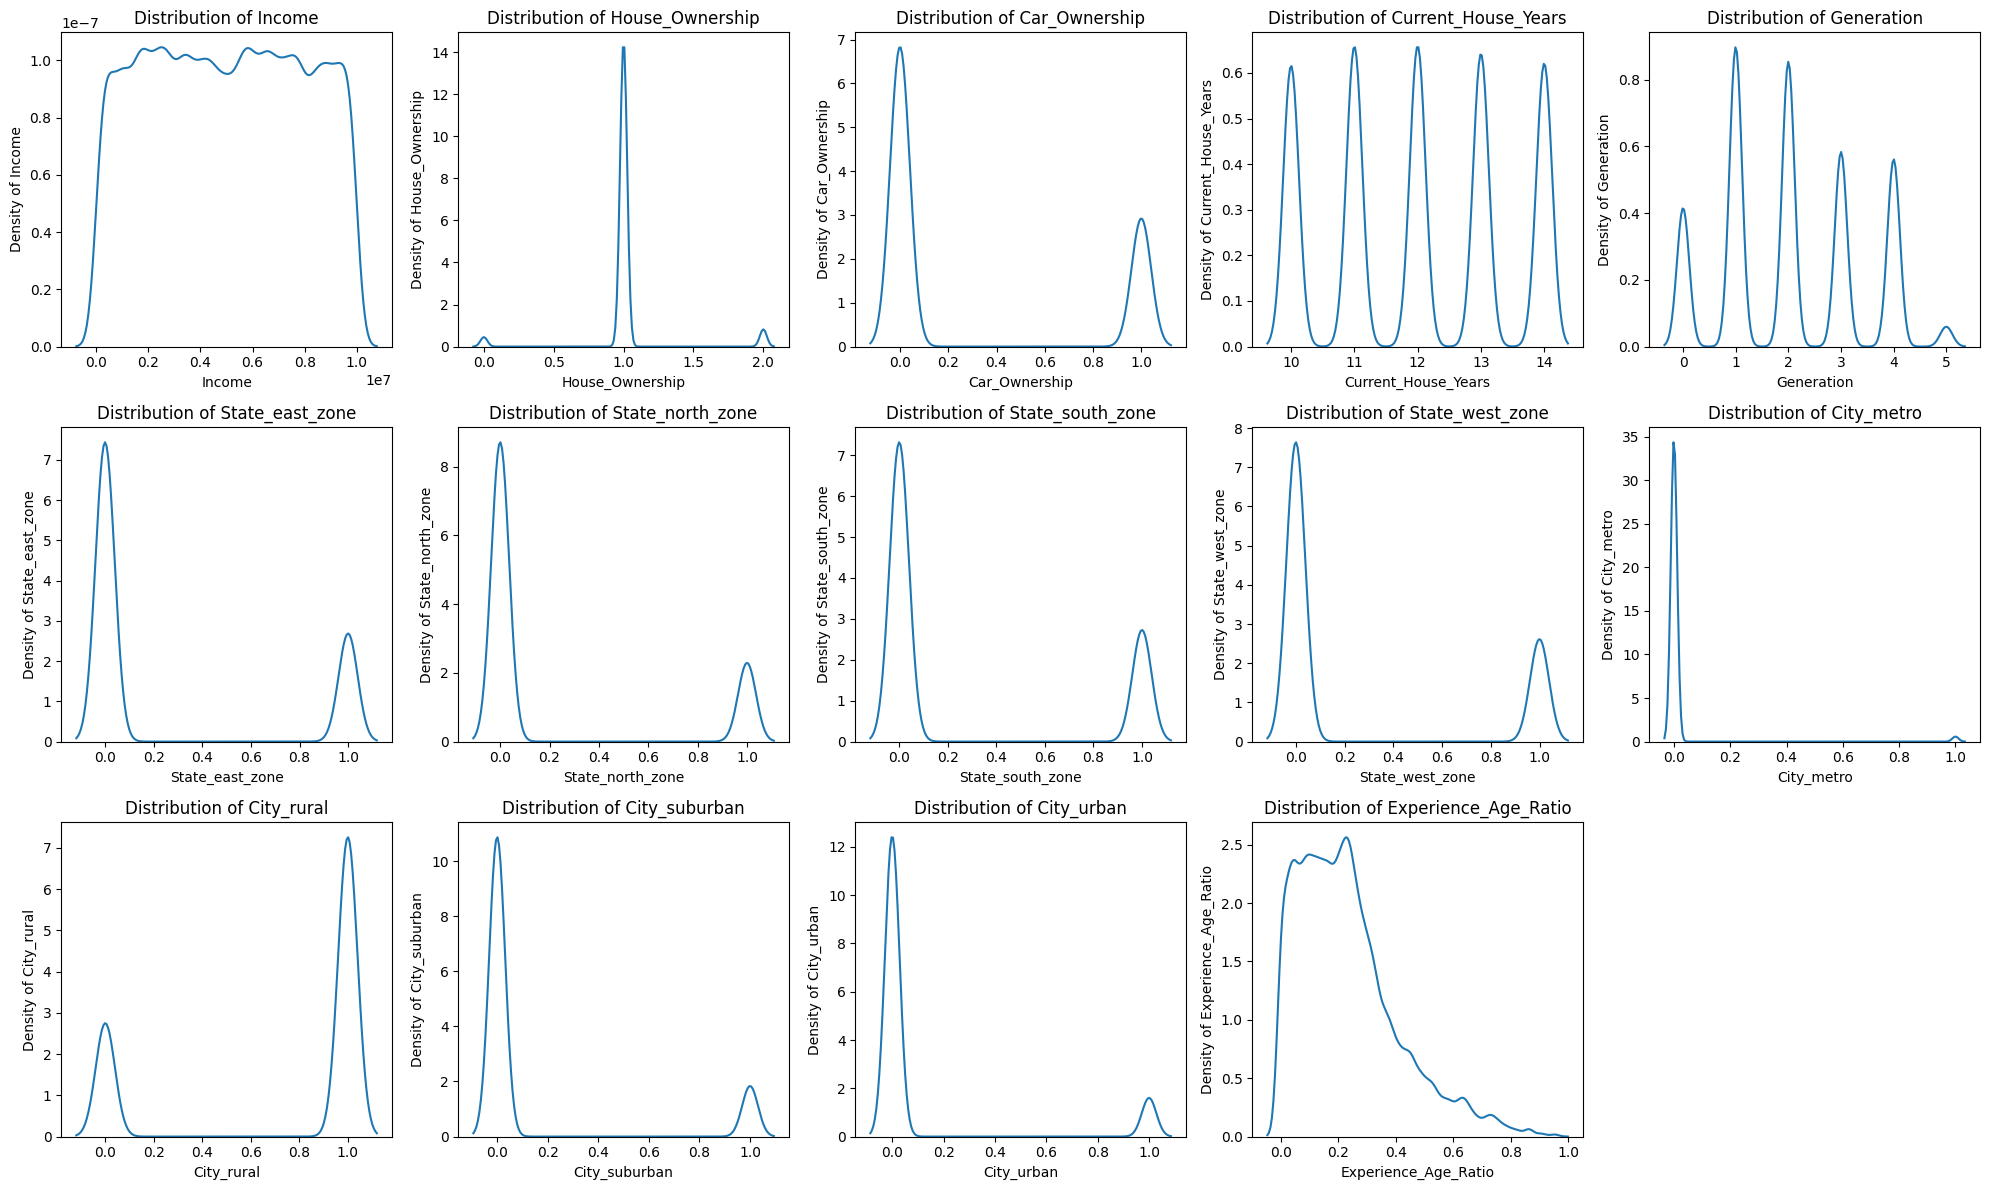

In [133]:
# Checking distribution before scaling
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(X_train.columns) :
  sns.kdeplot(data = X_train, ax=axes[i], x=col)
  axes[i].set_title(f'Distribution of {col}')
  axes[i].set_ylabel(f'Density of {col}')
  axes[i].set_xlabel(f'{col}')

# Remove the last subplot if there are fewer features than subplots
if len(X_train.columns) < len(axes) :
    axes[len(X_train.columns)].remove()

plt.tight_layout()
plt.show()

In [134]:
# Normalization (MinMaxScaller) and log trasnformation
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

columns_to_scale = ['Income', 'Current_House_Years'] # Choose columns for scaling based on the distribution above

X_train[columns_to_scale] = ms.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = ms.transform(X_test[columns_to_scale])

X_train["Experience_Age_Ratio"] = np.log1p(X_train["Experience_Age_Ratio"])
X_test["Experience_Age_Ratio"] = np.log1p(X_test["Experience_Age_Ratio"])

# Save the scaler using joblib and pickle
joblib.dump(ms, 'minmax_scaler.joblib')

with open('minmax_scaler.pkl', 'wb') as file:
    pickle.dump(ms, file)

In [135]:
# #Standardization
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()

# columns_to_scale = ['Income', 'Current_House_Years'] #Choose columns for scaling based on the distribution above

# x_train[columns_to_scale] = ss.fit_transform(x_train[columns_to_scale])
# x_test[columns_to_scale] = ss.transform(x_test[columns_to_scale])

# Save the scaler using joblib and pickle
# joblib.dump(ss, 'standard_scaler.joblib')
# with open('standard_scaler.pkl', 'wb') as file:
#     pickle.dump(ss, file)

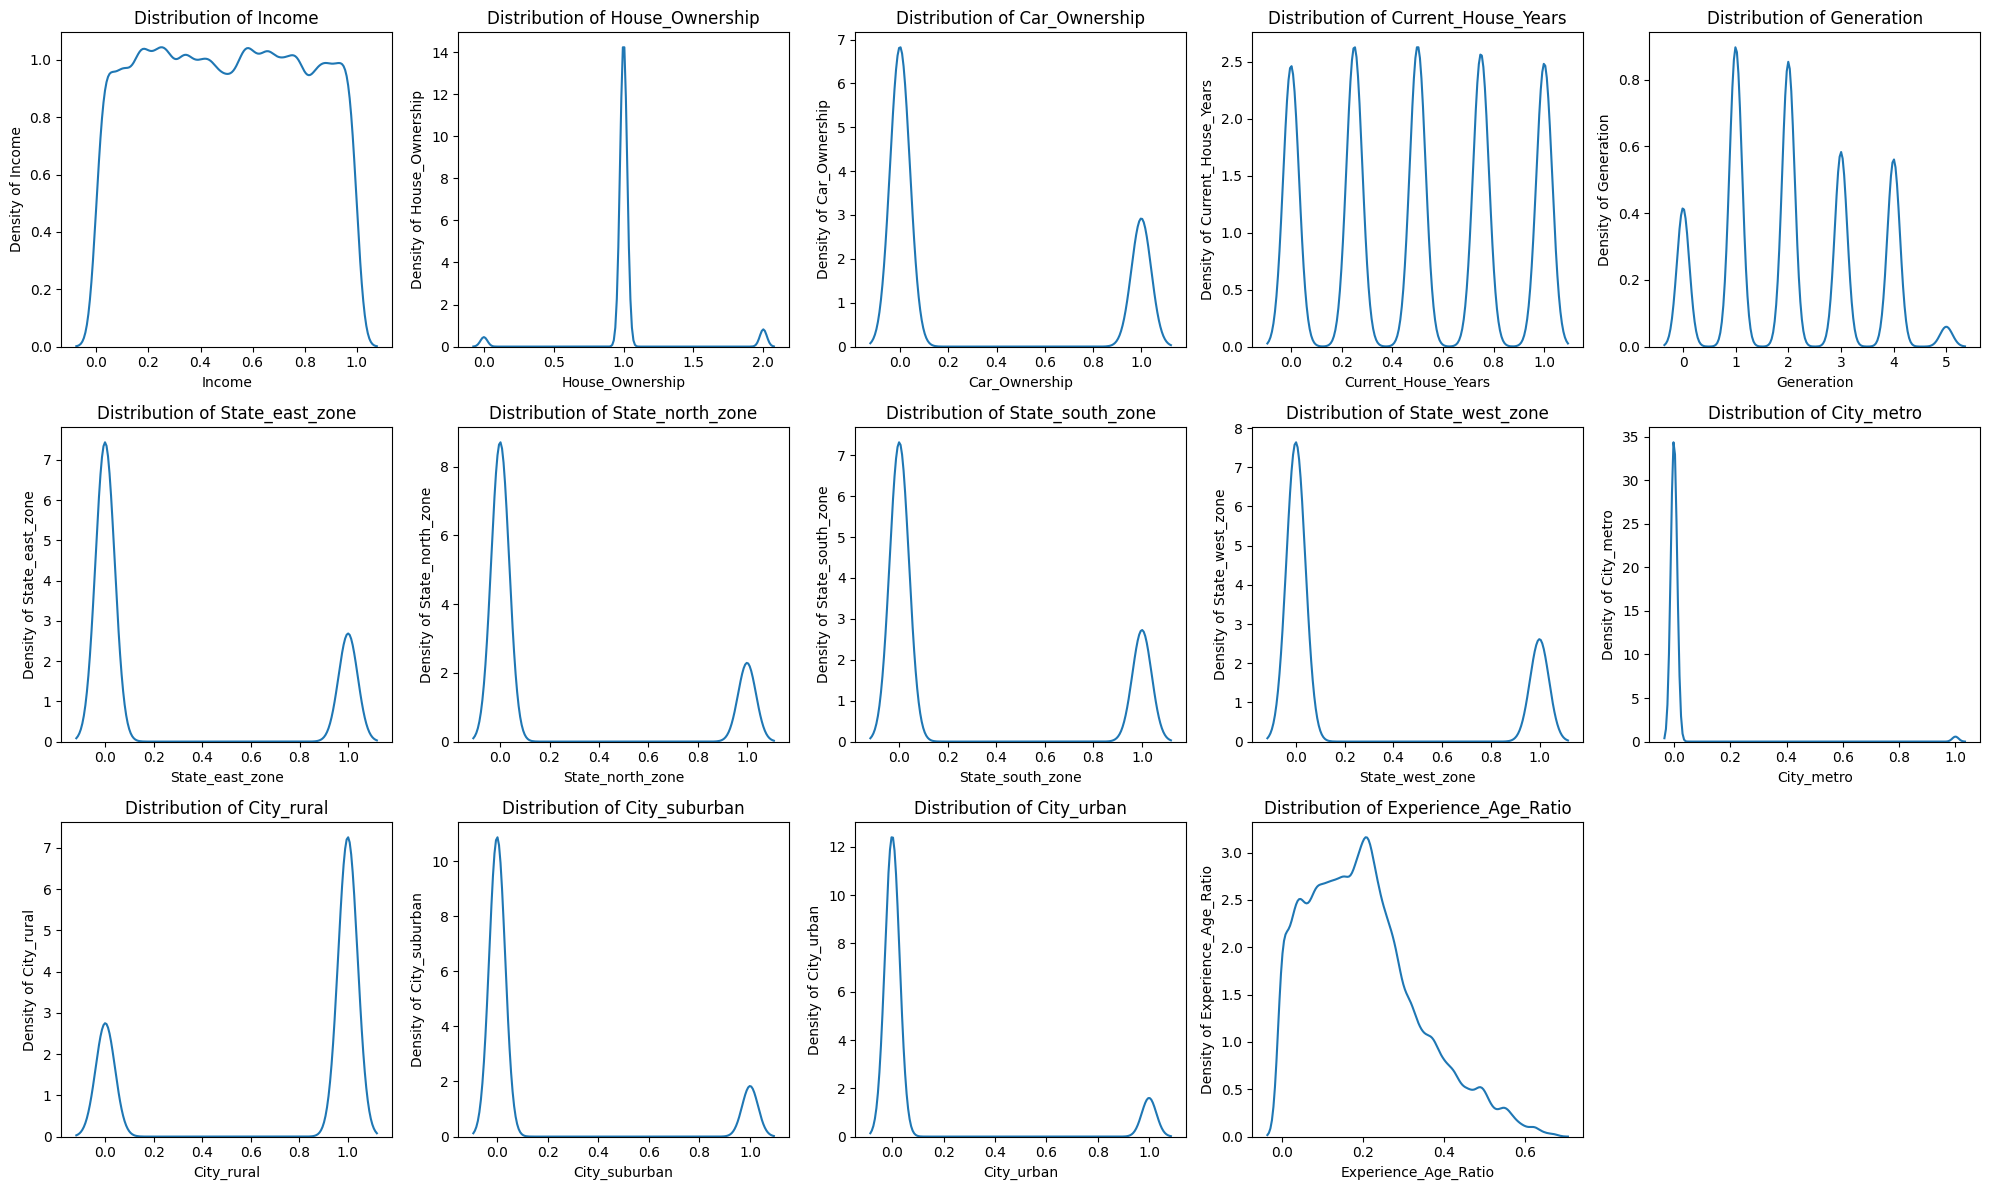

In [136]:
# Checking distribution after scaling
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(X_train.columns) :
  sns.kdeplot(data = X_train, ax=axes[i], x=col)
  axes[i].set_title(f'Distribution of {col}')
  axes[i].set_ylabel(f'Density of {col}')
  axes[i].set_xlabel(f'{col}')

# Remove the last subplot if there are fewer features than subplots
if len(X_train.columns) < len(axes) :
    axes[len(X_train.columns)].remove()

plt.tight_layout()
plt.show()

# Handling Class Imbalance

In [137]:
# Initiate dataframe before sampling
X_imbalance = X_train.copy()
y_imbalance = y_train.copy()

In [138]:
# Target values before sampling
value_counts = y_imbalance.iloc[:, 0].value_counts()
print(value_counts)

Risk_Flag
0    154703
1     21697
Name: count, dtype: int64


In [139]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

print("Before sampling:")
print("x_imbalance shape:", X_imbalance.shape)
print("y_imbalance shape:", y_imbalance.shape)

# # RandomUnderSampler
# rus = RandomUnderSampler(sampling_strategy=1)
# x_train_under, y_train_under = rus.fit_resample(x_imbalance, y_imbalance)

# print("After RandomUnderSampler:")
# print("x_train_under shape:", x_train_under.shape)
# print("y_train_under shape:", y_train_under.shape)

# # RandomOverSampler
# ros = RandomOverSampler(sampling_strategy=1)
# x_train_over, y_train_over = ros.fit_resample(x_imbalance, y_imbalance)

# print("After RandomOverSampler:")
# print("x_train_over shape:", x_train_over.shape)
# print("y_train_over shape:", y_train_over.shape)

# SMOTE
smote = SMOTE(sampling_strategy=0.5)
X_train_smote, y_train_smote = smote.fit_resample(X_imbalance, y_imbalance)

print("After SMOTE:")
print("x_train_SMOTE shape:", X_train_smote.shape)
print("y_train_SMOTE shape:", y_train_smote.shape)

Before sampling:
x_imbalance shape: (176400, 14)
y_imbalance shape: (176400, 1)
After SMOTE:
x_train_SMOTE shape: (232054, 14)
y_train_SMOTE shape: (232054, 1)


In [140]:
# Target values after sampling
value_counts = y_train_smote.iloc[:, 0].value_counts()
print(value_counts)

Risk_Flag
0    154703
1     77351
Name: count, dtype: int64


In [141]:
# Initialize sampled train set for modeling process
X_train_sampled = X_train_smote.copy()
y_train_sampled = y_train_smote.copy()

Reminder of class imbalance main concept:

- Undersampling: Majority follows the minority
- Oversampling: Minority follows the majority

# **STAGE 3 : MODELLING AND EVALUATION**

## Deep Learning Algorithm

#### Architecture Modified

In [ ]:
from tensorflow import keras
from sklearn.metrics import roc_curve

# Custom F1 Score metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.round(y_pred)
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

# Step 1: Define the model architecture with L2 regularization
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(
            units=256,
            activation='relu',
            input_shape=input_shape,
            kernel_initializer='he_normal',
            bias_initializer='zeros',
            kernel_regularizer=keras.regularizers.l2(0.001),
            activity_regularizer=None,
            kernel_constraint=None
        ),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.4),

        keras.layers.Dense(
            units=128,
            activation='relu',
            kernel_initializer='he_normal',
            bias_initializer='zeros',
            kernel_regularizer=keras.regularizers.l2(0.001),
            activity_regularizer=None,
            kernel_constraint=None
        ),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.4),

        keras.layers.Dense(
            units=64, 
            activation='relu',
            kernel_initializer='he_normal',
            bias_initializer='zeros',
            kernel_regularizer=keras.regularizers.l2(0.001),
            activity_regularizer=None,
            kernel_constraint=None
        ),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),

        keras.layers.Dense(
            units=32, 
            activation='relu',
            kernel_initializer='he_normal', 
            bias_initializer='zeros',
            kernel_regularizer=keras.regularizers.l2(0.001),
            activity_regularizer=None,
            kernel_constraint=None
        ),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3)

        keras.layers.Dense(
            units=16, 
            activation='relu',
            kernel_initializer='he_normal',
            bias_initializer='zeros',
            kernel_regularizer=keras.regularizers.l2(0.001),
            activity_regularizer=None,
            kernel_constraint=None
        ),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(
            units=1,
            activation='sigmoid')  # Output layer
    ])
    return model

model = build_model((X_train_sampled.shape[1],))

# Step 2: Compile the model with binary crossentropy loss
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', F1Score(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

# Step 3: Define callbacks for early stopping and learning rate reduction
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    mode='max', 
    patience=50, 
    restore_best_weights=True
)
lr_reducer = keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', 
    mode='max', 
    factor=0.1, 
    patience=20,
    min_lr=1e-6
)

# Step 4: Train the model
history = model.fit(
    X_train_sampled, y_train_sampled,
    epochs=1000,
    batch_size=128,
    validation_split=0.05,
    callbacks=[early_stopping, lr_reducer],
    verbose=1
)

# Step 6: Evaluate the model on the test set and training set
train_loss, train_accuracy, train_f1, train_precision, train_recall, train_auc = model.evaluate(X_train_sampled, y_train_sampled, verbose=0)
test_loss, test_accuracy, test_f1, test_precision, test_recall, test_auc = model.evaluate(X_test, y_test, verbose=0)

print("Training Set Metrics:")
print(f"Train Loss: {train_loss:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train F1 Score: {train_f1:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}")
print(f"Train AUC: {train_auc:.4f}")

print("\nTest Set Metrics:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# Step 7: Make predictions
y_pred_train = model.predict(X_train_sampled)
y_pred_test = model.predict(X_test)

# Step 8: Visualize the results
plt.figure(figsize=(12, 5))

# ROC curve for training set
plt.subplot(1, 2, 1)
fpr_train, tpr_train, _ = roc_curve(y_train_sampled, y_pred_train)
plt.plot(fpr_train, tpr_train)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training Set)')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# ROC curve for test set
plt.subplot(1, 2, 2)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
plt.plot(fpr_test, tpr_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Add a new plot to compare final metrics
plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'AUC']
train_metrics = [train_accuracy, train_f1, train_precision, train_recall, train_auc]
val_metrics = [history.history['val_accuracy'][-1], history.history['val_f1_score'][-1], 
               history.history['val_precision'][-1], history.history['val_recall'][-1], history.history['val_auc'][-1]]
test_metrics = [test_accuracy, test_f1, test_precision, test_recall, test_auc]

x = range(len(metrics))
width = 0.25

# Function to make label on top of each individual bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', rotation=0)

train_bars = plt.bar([i - width for i in x], train_metrics, width, label='Train', align='center')
val_bars = plt.bar(x, val_metrics, width, label='Validation', align='center')
test_bars = plt.bar([i + width for i in x], test_metrics, width, label='Test', align='center')

autolabel(train_bars)
autolabel(val_bars)
autolabel(test_bars)

plt.ylabel('Metric Value')
plt.title('Comparison of Metrics Across Datasets')
plt.xticks(x, metrics)
plt.legend()

# Adjust the plot to prevent clipping of tick-labels
plt.tight_layout()
plt.show()

#### Architecture Non-Modified

Epoch 1/1000
1723/1723 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6564 - auc: 0.5125 - f1_score: 0.1456 - loss: 0.9111 - precision_1: 0.3060 - recall_1: 0.1164 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_f1_score: 0.0000e+00 - val_loss: 1.2778 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/1000
1723/1723 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7043 - auc: 0.5420 - f1_score: 0.0049 - loss: 0.6511 - precision_1: 0.4617 - recall_1: 0.0025 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_f1_score: 0.0000e+00 - val_loss: 1.2173 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/1000
1723/1723 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7040 - auc: 0.5462 - f1_score: 0.0044 - loss: 0.6185 - precision_1: 0.5580 - recall_1: 0.0022 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_f1_score: 0.0000e+00 - val_loss: 1.2266 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - 

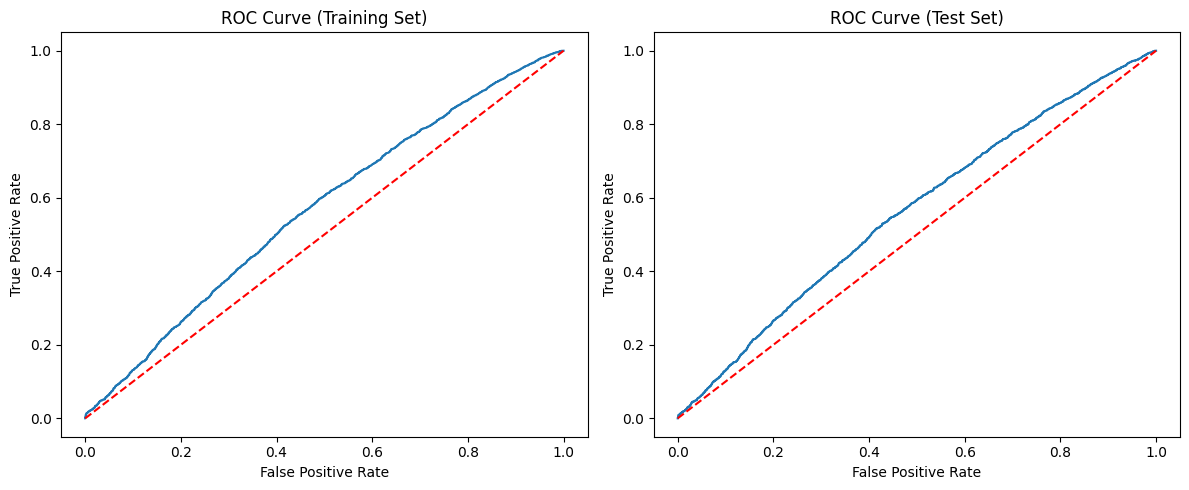

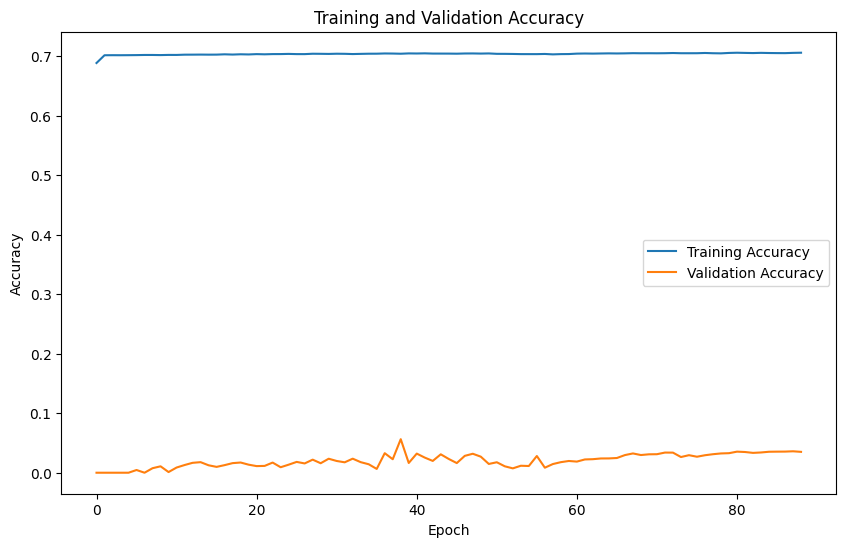

KeyError: 'val_precision'

<Figure size 1200x600 with 0 Axes>

In [142]:
from tensorflow import keras
from sklearn.metrics import roc_curve

# Custom F1 Score metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.round(y_pred)
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

# Step 1: Define the model architecture with L2 regularization
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=input_shape, kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(1, activation='sigmoid')  # Changed to sigmoid for binary classification
    ])
    return model

model = build_model((X_train_sampled.shape[1],))

# Step 2: Compile the model with binary crossentropy loss
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', F1Score(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

# Step 3: Define callbacks for early stopping and learning rate reduction
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    mode='max', 
    patience=50, 
    restore_best_weights=True
)
lr_reducer = keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', 
    mode='max', 
    factor=0.1, 
    patience=20,
    min_lr=1e-6
)

# Step 4: Train the model
history = model.fit(
    X_train_sampled, y_train_sampled,
    epochs=1000,
    batch_size=128,
    validation_split=0.05,
    callbacks=[early_stopping, lr_reducer],
    verbose=1
)

# Step 6: Evaluate the model on the test set and training set
train_loss, train_accuracy, train_f1, train_precision, train_recall, train_auc = model.evaluate(X_train_sampled, y_train_sampled, verbose=0)
test_loss, test_accuracy, test_f1, test_precision, test_recall, test_auc = model.evaluate(X_test, y_test, verbose=0)

print("Training Set Metrics:")
print(f"Train Loss: {train_loss:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train F1 Score: {train_f1:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}")
print(f"Train AUC: {train_auc:.4f}")

print("\nTest Set Metrics:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# Step 7: Make predictions
y_pred_train = model.predict(X_train_sampled)
y_pred_test = model.predict(X_test)

# Step 8: Visualize the results
plt.figure(figsize=(12, 5))

# ROC curve for training set
plt.subplot(1, 2, 1)
fpr_train, tpr_train, _ = roc_curve(y_train_sampled, y_pred_train)
plt.plot(fpr_train, tpr_train)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training Set)')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# ROC curve for test set
plt.subplot(1, 2, 2)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
plt.plot(fpr_test, tpr_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Add a new plot to compare final metrics
plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'AUC']
train_metrics = [train_accuracy, train_f1, train_precision, train_recall, train_auc]
val_metrics = [history.history['val_accuracy'][-1], history.history['val_f1_score'][-1], 
               history.history['val_precision'][-1], history.history['val_recall'][-1], history.history['val_auc'][-1]]
test_metrics = [test_accuracy, test_f1, test_precision, test_recall, test_auc]

x = range(len(metrics))
width = 0.25

# Function to make label on top of each individual bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', rotation=0)

train_bars = plt.bar([i - width for i in x], train_metrics, width, label='Train', align='center')
val_bars = plt.bar(x, val_metrics, width, label='Validation', align='center')
test_bars = plt.bar([i + width for i in x], test_metrics, width, label='Test', align='center')

autolabel(train_bars)
autolabel(val_bars)
autolabel(test_bars)

plt.ylabel('Metric Value')
plt.title('Comparison of Metrics Across Datasets')
plt.xticks(x, metrics)
plt.legend()

# Adjust the plot to prevent clipping of tick-labels
plt.tight_layout()
plt.show()

## Train Classification Models

Initial train using default hyperparameters.

In [ ]:
# logictic regression
from sklearn.linear_model import LogisticRegression # import logistic regression from sklearn
lg = LogisticRegression() # initiation object called lg
lg.fit(x_train_sampled, y_train_sampled) # fit logistic regression model in train data

LogisticRegression()

In [ ]:
# knn
from sklearn.neighbors import KNeighborsClassifier # import knn from sklearn
knn = KNeighborsClassifier() # initiation object called knn
knn.fit(x_train_sampled, y_train_sampled) # fit knn model in train data

KNeighborsClassifier()

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier # import decision tree from sklearn
dt = DecisionTreeClassifier() # initiation object called dt
dt.fit(x_train_sampled, y_train_sampled) # fit decision tree model in train data

DecisionTreeClassifier()

In [52]:
# random forest
from sklearn.ensemble import RandomForestClassifier # import random forest from sklearn
rf = RandomForestClassifier(random_state=42) # initiation object called rf
rf.fit(x_train_sampled, y_train_sampled) # fit random forest model in train data

RandomForestClassifier(random_state=42)

In [ ]:
# adaboost
from sklearn.ensemble import AdaBoostClassifier # import ADB from sklearn
ab = AdaBoostClassifier() # initiation object called ab
ab.fit(x_train_sampled, y_train_sampled) # fit ADB model in train data

AdaBoostClassifier()

In [ ]:
# xgboost
from xgboost import XGBClassifier # import XGB from sklearn
xg = XGBClassifier() # initiation object called xg
xg.fit(x_train_sampled, y_train_sampled) # fit XGB model in train data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Evaluate Classification Models

In [53]:
#Import metrics score that will be evalueated
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

#Function for model evaluation metrics score
def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train_sampled)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train_sampled)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (Train-Proba): %.2f" % roc_auc_score(y_train_sampled, y_pred_proba_train[:, 1]))
    print("roc_auc (Test-Proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

    #Cross Validation
    score = cross_validate(model, x_train_sampled, y_train_sampled, cv=5, scoring='recall', return_train_score=True) #scoring change based on what metrics we want to validate (usually choose the main performance metric)
    print('Recall (crossval train): '+ str(score['train_score'].mean()))
    print('Recall (crossval test): '+ str(score['test_score'].mean()))

    # Print standard deviation of recall scores
    print('Recall Std Dev (crossval train): ' + str(score['train_score'].std()))
    print('Recall Std Dev (crossval test): ' + str(score['test_score'].std()))

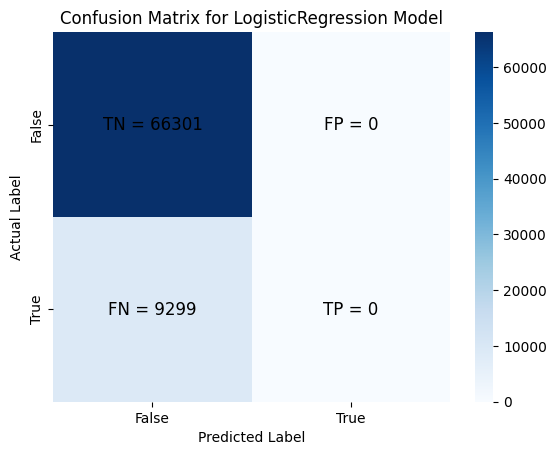

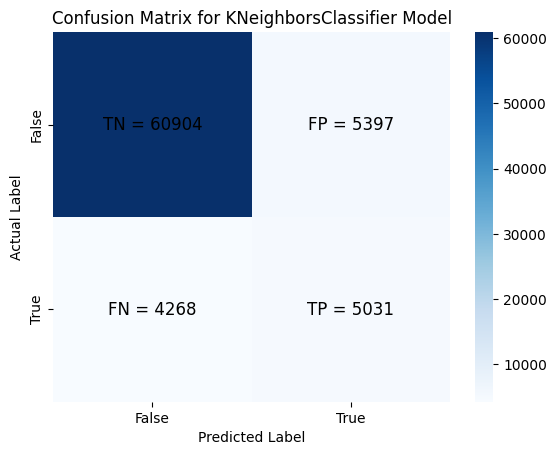

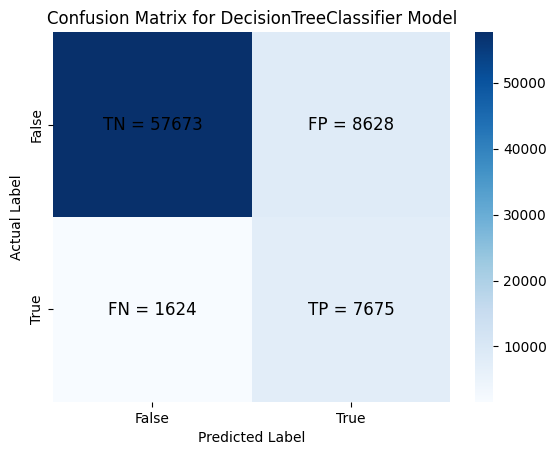

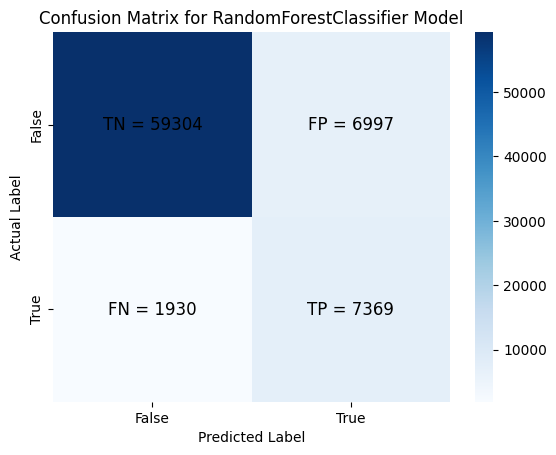

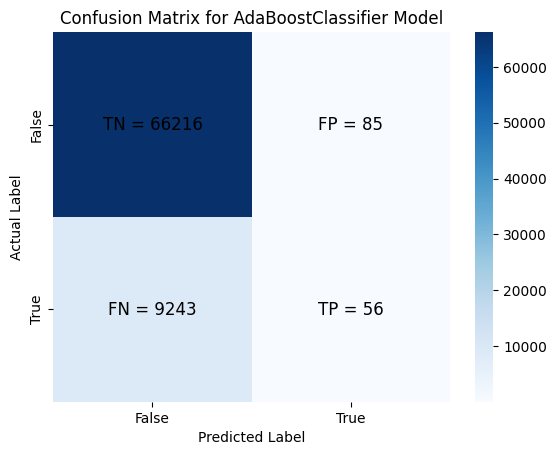

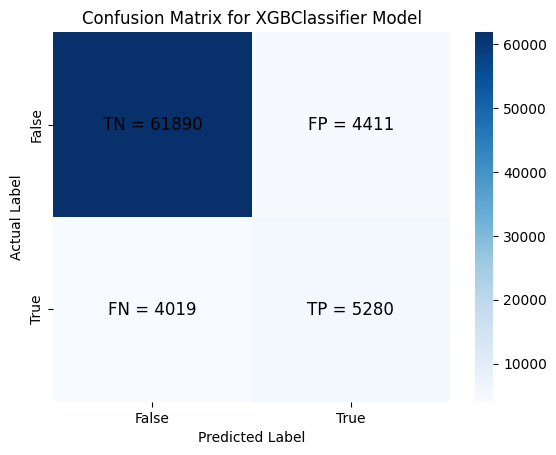

In [ ]:
#Confusion matrix of all models
from sklearn.metrics import confusion_matrix

# Instantiate models
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier()
]

for model in models :

    model.fit(x_train_sampled, y_train_sampled)

    y_pred = model.predict(x_test)

    #Make confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred)

    #Plot the confusion matrix in heatmap
    sns.heatmap(conf_mat, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])

    # Add annotations for TN, FN, FP, TP
    for i in range(2):
        for j in range(2):
            if i == 0 and j == 0:
                text = f'TN = {conf_mat[i, j]}'
            elif i == 1 and j == 0:
                text = f'FN = {conf_mat[i, j]}'
            elif i == 0 and j == 1:
                text = f'FP = {conf_mat[i, j]}'
            elif i == 1 and j == 1:
                text = f'TP = {conf_mat[i, j]}'

            plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black', fontsize=12)

    plt.title(f'Confusion Matrix for {type(model).__name__} Model')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

**Additional Information About confusion_matrix in sckit-learn**

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

The `confusion_matrix` function from scikit-learn is used to compute the confusion matrix, which is a table that summarizes the performance of a classification algorithm. The confusion matrix is typically a 2x2 matrix for binary classification problems.

Here's the breakdown:

```python
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
conf_mat = confusion_matrix(y_test, y_pred)
```

The confusion matrix `conf_mat` will be a 2x2 matrix in the form:

```
[[True Negative  False Positive]
 [False Negative True Positive]]
```

- True Negative (TN): The instances that are actually negative (class 0) and are predicted correctly as negative.
- False Positive (FP): The instances that are actually negative (class 0) but are predicted incorrectly as positive.
- False Negative (FN): The instances that are actually positive (class 1) but are predicted incorrectly as negative.
- True Positive (TP): The instances that are actually positive (class 1) and are predicted correctly as positive.

So, in the confusion matrix `conf_mat`, the elements are arranged as follows:

- `conf_mat[0, 0]`: True Negatives (TN)
- `conf_mat[0, 1]`: False Positives (FP)
- `conf_mat[1, 0]`: False Negatives (FN)
- `conf_mat[1, 1]`: True Positives (TP)

These values help evaluate the performance of your binary classification model. The diagonal elements (`conf_mat[0, 0]` and `conf_mat[1, 1]`) represent correct predictions, while the off-diagonal elements represent errors in predictions.

In [ ]:
#Printing metrics in form of classification report
from sklearn.metrics import classification_report

def display_classification_reports(model_for_report):
    model_for_report.fit(x_train_sampled, y_train_sampled)
    y_pred = model_for_report.predict(x_test)
    print("Classification Report for", type(model_for_report).__name__)
    print(classification_report(y_test, y_pred))

# Instantiate models
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier()
]

# Evaluate and print classification reports for all models
for model in models:
    display_classification_reports(model)

Classification Report for LogisticRegression
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66301
           1       0.00      0.00      0.00      9299

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600

Classification Report for KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     66301
           1       0.48      0.54      0.51      9299

    accuracy                           0.87     75600
   macro avg       0.71      0.73      0.72     75600
weighted avg       0.88      0.87      0.88     75600

Classification Report for DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     66301
           1       0.47      0.83      0.60      9299

    accuracy                           0.

**Additional Information About Classification_Report**

1. `from sklearn.metrics import classification_report`: This line imports the `classification_report` function from scikit-learn's `metrics` module. This function is used to generate a text report that includes precision, recall, f1-score, and support for each class.

2. `print(classification_report(y_test, y_pred))`: This line prints the classification report based on the true labels (`y_test`) and the predicted labels (`y_pred`). `y_test` typically represents the actual class labels in your test set, and `y_pred` represents the predicted labels generated by your machine learning model.

Now, regarding the interpretation of the classification report:
- Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. For class 0 and class 1, precision will be separately calculated.
- Recall: Recall is the ratio of correctly predicted positive observations to the all observations in the actual class. It is also calculated separately for class 0 and class 1.
- F1-score: The F1-score is the weighted average of precision and recall. It is a good way to show a balance between precision and recall.
- Support: Support is the number of actual occurrences of the class in the specified dataset.

The classification report will include these metrics for each class in your classification problem. The classes are typically denoted as 0 and 1 in binary classification problems. Class 0 usually represents the negative class (e.g., non-event or absence of a condition), and Class 1 represents the positive class (e.g., event or presence of a condition).

In the report, you will see values for precision, recall, f1-score, and support for both Class 0 and Class 1. The interpretation of these metrics depends on the context of your specific classification problem. Generally, you would want high values for precision, recall, and f1-score, indicating good performance of your model.

In [ ]:
#Printing metrics score for all models to compare

#Logistic Regression
print('Evaluate LogisticRegression')
eval_classification(lg)

#K-Nearest Neighbors Classifier
print('\nEvaluate KNeighborsClassifier')
eval_classification(knn)

#Decision Tree Classifier
print('\nEvaluate DecisionTreeClassifier')
eval_classification(dt)

#Random Forest Classifier
print('\nEvaluate RandomForestClassifier')
eval_classification(rf)

#AdaBoost Classifier
print('\nEvaluate AdaBoostClassifier')
eval_classification(ab)

#XGBoost Classifier
print('\nEvaluate XGBoostClassifier')
eval_classification(xg)

Evaluate LogisticRegression
Accuracy (Test Set): 0.88
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
roc_auc (Train-Proba): 0.54
roc_auc (Test-Proba): 0.54
Recall (crossval train): 5.817617685557765e-05
Recall (crossval test): 3.878474466709761e-05
Recall Std Dev (crossval train): 6.0118857929698207e-05
Recall Std Dev (crossval test): 5.171299288946348e-05

Evaluate KNeighborsClassifier
Accuracy (Test Set): 0.87
Precision (Test Set): 0.48
Recall (Test Set): 0.54
F1-Score (Test Set): 0.51
roc_auc (Train-Proba): 0.94
roc_auc (Test-Proba): 0.87
Recall (crossval train): 0.6023906478881255
Recall (crossval test): 0.5741737831153702
Recall Std Dev (crossval train): 0.19422839905854036
Recall Std Dev (crossval test): 0.20057374266516237

Evaluate DecisionTreeClassifier
Accuracy (Test Set): 0.86
Precision (Test Set): 0.47
Recall (Test Set): 0.83
F1-Score (Test Set): 0.60
roc_auc (Train-Proba): 0.98
roc_auc (Test-Proba): 0.85
Recall (crossval train): 0.995730499403

Please note that in this dataset, 0 means non-default (non-default payment) and 1 means default.

- False Positive: Actual is non-default but predicted as default.
- False Negative: Actual is default but predicted as non-default.

**In this case, we want to minimize False Negatives as much as possible, so the primary metric to be evaluated is recall (although every metric will still be displayed).**

# Summary of Models Generated by Various ML Algorithms

Experimentation has been conducted on the following models (default hyperparameters):

1. Logistic Regression
2. K-Nearest Neighbor Classifier
3. Decision Tree Classifier
4. Random Forest Classifier
5. Gradient Boosting (AdaBoost and XGBoost)

From all of these, the best results were obtained by:

- **Decision Tree Classifier**
- **Random Forest Classifier**
- **XGBoost Classifier**

Thus, the three models generated from tree-based algorithms can be subjected to hyperparameter tuning to slightly improve their performance (for other models with sufficiently good performance, if time and other resources permit, experiments will be conducted).

**However, for now, in accordance with the guidance and instructions from the mentor, only the best model is chosen to examine feature importance scores and undergo hyperparameter tuning with GridSearch, and the best result (recall) is achieved by Random Forest.**

One thing to consider is that the actual condition factor (test data) which is imbalanced also needs to be taken into account, so examining the ROC-AUC performance metric might be important. This is done because looking at the recall performance of random forest and decision tree might be close, but on metrics capturing imbalanced conditions such as ROC-AUC, they can be quite different.

## Feature Importances from Classification Models

In [ ]:
#Function for model feature importance score
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature importance score')

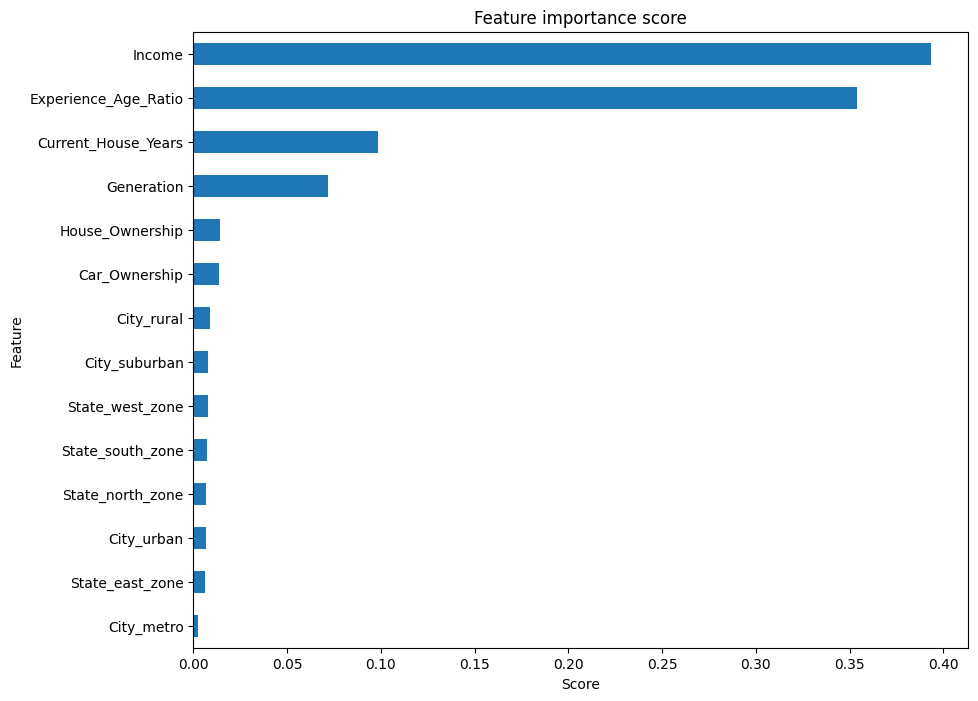

In [ ]:
# Feature importance in random forest
show_feature_importance(rf)

In the model generated using the random forest algorithm, the top 4 features contributing the most to the prediction results are Income, Experience_Age_Ratio, Current_House_Years, and Generation.

## Hyperparameter Tuning

In [54]:
#Function for best hyperparameters found during the tuning process
def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### Hyperparameter Tuning For Random Forest

Param value: 1; train: 0.9572468358521544; test: 0.8260027959995698; difference: 0.1312440398525846
Param value: 6; train: 0.9807242311023775; test: 0.7903000322615334; difference: 0.19042419884084405
Param value: 12; train: 0.9919070212408372; test: 0.7941714162813206; difference: 0.1977356049595166
Param value: 18; train: 0.9933291101601789; test: 0.7913754167114744; difference: 0.2019536934487045
Param value: 24; train: 0.9949451202957945; test: 0.7933111087213679; difference: 0.20163401157442662
Param value: 30; train: 0.9960310791069281; test: 0.7942789547263147; difference: 0.2017521243806134
Param value: 36; train: 0.9957595894041448; test: 0.7938488009463384; difference: 0.2019107884578064
Param value: 41; train: 0.9959664387015036; test: 0.7940638778363265; difference: 0.2019025608651771
Param value: 47; train: 0.9961991441610322; test: 0.7948166469512851; difference: 0.2013824972097471
Param value: 53; train: 0.9960440071880131; test: 0.793526185611356; difference: 0.20251782

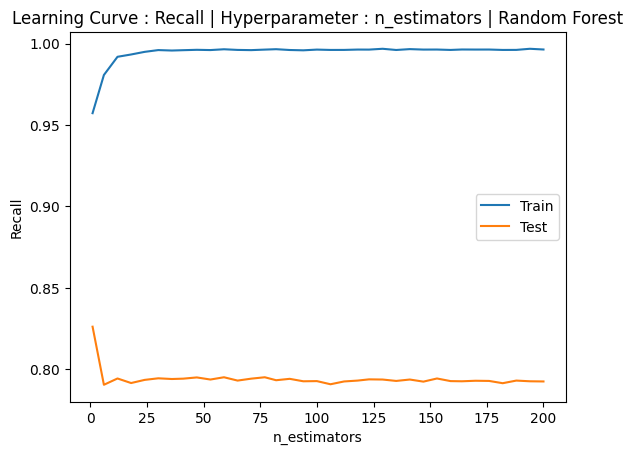

In [ ]:
#Learning curve for hyperparameters (n_estimators)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
param_values = [int(x) for x in np.linspace(1, 200, num = 35)] # n_estimators
# param_values = [int(x) for x in np.linspace(1, 100, num = 15)] # max_depth
# param_values = [2, 5, 10, 50] # min_samples_split
# param_values = [1, 2, 5, 10, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(n_estimators=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train = model.predict(x_train_sampled)
    train_recall = recall_score(y_train_sampled, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred_test = model.predict(x_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    # difference eval on train and test
    diff_score = train_recall - test_recall
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : Recall | Hyperparameter : n_estimators | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('Recall')
plt.xlabel('n_estimators') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 1; train: 0.9469337177023718; test: 0.8496476650068167; difference: 0.09728605269555513
Param value: 6; train: 0.9725438754190336; test: 0.9147175064671599; difference: 0.05782636895187376
Param value: 12; train: 0.9731104157327992; test: 0.9267686294598483; difference: 0.046341786272950936
Param value: 18; train: 0.9731824157255945; test: 0.9304165493662409; difference: 0.042765866359353644
Param value: 24; train: 0.9733801741341864; test: 0.9334515150583204; difference: 0.03992865907586607
Param value: 30; train: 0.9734121126023857; test: 0.933639417409351; difference: 0.039772695193034724
Param value: 36; train: 0.9734785111342457; test: 0.934477817788306; difference: 0.039000693345939696
Param value: 41; train: 0.9734840637084273; test: 0.9348384992122701; difference: 0.03864556449615719
Param value: 47; train: 0.9734496819471394; test: 0.9353023673271379; difference: 0.03814731462000154
Param value: 53; train: 0.9734820951600341; test: 0.9354284141082934; difference: 

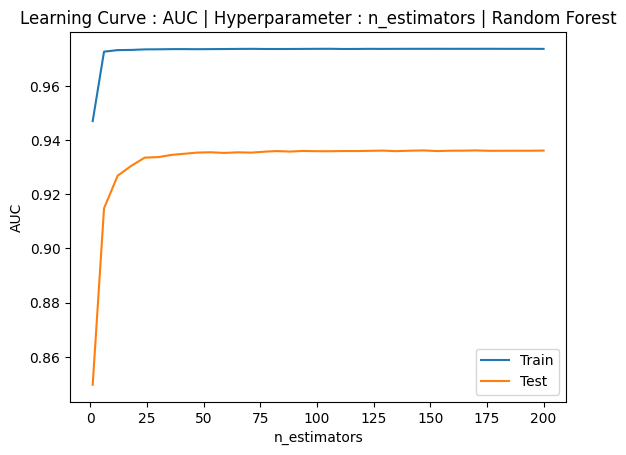

In [ ]:
#Learning curve for hyperparameters (n_estimators)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
param_values = [int(x) for x in np.linspace(1, 200, num = 35)] # n_estimators
# param_values = [int(x) for x in np.linspace(1, 100, num = 15)] # max_depth
# param_values = [2, 5, 10, 50] # min_samples_split
# param_values = [1, 2, 5, 10, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(n_estimators=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train_proba = model.predict_proba(x_train_sampled)
    train_auc = roc_auc_score(y_train_sampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # difference eval on train and test
    diff_score = train_auc - test_auc
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : AUC | Hyperparameter : n_estimators | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('AUC')
plt.xlabel('n_estimators') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 1; train: 0.0; test: 0.0; difference: 0.0
Param value: 8; train: 0.033768147793822964; test: 0.029250457038391225; difference: 0.004517690755431739
Param value: 15; train: 0.5013509844733747; test: 0.4303688568663297; difference: 0.07098212760704498
Param value: 22; train: 0.9433491486858605; test: 0.7628777287880417; difference: 0.18047141989781879
Param value: 29; train: 0.9960698633501829; test: 0.7925583396064093; difference: 0.20351152374377357
Param value: 36; train: 0.996574058512495; test: 0.7937412625013442; difference: 0.20283279601115078
Param value: 43; train: 0.996574058512495; test: 0.794709108506291; difference: 0.20186495000620408
Param value: 50; train: 0.9961215756745226; test: 0.7932035702763738; difference: 0.20291800539814886
Param value: 57; train: 0.9963284249718815; test: 0.7936337240563501; difference: 0.20269470091553132
Param value: 64; train: 0.9965869865935799; test: 0.7927734164963974; difference: 0.20381357009718248
Param value: 71; train: 0.

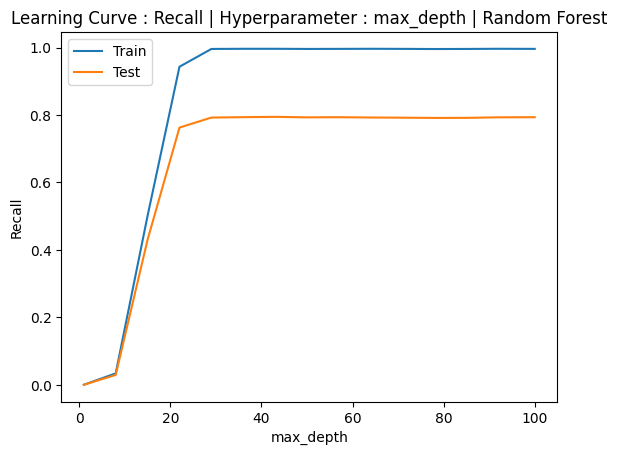

In [ ]:
#Learning curve for hyperparameters (max_depth)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(1, 200, num = 35)] # n_estimators
param_values = [int(x) for x in np.linspace(1, 100, num = 15)] # max_depth
# param_values = [2, 5, 10, 50] # min_samples_split
# param_values = [1, 2, 5, 10, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(max_depth=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train = model.predict(x_train_sampled)
    train_recall = recall_score(y_train_sampled, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred_test = model.predict(x_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    # difference eval on train and test
    diff_score = train_recall - test_recall
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : Recall | Hyperparameter : max_depth | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('Recall')
plt.xlabel('max_depth') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 1; train: 0.5540032666244046; test: 0.5509954480149407; difference: 0.0030078186094638637
Param value: 8; train: 0.7385220233495614; test: 0.7077008152162185; difference: 0.03082120813334288
Param value: 15; train: 0.9397918928656928; test: 0.8830641415513267; difference: 0.056727751314366026
Param value: 22; train: 0.9655356712416292; test: 0.9254921649376305; difference: 0.040043506303998666
Param value: 29; train: 0.9722800243341678; test: 0.9356378067932095; difference: 0.03664221754095831
Param value: 36; train: 0.9735286511853807; test: 0.9355964489096228; difference: 0.03793220227575789
Param value: 43; train: 0.9735702163745921; test: 0.935906336620921; difference: 0.037663879753671026
Param value: 50; train: 0.9735600007144419; test: 0.9358313600988615; difference: 0.037728640615580455
Param value: 57; train: 0.9735826103783403; test: 0.9358062243802135; difference: 0.037776385998126716
Param value: 64; train: 0.9735593596712171; test: 0.9358508683814993; differen

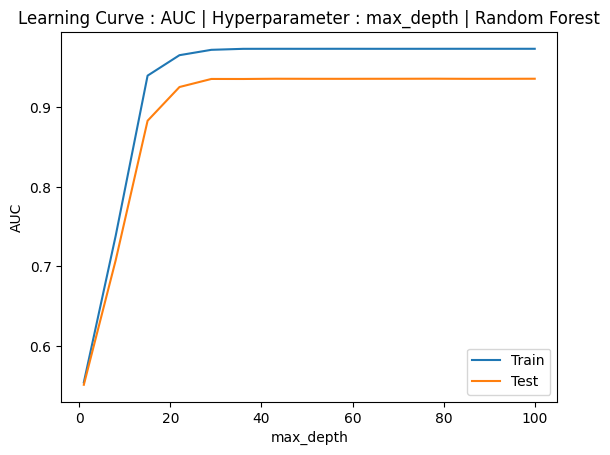

In [ ]:
#Learning curve for hyperparameters (max_depth)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(1, 200, num = 35)] # n_estimators
param_values = [int(x) for x in np.linspace(1, 100, num = 15)] # max_depth
# param_values = [2, 5, 10, 50] # min_samples_split
# param_values = [1, 2, 5, 10, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(max_depth=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train_proba = model.predict_proba(x_train_sampled)
    train_auc = roc_auc_score(y_train_sampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # difference eval on train and test
    diff_score = train_auc - test_auc
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : AUC | Hyperparameter : max_depth | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('AUC')
plt.xlabel('max_depth') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 2; train: 0.9961345037556075; test: 0.7925583396064093; difference: 0.2035761641491982
Param value: 5; train: 0.9930188362141408; test: 0.7910528013764921; difference: 0.20196603483764863
Param value: 10; train: 0.9891145557264935; test: 0.7898698784815572; difference: 0.19924467724493633
Param value: 50; train: 0.863065765148479; test: 0.7605118829981719; difference: 0.10255388215030714


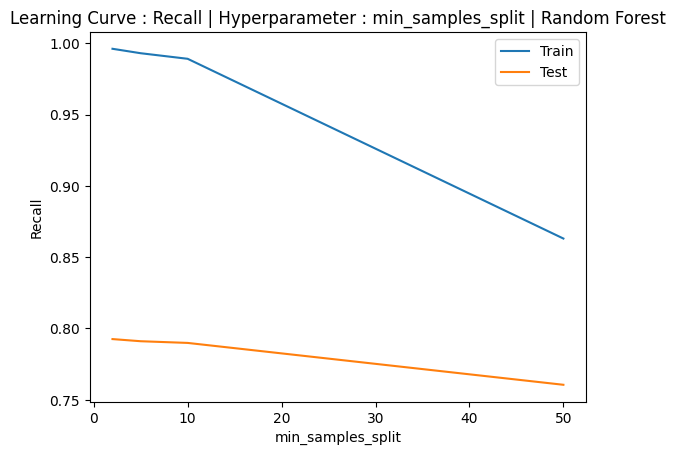

In [ ]:
#Learning curve for hyperparameters (min_samples_split)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(1, 200, num = 35)] # n_estimators
# param_values = [int(x) for x in np.linspace(1, 100, num = 15)] # max_depth
param_values = [2, 5, 10, 50] # min_samples_split
# param_values = [1, 2, 5, 10, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(min_samples_split=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train = model.predict(x_train_sampled)
    train_recall = recall_score(y_train_sampled, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred_test = model.predict(x_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    # difference eval on train and test
    diff_score = train_recall - test_recall
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : Recall | Hyperparameter : min_samples_split | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('Recall')
plt.xlabel('min_samples_split') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 2; train: 0.9735522132635188; test: 0.9358985276309595; difference: 0.03765368563255933
Param value: 5; train: 0.9693178097215192; test: 0.9364375279773143; difference: 0.032880281744204876
Param value: 10; train: 0.9668588278288909; test: 0.9367845604968177; difference: 0.03007426733207319
Param value: 50; train: 0.9584564536228296; test: 0.9341810039919697; difference: 0.024275449630859924


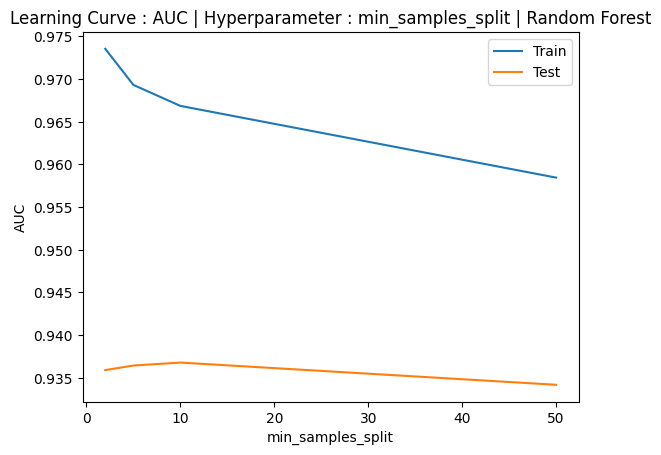

In [ ]:
#Learning curve for hyperparameters (min_samples_split)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(1, 200, num = 35)] # n_estimators
# param_values = [int(x) for x in np.linspace(1, 100, num = 15)] # max_depth
param_values = [2, 5, 10, 50] # min_samples_split
# param_values = [1, 2, 5, 10, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(min_samples_split=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train_proba = model.predict_proba(x_train_sampled)
    train_auc = roc_auc_score(y_train_sampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # difference eval on train and test
    diff_score = train_auc - test_auc
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : AUC | Hyperparameter : min_samples_split | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('AUC')
plt.xlabel('min_samples_split') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 1; train: 0.9963672092151362; test: 0.7937412625013442; difference: 0.20262594671379197
Param value: 2; train: 0.9684166979095293; test: 0.7827723411119475; difference: 0.18564435679758184
Param value: 5; train: 0.885857972101201; test: 0.7648134207979352; difference: 0.12104455130326575
Param value: 10; train: 0.8276816072190405; test: 0.7585761909882783; difference: 0.06910541623076216
Param value: 30; train: 0.7567840105493142; test: 0.704054199376277; difference: 0.05272981117303721


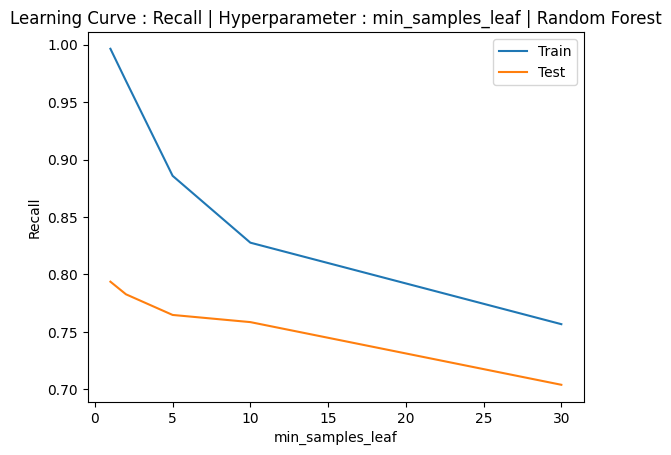

In [ ]:
#Learning curve for hyperparameters (min_samples_leaf)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(1, 200, num = 35)] # n_estimators
# param_values = [int(x) for x in np.linspace(1, 100, num = 15)] # max_depth
# param_values = [2, 5, 10, 50] # min_samples_split
param_values = [1, 2, 5, 10, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(min_samples_leaf=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train = model.predict(x_train_sampled)
    train_recall = recall_score(y_train_sampled, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred_test = model.predict(x_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    # difference eval on train and test
    diff_score = train_recall - test_recall
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : Recall | Hyperparameter : min_samples_leaf | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('Recall')
plt.xlabel('min_samples_leaf') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 1; train: 0.9735648159343162; test: 0.9359015818064914; difference: 0.037663234127824796
Param value: 2; train: 0.9653457652573804; test: 0.9361791533237948; difference: 0.029166611933585607
Param value: 5; train: 0.9578020878384732; test: 0.9329731010878138; difference: 0.024828986750659365
Param value: 10; train: 0.9536218831598764; test: 0.9271219674001585; difference: 0.026499915759717885
Param value: 30; train: 0.9411557665614507; test: 0.906233469913587; difference: 0.034922296647863726


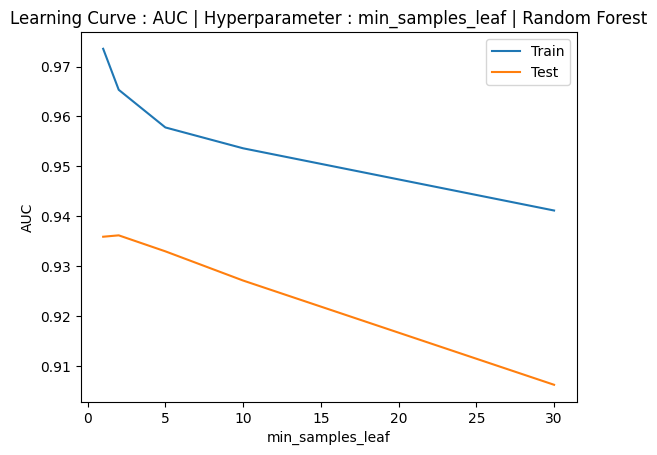

In [ ]:
#Learning curve for hyperparameters (min_samples_leaf)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(1, 200, num = 35)] # n_estimators
# param_values = [int(x) for x in np.linspace(1, 100, num = 15)] # max_depth
# param_values = [2, 5, 10, 50] # min_samples_split
param_values = [1, 2, 5, 10, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(min_samples_leaf=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train_proba = model.predict_proba(x_train_sampled)
    train_auc = roc_auc_score(y_train_sampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # difference eval on train and test
    diff_score = train_auc - test_auc
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : AUC | Hyperparameter : min_samples_leaf | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('AUC')
plt.xlabel('min_samples_leaf') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Final Hyperparameter used are chosen based on learning curve, iteration of showing best hyperparameters, and some other references

In [ ]:
#Hyperparameter tuning for random forest

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Initiate hyperparameters used and their values
n_estimators = [int(x) for x in np.linspace(30, 70, num = 15)] # Number of trees in the forest
criterion = ['gini', 'entropy'] # Function to measure the quality of a split
max_depth = [int(x) for x in np.linspace(20, 65, num = 15)] # Maximum depth of the tree
min_samples_split = [2, 5, 10, 12] # Minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 5] # Minimum number of samples required to be at a leaf node

#Collecting all hyperparameters into a single dictionary
hyperparameters = dict(n_estimators = n_estimators,
                       criterion = criterion,
                       max_depth = max_depth,
                       min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf)

#Initiate tuned model
rf = RandomForestClassifier(random_state=42)
# rf_tuned = GridSearchCV(rf, hyperparameters, cv=5, scoring='recall')
rf_tuned = RandomizedSearchCV(rf, hyperparameters, random_state=42, cv=5, scoring='recall')
rf_tuned.fit(x_train_sampled, y_train_sampled)

#Tuned model evaluation
eval_classification(rf_tuned)

Accuracy (Test Set): 0.88
Precision (Test Set): 0.51
Recall (Test Set): 0.80
F1-Score (Test Set): 0.62
roc_auc (Train-Proba): 0.97
roc_auc (Test-Proba): 0.94
Recall (crossval train): 0.9965255782605116
Recall (crossval test): 0.9186691951582621
Recall Std Dev (crossval train): 0.0006369598968320071
Recall Std Dev (crossval test): 0.025207756059749526


In [ ]:
show_best_hyperparameter(rf_tuned)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 65, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 47, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
# Retrieving the best hyperparameters for random forest (similar to show_best_hyperparameter code before, but only shows the ones that we used)
best_params = rf_tuned.best_params_
best_params

{'n_estimators': 47,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 65,
 'criterion': 'entropy'}

In [61]:
#Hyperparameter tuning for random forest (second run for saving model in pickle file)

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Initiate hyperparameters used and their values
n_estimators = [int(x) for x in np.linspace(30, 70, num = 15)] # Number of trees in the forest
criterion = ['gini', 'entropy'] # Function to measure the quality of a split
max_depth = [int(x) for x in np.linspace(20, 65, num = 15)] # Maximum depth of the tree
min_samples_split = [2, 5, 10, 12] # Minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 5] # Minimum number of samples required to be at a leaf node

#Collecting all hyperparameters into a single dictionary
hyperparameters = dict(n_estimators = n_estimators,
                       criterion = criterion,
                       max_depth = max_depth,
                       min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf)

#Initiate tuned model
rf = RandomForestClassifier(random_state=42)
# rf_tuned = GridSearchCV(rf, hyperparameters, cv=5, scoring='recall')
rf_tuned = RandomizedSearchCV(rf, hyperparameters, random_state=42, cv=5, scoring='recall')
rf_tuned.fit(x_train_sampled, y_train_sampled)

#Tuned model evaluation
eval_classification(rf_tuned)

Accuracy (Test Set): 0.88
Precision (Test Set): 0.51
Recall (Test Set): 0.79
F1-Score (Test Set): 0.62
roc_auc (Train-Proba): 0.97
roc_auc (Test-Proba): 0.94
Recall (crossval train): 0.9964189210483617
Recall (crossval test): 0.9196775701077108
Recall Std Dev (crossval train): 0.00032507578217464317
Recall Std Dev (crossval test): 0.02625158501822695


In [62]:
show_best_hyperparameter(rf_tuned)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 65, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 47, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [63]:
# Retrieving the best hyperparameters for random forest (similar to show_best_hyperparameter code before, but only shows the ones that we used)
best_params = rf_tuned.best_params_
best_params

{'n_estimators': 47,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 65,
 'criterion': 'entropy'}

In [55]:
#Hyperparameter tuning for random forest (third run for handling problems in deployment compability, the previous ones are run on google colab this one on local)

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Initiate hyperparameters used and their values
n_estimators = [int(x) for x in np.linspace(30, 70, num = 15)] # Number of trees in the forest
criterion = ['gini', 'entropy'] # Function to measure the quality of a split
max_depth = [int(x) for x in np.linspace(20, 65, num = 15)] # Maximum depth of the tree
min_samples_split = [2, 5, 10, 12] # Minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 5] # Minimum number of samples required to be at a leaf node

#Collecting all hyperparameters into a single dictionary
hyperparameters = dict(n_estimators = n_estimators,
                       criterion = criterion,
                       max_depth = max_depth,
                       min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf)

#Initiate tuned model
rf = RandomForestClassifier(random_state=42)
# rf_tuned = GridSearchCV(rf, hyperparameters, cv=5, scoring='recall')
rf_tuned = RandomizedSearchCV(rf, hyperparameters, random_state=42, cv=5, scoring='recall')
rf_tuned.fit(x_train_sampled, y_train_sampled)

#Tuned model evaluation
eval_classification(rf_tuned)

Accuracy (Test Set): 0.88
Precision (Test Set): 0.51
Recall (Test Set): 0.79
F1-Score (Test Set): 0.62
roc_auc (Train-Proba): 0.97
roc_auc (Test-Proba): 0.93
Recall (crossval train): 0.9963090344379004
Recall (crossval test): 0.9172083423844024
Recall Std Dev (crossval train): 0.0006822911858585391
Recall Std Dev (crossval test): 0.024106800812066273


In [56]:
show_best_hyperparameter(rf_tuned)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 65, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 47, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [57]:
# Retrieving the best hyperparameters for random forest (similar to show_best_hyperparameter code before, but only shows the ones that we used)
best_params = rf_tuned.best_params_
best_params

{'n_estimators': 47,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 65,
 'criterion': 'entropy'}

- Before Hyperparameter Tuning :
  - Accuracy (Test Set): 0.88
  - Precision (Test Set): 0.51
  - Recall (Test Set): 0.79
  - F1-Score (Test Set): 0.62
  - roc_auc (Train-Proba): 0.97
  - roc_auc (Test-Proba): 0.94
  - Recall (crossval train): 0.9958856367634411
  - **Recall (crossval test): 0.9170273385528492**
  - Recall Std Dev (crossval train): 0.0007672007703814973
  - Recall Std Dev (crossval test): 0.024670909816901596

- After Hyperparameter Tuning :
  - Accuracy (Test Set): 0.88
  - Precision (Test Set): 0.51
  - Recall (Test Set): 0.79
  - F1-Score (Test Set): 0.62
  - roc_auc (Train-Proba): 0.97
  - roc_auc (Test-Proba): 0.94
  - Recall (crossval train): 0.9964189210483617
  - **Recall (crossval test): 0.9196775701077108**
  - Recall Std Dev (crossval train): 0.00032507578217464317
  - Recall Std Dev (crossval test): 0.02625158501822695

The improvement in Recall can be observed after hyperparameter tuning, even though the increase is small. Other performance improvements can be achieved by using a wider range of hyperparameters (although the computational resources required for this are not currently available) or by further transforming the training data used.

# Business Impact Simulation

## Improve the assessment of credit risk by implementing machine learning model

By using a random forest model to predict which customers will default, we can reduce the default rate from the initial **12.30%** to:

**Default Rate = FN / Total Data = 1865/(59163+7138+1865+7434) * 100 = 2.46%**

The assumptions and explanation for the calculation process in the loan context are as follows:

- TN (Predicted non-default and actually non-default)
    - The system approves the loan, and the company gains profit.

- TP (Predicted default and actually default)
    - The system denies the loan, and the company avoids losses.

- FP (Predicted default but actually non-default)
    - The system denies the loan, and the company loses potential profit.

- FN (Predicted non-default but actually default)
    - The system approves the loan, and the company incurs losses.

Thus, only customers classified as FN will be counted as defaulters. TP is not included because they have already been rejected by the system. 

Unlike traditional or manual lending system that often adhere to rigid lending criteria, automated lending platforms use advanced algorithms to assess creditworthiness. This results in lower the default rate, particularly for individuals who may have been overlooked by traditional lenders. The key to minimizing default rates while maintaining reasonable approval rates lies in the careful calibration of machine learning algorithms. By continuously refining and optimizing the algorithms based on historical data and real-time feedback, lenders can strike a balance between default rates and approval rates, ultimately mitigating risk and maximizing profitability.

## Streamline the credit risk assessment process for greater effectiveness and reduced processing time

- The amount of time taken for manual loan approval processes can vary significantly depending on the complexity of the loan application, the efficiency of the lending institution's procedures, and other factors such as regulatory requirements. However, manual loan approval processes in internal team typically take several hours or even days to complete. Let's just assume for this calculation it takes 6 hours.

- By implementing machine learning algorithm, the system analyze borrower data from various sources and eliminates the need for manual data entry, reducing the chances of transcription errors or data mismatches. This process usually only takes seconds and minutes at max. Let's just assume for this calculation it takes 2 minute.

- So it will significantly reduce the processing time from 6 hours to 2 minutes, which means an efficiency improvement of :

    **Efficiency = (1 - Process time with model/ Process time without model) * 100% = 99.444%**

References used for this efficiency analysis : 
- https://www.bankbazaar.com/personal-loan-verification-process.html (A lending company in India, same country of this dataset)

- https://fastercapital.com/content/How-automated-lending-is-revolutionizing-the-loan-approval-process.html 

- https://www.docsumo.com/blog/artificial-intelligence-based-loan-management 

# Model Deployment

## Save Model

**Additional Information About Libraries for Saving Model**

Both `pickle` and `joblib` are Python libraries that provide ways to serialize and deserialize objects, including machine learning models. They are used for saving and loading Python objects, and each has its own advantages and use cases.

Here are some key differences between `pickle` and `joblib`:

1. **Performance:**
   - `joblib` is generally more efficient in terms of serialization and deserialization speed, especially for large NumPy arrays and objects with large data structures.
   - `pickle` might be slower than `joblib` for certain use cases.

2. **Dependencies:**
   - `pickle` is a standard library module in Python, so it comes pre-installed with Python. It doesn't have external dependencies beyond the standard library.
   - `joblib` is an external library that you need to install separately using `pip install joblib`. It is not included in the standard library, but it is commonly used in the scientific computing and machine learning community.

3. **Handling NumPy arrays:**
   - `joblib` is particularly optimized for handling NumPy arrays, making it a good choice for saving and loading large numerical datasets efficiently.
   - `pickle` can also handle NumPy arrays, but `joblib` may be more performant for this specific use case.

4. **Compression:**
   - `joblib` supports optional compression, which can be beneficial when dealing with large datasets. You can compress the serialized file to reduce storage space and speed up the I/O operations.
   - `pickle` does not have built-in compression, but you can use external compression libraries in conjunction with `pickle` if needed.

5. **Compatibility:**
   - `pickle` is a standard library module that is widely available and compatible across different Python environments.
   - `joblib` is not a standard library module, so you need to ensure that it is available in your Python environment. While it is commonly used in data science and machine learning environments, it may not be available in every Python environment.

In summary, both `pickle` and `joblib` are suitable for saving and loading machine learning models, but `joblib` is often preferred for its performance benefits, especially when dealing with large numerical datasets. If you are working in a machine learning or scientific computing context, `joblib` might be a good choice. However, for basic serialization needs, `pickle` is a reliable and built-in option.

In [58]:
# Save random forest model
joblib.dump(rf_tuned, 'tuned_random_forest_model.joblib')

# Save using pickle
with open('tuned_random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_tuned, file)

In [ ]:
# # Install steamlit
# pip install streamlit

Problem solving for error installing streamlit

https://youtu.be/zHAM5MGehV8?si=9KkUKX2PBg42sM-M

- The deployment will be done in a separate python file : app.py

- To run in terminal : streamlit run app.py

- Some reference for the code in model deployment usign streamlit :
    - https://charumakhijani.medium.com/machine-learning-model-deployment-as-a-web-app-using-streamlit-4e542d0adf15
    - https://www.analyticsvidhya.com/blog/2020/12/deploying-machine-learning-models-using-streamlit-an-introductory-guide-to-model-deployment/

### **Additional Information About Model Deployment Using Streamlit**

**Scaling Process**

When you use MinMaxScaler or any other scaling technique during preprocessing to scale your features to a specific range (e.g., 0 to 1), it's important to use the same scaling on the input features during deployment.

Here's why:

1. **Consistency:** The model has been trained on the scaled features, so it expects input features to be in the same scale. If you provide unscaled features during testing or deployment, the model may not perform as expected.

2. **Normalization:** Many machine learning models, especially distance-based models or models with gradient-based optimization, benefit from normalized features. Normalization ensures that all features contribute equally to the model's learning process.

Therefore, when deploying your model, make sure to apply the same scaling transformation to the input features that you used during the preprocessing stage. This could involve using the MinMaxScaler (or any other scaler) with the same parameters that were used during training.

Here's an example of how you can use the scaler for deployment:

```python
import streamlit as st
import joblib

# Load the trained model
model = joblib.load('your_model_file.joblib')

# Load the scaler used during training
scaler = joblib.load('your_scaler_file.joblib')

# Create a Streamlit interface to take user input and make predictions
st.title('Your Machine Learning Model Deployment')

# Add input elements for the features
input_feature1 = st.number_input('Feature 1')
input_feature2 = st.number_input('Feature 2')
# Add more input features as needed

# Organize the user inputs into a list or array
user_inputs = [[input_feature1, input_feature2, ...]]

# Scale the user inputs using the same scaler
scaled_inputs = scaler.transform(user_inputs)

# Make predictions
prediction = model.predict(scaled_inputs)

# Display the prediction
st.success(f'The predicted class is {prediction[0]}')
```

In this example, `your_scaler_file.joblib` is the file where you saved the MinMaxScaler during training. Make sure to adjust the file names and paths based on your specific setup.

Using the same scaling parameters ensures that the model receives input features in the same scale it has seen during training, leading to more reliable predictions.

**Features Used**

The number of input elements in your Streamlit app should be based on the total number of features after the encoding process. When you perform feature engineering such as one-hot encoding and count/frequency encoding, you create additional features based on the original ones.

For example, if your original dataset had 5 categorical features and 8 numerical features, and after encoding, you end up with 20 features (10 from one-hot encoding and 10 from count/frequency encoding), then your Streamlit app should have input elements for all 20 features.

In the modified Streamlit code, you'll need to add input elements for each of the engineered features. Here's a general example:

```python
import streamlit as st
import joblib

# Load the trained model
model = joblib.load('your_model_file.joblib')

# Create a Streamlit interface to take user input and make predictions
st.title('Your Machine Learning Model Deployment')

# Add input elements for the encoded features
# Replace these with the actual names of your features
input_feature1 = st.slider('Feature 1', min_value=0.0, max_value=10.0, value=5.0)
input_feature2 = st.slider('Feature 2', min_value=0.0, max_value=10.0, value=5.0)
# Repeat this for all 20 features after encoding

# When the user clicks the 'Predict' button, make predictions using the loaded model
if st.button('Predict'):
    # Organize the user inputs into a list or array
    user_inputs = [input_feature1, input_feature2, ..., input_feature20]

    # Make predictions
    prediction = model.predict([user_inputs])

    # Display the prediction
    st.success(f'The predicted class is {prediction[0]}')
```

Make sure to adjust the input elements and their names based on your specific feature names after the encoding process. If you performed one-hot encoding, you might have binary features, and sliders might not be the best choice. You might need to use other Streamlit input elements, such as checkboxes or text inputs, depending on the nature of your encoded features.